### Explore Data

In [64]:
# Enforce nullable-integer dtypes for columns that should be whole numbers
def enforce_int_like(df):
    int_like = {
        "PROMPT_CHAR","WORD","WORD_ID","WORD_LEN_KEYS",
        "CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR",
        "D1U1","D1D2","U1U2","D1U2","U1D2",
        "WORD_DURATION","WORD_GAP_AFTER","OVERLAP_FLAG"
    }
    for c in (int_like & set(df.columns)):
        df[c] = pd.to_numeric(df[c], errors="coerce").round().astype("Int64")
    return df


In [65]:
import glob
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy.ma.core import count

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data.columns]
data = data.drop_duplicates(subset=subset_cols, ignore_index=True)


# unique participant_ids count
def unique_participant_ids(dataframe):
    unique_participants = dataframe['PARTICIPANT_ID'].nunique()
    print(f"Count of unique PARTICIPANT_IDs: {unique_participants}")

# print all ids
def print_pids(folder):
    unique_ids = set()

    for file in folder:
        with open(file, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            header = next(reader)
            try:
                pid_idx = header.index('PARTICIPANT_ID')
            except ValueError:
                continue  # Skip files without the column
            for row in reader:
                if len(row) > pid_idx:
                    participant_id = row[pid_idx]
                    unique_ids.add(participant_id)

    print("Unique PARTICIPANT_IDs:")
    for pid in unique_ids:
        print(pid)
    print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

#submission per participant id
def submissions_per_pid(dataframe):
    files_per_participant = dataframe.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
    files_per_participant.plot(kind='bar')
    plt.title('Data per PARTICIPANT_ID')
    plt.xlabel('PARTICIPANT_ID')
    plt.ylabel('Data')
    plt.show()

# usage time
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)

# frequency
def show_frequency(dataframe):
    plt.figure()
    dataframe['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of FREQUENCY')
    plt.xlabel('FREQUENCY')
    plt.ylabel('Count')
    plt.show()

# count columns
def count_rows(folder):
    df_rows_count_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current = enforce_int_like(df_current)
        df_current['ROW_COUNT'] = len(df_current)
        df_rows_count_current.append(df_current)
    df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)
    print(df_rows_count)

    # calculate time passing for each file

def calculate_time_per_file(folder):
    df_calculate_time_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current = enforce_int_like(df_current)
        df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
        df_calculate_time_current.append(df_current)
    df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)
    print(df_calculate_time)

# 5. length of rows per file
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

In [66]:
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def print_invalid_participant_ids(file_paths):
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    print(f"Invalid PARTICIPANT_ID in file {path}: {pid}")
        except Exception as e:
            print(f"Error reading {path}: {e}")

def print_unique_valid_participant_ids(file_paths):
    valid_ids = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if is_valid_participant_id(pid):
                    valid_ids.add(pid)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    print("Unique valid PARTICIPANT_IDs:")
    for pid in valid_ids:
        print(pid)
    print(f"Total valid PARTICIPANT_IDs: {len(valid_ids)}")

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

print_invalid_participant_ids(all_files)
print_unique_valid_participant_ids(all_files)

Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID i

In [67]:
# print(unique_participant_ids(data))
# print(print_pids(all_files))
# print(submissions_per_pid(data))
#
# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)
#
# print(show_frequency(data))
#
# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

### Failure given data having invalid characters -> clean data

In [68]:
import re
import shutil
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def get_files_with_invalid_participant_ids(file_paths):
    invalid_files = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    invalid_files.add(path)
                    break
        except Exception as e:
            print(f"Error reading {path}: {e}")
    return invalid_files

# Example usage:
invalid_files = get_files_with_invalid_participant_ids(all_files)
os.makedirs('data/valid_keystrokes', exist_ok=True)
for file in all_files:
    if file not in invalid_files:
        shutil.copy(file, os.path.join('data/valid_keystrokes', os.path.basename(file)))

In [69]:
import csv

folder = 'data/valid_keystrokes'
all_valid_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_valid_files:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_cleaned = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data_id_cleaned.columns]
data_id_cleaned = data_id_cleaned.drop_duplicates(subset=subset_cols, ignore_index=True)



### with cleaned id overview

Count of unique PARTICIPANT_IDs: 136
None
Unique PARTICIPANT_IDs:
5f29eff59714081a3594a331
57507e67fcaa630007cb9ad2
60f06a479c4f3ec0a536d40a
65feaaac53eb219f09ad5ea0
5adae3ebdec767000128c131
5fb2d087a956be967181e2d1
65a45ac08354b6cf79cc48cc
6725030a6ee43d8130ceefc5
672f4f1751ad53d8967e67bd
65a3ec77f674ac3e98f0c6ac
6682afdddc274c7cc3e4ea16
647869e6f69318bacc341d53
666f76b68b89442817be678a
65c7b42c1c15b1064e26f265
6527f153bea7b2d7c0d556e4
5fc9ec3d0990d4501dfd7e05
664e413a5f3eb7f99d90e15b
606598de386cd206c99a4648
6702f60844f21087e0840e3d
66bb6b7e0ccbed81f3ed30a8
65eafe348dd7dad3b69be921
669d0b18e3a1ae0b5f7571ef
65fc95c627592d85499ae358
67430c9cce2366e644146584
668f066d8731a18ec696370a
67709b0a96dcc9c2a7b0a06e
5fbfe145e52a44000a9c2966
649dba79b97070557ebe3d0b
5c4f5967aac8be0001716a65
5bf368846edd7200017136c7
67356f7cf6ff16fe3322a837
6672bf56d51710391ce2164d
6400e3697879c55c323f34d0
65f333c755d191fcd18fa279
667ed7eb53e109339bf80baa
5e5ce9165cd2ad4c23019550
5cab22cd68194f001511b2d6
57b345d27

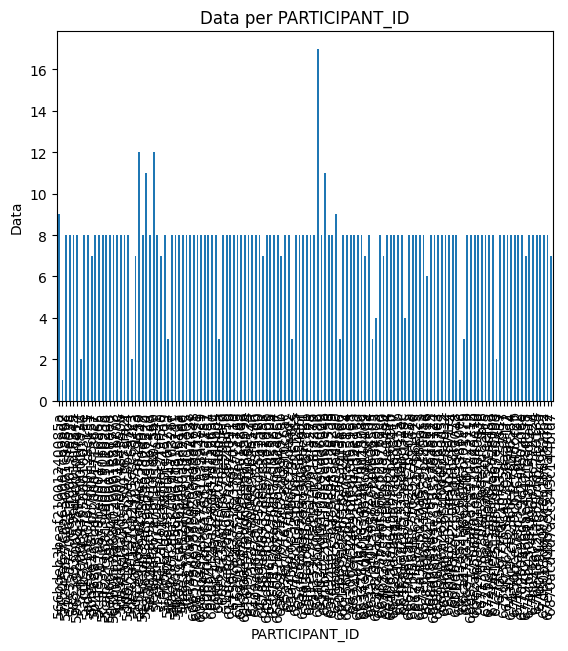

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
57b345d276b2ea0001c988bc      476638
57c357770e6a1f00015f6038     1162911
5883a935c0c9a10001df6345      825654
                              ...   
67be486c2fafa97dd2710135      408449
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
67e184908b8cd53c87ac90a2     1439517
6870acd4d7a2c843c144bfd7     7504700
Length: 136, dtype: int64


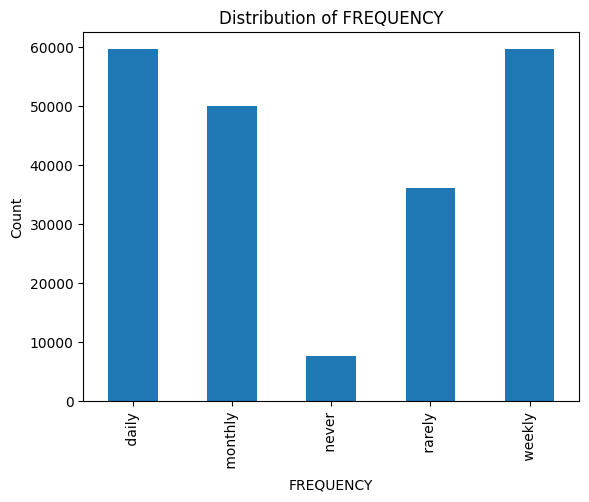

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [70]:
print(unique_participant_ids(data_id_cleaned))
print(print_pids(all_valid_files))
print(submissions_per_pid(data_id_cleaned))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_valid_files))

print(calculate_time_per_file(all_valid_files))

## Folder contains participant ids with more than 8 submissions

In [71]:
import os
import shutil
from collections import Counter
from pathlib import Path
import pandas as pd

def clean_full_submission(folder: str | os.PathLike) -> dict:
    """
    Scan `folder` for CSVs, count how many files each PARTICIPANT_ID appears in
    (counting once per file), and create 'data/full_submissions' containing only
    files whose PARTICIPANT_ID appears in exactly 8 files.

    Returns:
        {
            "counts": Counter({participant_id: num_files, ...}),
            "ids_exactly_8": set([...]),
            "ids_less_than_8": set([...]),
            "ids_more_than_8": set([...]),
            "file_to_id": {Path(...): "participant_id", ...},
            "output_dir": Path("data/full_submissions"),
            "problems": [(Path(...), "message"), ...],
        }
    """
    folder = Path(folder)
    csv_files = sorted(p for p in folder.glob("*.csv") if p.is_file())
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in: {folder}")

    file_to_id: dict[Path, str] = {}
    problems: list[tuple[Path, str]] = []

    for f in csv_files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
            if "PARTICIPANT_ID" not in df.columns:
                problems.append((f, "Missing column 'PARTICIPANT_ID'"))
                continue

            s = df["PARTICIPANT_ID"].astype(str).str.strip()
            vals = [v for v in s if v and v.lower() != "nan"]
            if not vals:
                problems.append((f, "No participant ID values"))
                continue

            # Expect a single ID per file; if not, use the mode
            unique_ids = set(vals)
            if len(unique_ids) == 1:
                pid = next(iter(unique_ids))
            else:
                pid = pd.Series(vals).value_counts().idxmax()
                problems.append((f, f"Multiple IDs found, using most frequent: {pid}"))

            file_to_id[f] = str(pid)

        except Exception as e:
            problems.append((f, f"Error reading file: {e!s}"))

    # Count files per participant (each file contributes at most once)
    counts = Counter(file_to_id.values())
    ids_exactly_8 = {pid for pid, c in counts.items() if c == 8}
    ids_less_than_8 = {pid for pid, c in counts.items() if c < 8}
    ids_more_than_8 = {pid for pid, c in counts.items() if c > 8}

    # Create output dir exactly like your working snippet (relative, no leading slash)
    output_dir = Path("data") / "full_submissions"
    os.makedirs(output_dir, exist_ok=True)

    # Optional: clear existing files so the folder reflects the current rule
    for p in output_dir.iterdir():
        if p.is_file():
            p.unlink()

    # Copy only files whose participant has exactly 8 files in total
    selected_files = [f for f, pid in file_to_id.items() if pid in ids_exactly_8]
    for f in selected_files:
        shutil.copy(f, output_dir / f.name)

    # Quick console summary
    print(f"Scanned {len(csv_files)} files in: {folder}")
    print(f">8 files: {sorted(ids_more_than_8)}")
    print(f"<8 files: {sorted(ids_less_than_8)}")
    print(f"=8 files: {sorted(ids_exactly_8)}")
    print(f"Copied {len(selected_files)} files to: {output_dir.resolve()}")

    return {
        "counts": counts,
        "ids_exactly_8": ids_exactly_8,
        "ids_less_than_8": ids_less_than_8,
        "ids_more_than_8": ids_more_than_8,
        "file_to_id": file_to_id,
        "output_dir": output_dir,
        "problems": problems,
    }


In [72]:
result = clean_full_submission('data/valid_keystrokes')

Scanned 1032 files in: data\valid_keystrokes
>8 files: ['566bdeb3beaf21001240085a', '5e5ce9165cd2ad4c23019550', '5ea56ad134f3aa550dd26320', '5ed94af267e7bf10f180c5b0', '65fae23bd06ae76bcc297e8b', '65fbb4220141f00a2ed68e4b', '65feaaac53eb219f09ad5ea0']
<8 files: ['57507e67fcaa630007cb9ad2', '5abc0d68436f550001ff83ff', '5bb58e338f3bd70001e5df57', '5de42a01a7cb2401ccc682c3', '5de90f54a48441037ac21f43', '5f4e12f4bfcaa83ec7f3f5f0', '5fa76304caa4374da116923a', '60f06a479c4f3ec0a536d40a', '647869e6f69318bacc341d53', '65689a7642fbd31df35497eb', '65a45ac08354b6cf79cc48cc', '6609688e8e4fe9698ab13a66', '6634e4d4f1950b4dcd44d4d9', '663a7af013938e6bbfb065d5', '663b8164ac148ec74b884ed5', '664b33c7c40530f620a719a0', '66568a94f8713133e461fe9c', '6682afdddc274c7cc3e4ea16', '66c4a3da2faac6abe33860ec', '66ca1c321a8e2b7f6bf01c79', '672f4f1751ad53d8967e67bd', '6779432466bae4912f58dd58', '6870acd4d7a2c843c144bfd7']
=8 files: ['57b345d276b2ea0001c988bc', '57c357770e6a1f00015f6038', '5883a935c0c9a10001df6345'

### verify grafically 8 submissions cleaned

In [73]:
folder = 'data/full_submissions'
all_full_submission = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_full_submission:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_full = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data_id_full.columns]
data_id_full = data_id_full.drop_duplicates(subset=subset_cols, ignore_index=True)



Count of unique PARTICIPANT_IDs: 106
None
Unique PARTICIPANT_IDs:
5f29eff59714081a3594a331
5adae3ebdec767000128c131
5fb2d087a956be967181e2d1
6725030a6ee43d8130ceefc5
65a3ec77f674ac3e98f0c6ac
666f76b68b89442817be678a
65c7b42c1c15b1064e26f265
6527f153bea7b2d7c0d556e4
5fc9ec3d0990d4501dfd7e05
664e413a5f3eb7f99d90e15b
606598de386cd206c99a4648
6702f60844f21087e0840e3d
66bb6b7e0ccbed81f3ed30a8
65eafe348dd7dad3b69be921
669d0b18e3a1ae0b5f7571ef
65fc95c627592d85499ae358
67430c9cce2366e644146584
668f066d8731a18ec696370a
67709b0a96dcc9c2a7b0a06e
5fbfe145e52a44000a9c2966
649dba79b97070557ebe3d0b
5c4f5967aac8be0001716a65
5bf368846edd7200017136c7
67356f7cf6ff16fe3322a837
6672bf56d51710391ce2164d
6400e3697879c55c323f34d0
65f333c755d191fcd18fa279
667ed7eb53e109339bf80baa
5cab22cd68194f001511b2d6
57b345d276b2ea0001c988bc
65fb34c4df61f03ce0dd6dd9
60f23a36acf5f6c70e990efd
6672fea3fe6378e257b6ef25
6679a3b7cb020a6e4728eac5
66b4f89242c0ff3aab8f8774
6136cb52db0f1cb2262bbf5d
664b65aa96495b522be699fb
67450bce7

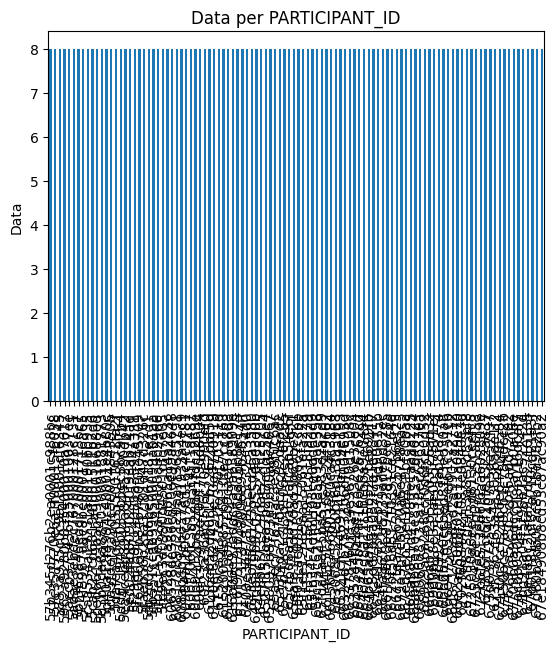

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
57b345d276b2ea0001c988bc      476638
57c357770e6a1f00015f6038     1162911
5883a935c0c9a10001df6345      825654
                              ...   
67be486c2fafa97dd2710135      408449
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
67e184908b8cd53c87ac90a2     1439517
6870acd4d7a2c843c144bfd7     7504700
Length: 136, dtype: int64


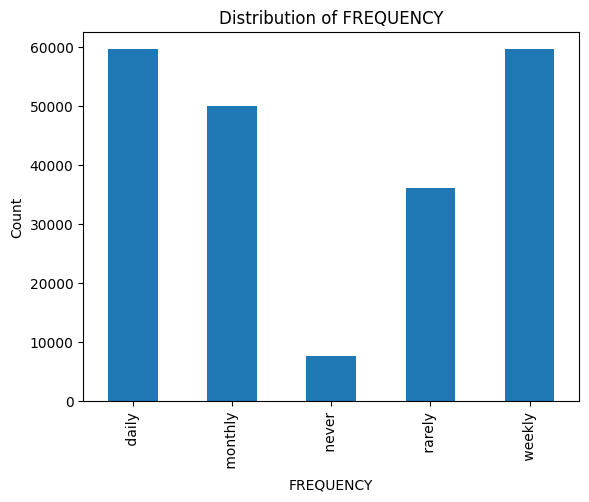

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [74]:
print(unique_participant_ids(data_id_full))
print(print_pids(all_full_submission))
print(submissions_per_pid(data_id_full))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_full_submission))

print(calculate_time_per_file(all_full_submission))

In [75]:
from pathlib import Path
import pandas as pd

def _is_ascii_printable(ch: str) -> bool:
    o = ord(ch)
    return 0x20 <= o <= 0x7E  # space .. ~

def _is_cjk_like(ch: str) -> bool:
    o = ord(ch)
    # Unified ideographs + extensions
    return (
        (0x4E00 <= o <= 0x9FFF) or        # CJK Unified Ideographs
        (0x3400 <= o <= 0x4DBF) or        # CJK Extension A
        (0x20000 <= o <= 0x2A6DF) or      # CJK Extension B
        (0x2A700 <= o <= 0x2B73F) or      # CJK Extension C
        (0x2B740 <= o <= 0x2B81F) or      # CJK Extension D
        (0x2B820 <= o <= 0x2CEAF) or      # CJK Extension E
        (0x2CEB0 <= o <= 0x2EBEF) or      # CJK Extension F/G
        (0xF900 <= o <= 0xFAFF) or        # CJK Compatibility Ideographs
        (0x3040 <= o <= 0x309F) or        # Hiragana
        (0x30A0 <= o <= 0x30FF) or        # Katakana
        (0xFF65 <= o <= 0xFF9F) or        # Halfwidth Katakana
        (0xAC00 <= o <= 0xD7AF) or        # Hangul Syllables
        (0x1100 <= o <= 0x11FF)           # Hangul Jamo
    )

def _tally_token(token: str, process_markers=("process", "dead", "ime")):
    """
    Count characters within a single token/keystroke label.
    Returns (ascii_printable, cjk_like, other, process_flag)
    """
    if token is None:
        return 0, 0, 0, 0

    t = str(token).strip()
    # If the logger writes special events as words like 'Process', 'Dead', etc.
    if t.lower() in process_markers:
        return 0, 0, 0, 1

    ascii_cnt = sum(_is_ascii_printable(ch) for ch in t)
    cjk_cnt   = sum(_is_cjk_like(ch)       for ch in t)
    other_cnt = max(len(t) - ascii_cnt - cjk_cnt, 0)
    return ascii_cnt, cjk_cnt, other_cnt, 0

def detect_majority_regular_keys(
    folder,
    key_col="KEY",                 # change to your keystroke column name if different
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime"),
    per_file_mode=True,            # if True, only the mode key label per file counts once (less bias)
):
    """
    Scans all CSVs in `folder` and estimates, per participant and overall, whether
    keystrokes_before are mostly regular ASCII vs. CJK/IME composition ('Process/Dead/IME').

    Returns:
      {
        "overall": { "ascii_ratio": float, "cjk_ratio": float, "process_ratio": float, "classification": str },
        "participants": {
            "<participant_id>": {
                "ascii_ratio": float,
                "cjk_ratio": float,
                "process_ratio": float,
                "n_tokens": int,
                "classification": "regular" | "cjk_like" | "ime_process_heavy"
            },
            ...
        }
      }
    """
    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    # Per-participant tallies
    per_pid = {}

    # Helper to update tallies
    def _accumulate(pid, token):
        a, c, o, p = _tally_token(token, process_markers)
        rec = per_pid.setdefault(pid, {"ascii":0, "cjk":0, "other":0, "process":0, "n":0})
        rec["ascii"] += a
        rec["cjk"]   += c
        rec["other"] += o
        rec["process"] += p
        rec["n"]     += max(len(str(token)) if token is not None else 0, p)  # count chars or 1 for process

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Error reading {f.name}: {e}")
            continue

        if participant_id_col not in df.columns:
            print(f"Skipping {f.name}: missing '{participant_id_col}'")
            continue
        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        # determine the file's participant id (expect single id; fallback to mode)
        pids = df[participant_id_col].dropna().astype(str).str.strip()
        pid = pids.mode().iloc[0] if not pids.empty else "__unknown__"

        keys = df[key_col].dropna().astype(str)

        if per_file_mode:
            # Use the most frequent key label in the file to avoid bias from very long texts
            token = keys.mode().iloc[0] if not keys.empty else None
            _accumulate(pid, token)
        else:
            for token in keys:
                _accumulate(pid, token)

    # Compute ratios and classifications
    def _ratios(rec):
        total_chars = rec["ascii"] + rec["cjk"] + rec["other"]
        total_events = total_chars + rec["process"]  # treat process as its own bucket
        if total_events == 0:
            return 0.0, 0.0, 0.0
        ascii_ratio   = rec["ascii"]   / total_events
        cjk_ratio     = rec["cjk"]     / total_events
        process_ratio = rec["process"] / total_events
        return ascii_ratio, cjk_ratio, process_ratio

    def _classify(ascii_ratio, cjk_ratio, process_ratio):
        # Simple, interpretable heuristics; tweak thresholds to your dataset.
        if process_ratio >= 0.30:
            return "ime_process_heavy"
        if cjk_ratio >= 0.30 and ascii_ratio < 0.60:
            return "cjk_like"
        return "regular"

    participants = {}
    overall_rec = {"ascii":0, "cjk":0, "other":0, "process":0, "n":0}

    for pid, rec in per_pid.items():
        a, c, p = _ratios(rec)
        participants[pid] = {
            "ascii_ratio": round(a, 3),
            "cjk_ratio": round(c, 3),
            "process_ratio": round(p, 3),
            "n_tokens": rec["n"],
            "classification": _classify(a, c, p)
        }
        for k in ("ascii","cjk","other","process","n"):
            overall_rec[k] += rec[k]

    oa, oc, op = _ratios(overall_rec)
    result = {
        "overall": {
            "ascii_ratio": round(oa, 3),
            "cjk_ratio": round(oc, 3),
            "process_ratio": round(op, 3),
            "classification": _classify(oa, oc, op)
        },
        "participants": participants
    }
    return result


In [76]:
stats = detect_majority_regular_keys("data/keystrokes", key_col="LETTER")  # change key_col if needed
print("Overall:", stats["overall"])

# Inspect a participant:
for pid, info in list(stats["participants"].items())[:5]:
    print(pid, info)


Overall: {'ascii_ratio': 0.999, 'cjk_ratio': 0.0, 'process_ratio': 0.001, 'classification': 'regular'}
566bdeb3beaf21001240085a {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 33, 'classification': 'regular'}
57507e67fcaa630007cb9ad2 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 5, 'classification': 'regular'}
57b345d276b2ea0001c988bc {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 23, 'classification': 'regular'}
57c357770e6a1f00015f6038 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 16, 'classification': 'regular'}
5883a935c0c9a10001df6345 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 24, 'classification': 'regular'}


In [77]:
from pathlib import Path
import pandas as pd

def find_irregular_files_and_ids(
    folder,
    key_col="KEY",                 # change to your column name
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime", "composition"),
):
    """
    Scans all CSV files in `folder` and flags files that contain irregular key events:
      - Non-ASCII characters (not printable 0x20..0x7E)
      - CJK/Hangul/Hiragana/Katakana characters
      - Special tokens like 'Process', 'Dead', 'IME', 'Composition'

    Returns:
      {
        "irregular_files": { Path(...) : {"participant_ids": set([...]), "irregular_tokens": set([...])}, ... },
        "regular_files":   set([Path(...), ...]),
        "irregular_ids":   set([...])   # all participant IDs that ever had irregular input
      }
    """

    def _is_ascii_printable(ch: str) -> bool:
        return 0x20 <= ord(ch) <= 0x7E

    def _is_cjk_like(ch: str) -> bool:
        o = ord(ch)
        return (
            (0x4E00 <= o <= 0x9FFF) or (0x3400 <= o <= 0x4DBF) or
            (0x20000 <= o <= 0x2EBEF) or (0xF900 <= o <= 0xFAFF) or
            (0x3040 <= o <= 0x30FF) or (0xFF65 <= o <= 0xFF9F) or
            (0xAC00 <= o <= 0xD7AF) or (0x1100 <= o <= 0x11FF)
        )

    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    irregular_files = {}
    irregular_ids = set()
    regular_files = set()

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue

        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        pids = set()
        if participant_id_col in df.columns:
            pids = set(df[participant_id_col].dropna().astype(str).str.strip())

        irregular_tokens = set()
        for token in df[key_col].dropna().astype(str):
            t = token.strip()
            if not t:
                continue
            if t.lower() in process_markers:
                irregular_tokens.add(t)
                continue
            for ch in t:
                if not _is_ascii_printable(ch):
                    irregular_tokens.add(ch)

        if irregular_tokens:
            irregular_files[f] = {
                "participant_ids": pids,
                "irregular_tokens": irregular_tokens,
            }
            irregular_ids.update(pids)
        else:
            regular_files.add(f)

    # Summary
    print(f"Checked {len(files)} files in {folder}")
    print(f"Regular files: {len(regular_files)}")
    print(f"Irregular files: {len(irregular_files)}")
    print(f"Irregular participant IDs: {len(irregular_ids)}")

    if irregular_files:
        print("\nExamples of irregular files:")
        for f, info in list(irregular_files.items())[:10]:
            print(f" - {f.name} (pids={list(info['participant_ids'])}): "
                  f"{list(info['irregular_tokens'])[:5]}...")

    return {
        "irregular_files": irregular_files,
        "regular_files": regular_files,
        "irregular_ids": irregular_ids,
    }


In [78]:
results = find_irregular_files_and_ids("data/full_submissions", key_col="LETTER")

# Get all irregular participant IDs
print("Irregular IDs:", results["irregular_ids"])

# Inspect irregular files
for f, info in results["irregular_files"].items():
    print(f.name, info["participant_ids"], info["irregular_tokens"])


Checked 848 files in data\full_submissions
Regular files: 815
Irregular files: 33
Irregular participant IDs: 19

Examples of irregular files:
 - experiment_5ed02ffb8090240f93ab74ad_20250904153142.csv (pids=['5ed02ffb8090240f93ab74ad']): ['¡']...
 - experiment_5ed02ffb8090240f93ab74ad_20250904154426.csv (pids=['5ed02ffb8090240f93ab74ad']): ['¡']...
 - experiment_606598de386cd206c99a4648_20250827100151.csv (pids=['606598de386cd206c99a4648']): ['ι', 'τ', 'ρ', 'ς']...
 - experiment_6081728972120aa7f9685791_20250819163340.csv (pids=['6081728972120aa7f9685791']): ['№']...
 - experiment_6081728972120aa7f9685791_20250819164901.csv (pids=['6081728972120aa7f9685791']): ['н', 'ф', 'ш', 'ы', 'у']...
 - experiment_60f23a36acf5f6c70e990efd_20250826202528.csv (pids=['60f23a36acf5f6c70e990efd']): ['ç']...
 - experiment_616b06e97addc4a9a638909e_20250904212714.csv (pids=['616b06e97addc4a9a638909e']): ['¿']...
 - experiment_616b06e97addc4a9a638909e_20250904213058.csv (pids=['616b06e97addc4a9a638909e']): 

In [79]:
from pathlib import Path
import pandas as pd

def list_files_with_nan(
    folder,
    pattern="*.csv",
    columns=None,            # e.g. ["KEY", "PARTICIPANT_ID"]; None = check all columns
    keep_default_na=True,    # True = pandas treats "", "NA", "NaN", etc. as NaN
    show_counts=False        # True = also print per-file counts
):
    """
    Print and return only the files that contain NaN values.

    Returns: list[Path] with files that have any NaN.
    """
    folder = Path(folder)
    hits = []

    for f in sorted(p for p in folder.glob(pattern) if p.is_file()):
        try:
            df = pd.read_csv(f, low_memory=False, keep_default_na=keep_default_na)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Skip {f.name}: {e}")
            continue

        scope = df if columns is None else df[columns]
        has_nan = scope.isna().any().any()
        if has_nan:
            hits.append(f)
            if show_counts:
                by_col = scope.isna().sum()
                n_rows = scope.isna().any(axis=1).sum()
                print(f"{f}  -> rows_with_NaN={n_rows}, by_column={{k:v for k,v in by_col.items() if v}}")
            else:
                print(f)

    print(f"\n{len(hits)} file(s) with NaN.")
    return hits


In [80]:
# Check all columns in all CSVs and print only files that contain NaN
list_files_with_nan("data/full_submissions", show_counts=True)


0 file(s) with NaN.


[]

### no files containing Nan values, no false Ids, no incomplete submissions

## find method to link keystrokes charAtpos with marked text (confident, unconfident) -> output linked_charAt

In [81]:
import os
import re
import difflib
from pathlib import Path
from typing import List, Dict, Optional, Tuple
import pandas as pd

# --- helpers ---------------------------------------------------------------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _normalize_key_token(tok: str) -> str:
    """
    Normalize raw key labels. Preserve literal space; map space-like labels to ' '; DO NOT confuse Backspace.
    """
    raw = str(tok)               # do NOT strip yet
    low_raw = raw.lower()

    # 1) Literal space character
    if raw == " ":
        return " "

    # 2) Space-like labels (guard against 'backspace')
    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    # 3) Other aliases
    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _is_printable_char(tok: str) -> bool:
    return isinstance(tok, str) and len(tok) == 1

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_key_column(df: pd.DataFrame) -> Optional[str]:
    if "LETTER" in df.columns:
        return "LETTER"
    if "KEY" in df.columns:
        return "KEY"
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

# --- produced -> prompt alignment -----------------------------------------

def _map_produced_to_prompt_indices(produced: str, prompt: str) -> Dict[int, int]:
    m = difflib.SequenceMatcher(a=produced, b=prompt, autojunk=False)
    mapping: Dict[int, int] = {}
    for tag, a0, a1, b0, b1 in m.get_opcodes():
        if tag == "equal":
            for off in range(a1 - a0):
                mapping[a0 + off] = b0 + off
        elif tag == "replace":
            alen, blen = (a1 - a0), (b1 - b0)
            if alen == 0:
                continue
            for off in range(alen):
                bi = b0 if blen == 0 else b0 + round(off * (blen / max(alen, 1)))
                bi = min(max(b0, bi), max(b0, b1 - 1)) if blen > 0 else b0
                mapping[a0 + off] = bi
        elif tag == "delete":
            fallback = max(0, b0 - 1) if len(prompt) else -1
            for off in range(a1 - a0):
                mapping[a0 + off] = fallback
        # 'insert' has no produced chars to map
    # fill gaps (keep None higher up instead of forcing to 0)
    last = None
    for i in range(len(produced)):
        if i not in mapping:
            mapping[i] = last
        else:
            last = mapping[i]
    return mapping

def _remap_keys_to_prompt_indices(
    key_to_prod_idx: Dict[int, Optional[int]],
    produced: str,
    prompt: str,
) -> Dict[int, Optional[int]]:
    """
    Map keystroke -> produced_index to keystroke -> prompt_index.
    Missing produced indices remain None; do NOT coerce to 0 here.
    """
    if not prompt:
        return {k: None for k in key_to_prod_idx}
    prod2prompt = _map_produced_to_prompt_indices(produced, prompt)
    L = len(prompt)
    out: Dict[int, Optional[int]] = {}
    for k, p in key_to_prod_idx.items():
        if p is None:
            out[k] = None
        else:
            q = prod2prompt.get(p, None)
            if q is None:
                out[k] = None
            else:
                # clamp safety (SequenceMatcher shouldn't produce <0 or >=L here)
                if q < 0: q = 0
                if q >= L: q = L - 1
                out[k] = q
    return out

# --- typing simulation -----------------------------------------------------

def _simulate_keys_to_produced_index(keys: List[str]) -> Tuple[Dict[int, Optional[int]], str, List[str]]:
    """
    Editor-accurate simulation with a movable cursor and select-all semantics.

    Returns:
      key_to_prod_idx: dict[row_index] -> produced_char_index (position in final produced string),
                        or None for keys that don't directly produce a char (before second-pass remap)
      produced: final produced string
      norm_tokens: normalized token list

    Behavior:
      - Printable chars insert at the current cursor position (honors Shift/Cap uppercasing for letters).
      - Backspace/Delete remove relative to cursor (Backspace: before cur; Delete: at cur).
      - ArrowLeft/Right move the cursor within [0, len(buf)].
      - Home/End jump cursor to 0 / len(buf).
      - Ctrl+A selects all. Next printable replaces the selection. Backspace/Delete clear selection.
      - Non-text-effect keys (Shift/Cap, arrows, Process, Home/End, etc.) will be remapped later
        to the next surviving character's produced index.
      - Printable characters that were later deleted are also remapped to the next survivor.
    """
    # Text buffer and per-position provenance (which key created each char)
    buf: List[str] = []
    producers: List[int] = []

    # Mapping from key index -> produced index (provisional)
    key_to_idx: Dict[int, Optional[int]] = {}

    # Cursor & selection
    cur = 0
    sel_active = False
    sel_start = 0
    sel_end = 0

    # Shift/caps handling for the NEXT character only
    cap_next = False
    cap_key_index: Optional[int] = None

    norm_tokens = [_normalize_key_token(x) for x in keys]

    def _clear_selection_record_deletes():
        """Delete the selected range, recording deleted producers; return insertion point."""
        nonlocal buf, producers, sel_active, sel_start, sel_end, cur
        if not sel_active or sel_start == sel_end:
            return cur
        # delete range [sel_start:sel_end)
        del buf[sel_start:sel_end]
        del producers[sel_start:sel_end]
        cur = sel_start
        sel_active = False
        return cur

    def _insert_char(ch: str, key_idx: int):
        """Insert character at cursor (replacing selection if active)."""
        nonlocal buf, producers, cur, cap_next, cap_key_index
        # replace selection if present
        _clear_selection_record_deletes()

        ch_out = ch.upper() if cap_next and ch.isalpha() else ch
        buf[cur:cur] = [ch_out]
        producers[cur:cur] = [key_idx]
        # produced index is the position where it finally lives (for now)
        key_to_idx[key_idx] = cur

        # Map preceding Shift/Cap to the same produced index
        if cap_next and cap_key_index is not None:
            key_to_idx[cap_key_index] = cur

        # advance cursor, clear cap
        cur += 1
        cap_next = False
        cap_key_index = None

    def _backspace(key_idx: int):
        """Backspace: delete char BEFORE cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur  # provisional; remap to next survivor later
            return
        if cur > 0:
            del buf[cur-1]
            del producers[cur-1]
            cur -= 1
            key_to_idx[key_idx] = cur  # provisional

    def _delete(key_idx: int):
        """Delete: delete char AT cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur
            return
        if cur < len(buf):
            del buf[cur]
            del producers[cur]
            key_to_idx[key_idx] = cur  # provisional

    # --- First pass: simulate editor with cursor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Cap", "Shift"):
            cap_next = True
            cap_key_index = i
            key_to_idx[i] = None
            continue

        if tok in ("Ctrl+A", "Ctrl+a"):
            # select all
            sel_active = True
            sel_start, sel_end = 0, len(buf)
            key_to_idx[i] = None
            continue

        # Cursor movement
        if tok == "ArrowLeft":
            # cancel selection and move left by one
            sel_active = False
            cur = max(0, cur - 1)
            key_to_idx[i] = None
            continue
        if tok == "ArrowRight":
            sel_active = False
            cur = min(len(buf), cur + 1)
            key_to_idx[i] = None
            continue
        if tok == "Home":
            sel_active = False
            cur = 0
            key_to_idx[i] = None
            continue
        if tok == "End":
            sel_active = False
            cur = len(buf)
            key_to_idx[i] = None
            continue

        # Deletions
        if tok == "Backspace":
            _backspace(i)
            continue
        if tok == "Delete":
            _delete(i)
            continue

        # Non-text-effect (do nothing now; remap later)
        if tok in {"ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"}:
            key_to_idx[i] = None
            continue

        # Printable?
        if _is_printable_char(tok):
            _insert_char(tok, i)
        else:
            # Unknown token -> treat as no-text-effect
            key_to_idx[i] = None

    produced = "".join(buf)

    # Survivors: producer key -> its FINAL produced position
    final_pos_by_key: Dict[int, int] = {kid: idx for idx, kid in enumerate(producers)}

    # Build "next surviving produced index" for each key index (scan right-to-left)
    next_surviving_prod_idx: List[Optional[int]] = [None] * len(norm_tokens)
    next_seen: Optional[int] = None
    for i in range(len(norm_tokens) - 1, -1, -1):
        if i in final_pos_by_key:
            next_seen = final_pos_by_key[i]
        next_surviving_prod_idx[i] = next_seen

    # --- Second pass: remap non-survivors & no-text keys to the NEXT survivor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Backspace", "Delete", "Cap", "Shift",
                   "ArrowLeft", "ArrowRight", "Home", "End",
                   "ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"):
            key_to_idx[i] = next_surviving_prod_idx[i]
            continue

        if _is_printable_char(tok):
            # if this printable didn't survive, follow the next survivor
            if i not in final_pos_by_key:
                key_to_idx[i] = next_surviving_prod_idx[i]
            else:
                key_to_idx[i] = final_pos_by_key[i]
        # else: unknown non-printable stays None

    return key_to_idx, produced, norm_tokens



# --- main ------------------------------------------------------------------

def create_prompt_char(path: str | os.PathLike):
    """
    Creates data/linked_charAt/ with same CSVs extended by PROMPT_CHAR.
    - Every Shift maps to the same index as the next surviving printable.
    - Backspace/Delete map to the NEXT valid position (next surviving printable).
    - Printables typed then erased inherit the next surviving printable’s index.
    - If no later printable exists (trailing edits), keys map to the LAST prompt index.
    - Spaces are printable and advance naturally.
    - Unmappable keys -> -1.
    """
    path = Path(path)
    out_dir = Path("data") / "linked_charAt"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        key_col = _find_key_column(df)
        if not key_col:
            print(f"[skip] {f.name}: missing 'LETTER' or 'KEY' column")
            continue

        prompt = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt)
        L = len(prompt)

        keys = df[key_col].astype(str).tolist()
        key_to_prod_idx, produced, norm_tokens = _simulate_keys_to_produced_index(keys)

        # Align produced -> prompt
        key_to_prompt_idx = _remap_keys_to_prompt_indices(key_to_prod_idx, produced, prompt)

        # Final safety: if there's NO later printable, push these to LAST prompt index
        if L > 0:
            for i, tok in enumerate(norm_tokens):
                if key_to_prompt_idx.get(i) is None and (
                    tok in ("Backspace", "Delete", "Cap", "Shift") or _is_printable_char(tok)
                ):
                    key_to_prompt_idx[i] = L - 1

        # Emit PROMPT_CHAR
        n = len(df)
        max_key = max(key_to_prompt_idx.keys()) if key_to_prompt_idx else -1
        out = []
        for i in range(n):
            if i <= max_key:
                v = key_to_prompt_idx.get(i, None)
                out.append(int(v) if v is not None else -1)
            else:
                out.append(-1)

        df["PROMPT_CHAR"] = pd.Series(out, dtype="int64")

        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with PROMPT_CHAR written to: {out_dir.resolve()}")


In [82]:
create_prompt_char("data/full_submissions")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_

### indexes to corresponding prompt characters created
-> check for ctrl+a+Backspace behaviour

In [83]:
from pathlib import Path
import pandas as pd

def _find_key_col(df):
    if "LETTER" in df.columns: return "LETTER"
    if "KEY" in df.columns:    return "KEY"
    # case-insensitive fallback
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

def _norm(tok: str) -> str:
    s = str(tok).strip()
    low = s.lower()
    # normalize common variants
    if low in {"ctrl", "control", "lctrl", "rctrl", "leftctrl", "rightctrl", "ctrl_l", "ctrl_r"}:
        return "ctrl"
    if low in {"backspace", "bksp", "bspace"}:
        return "backspace"
    # normalize chord forms like "ctrl + a", "Ctrl+A"
    low = low.replace(" ", "")
    if low in {"ctrl+a", "control+a"}:
        return "ctrl+a"
    return s.lower()  # letters like 'a', 'b', ' ' (space) etc.

def find_ctrl_a_backspace_sequences(folder, pattern="*.csv", max_print_hits=10):
    """
    Look for suspicious consecutive patterns that can break indexing:
      1) 'ctrl', 'a', 'backspace'  (three consecutive rows)
      2) 'ctrl+a', 'backspace'     (two consecutive rows when chord is logged as one token)

    Prints the file names and row indices where the pattern occurs.
    Returns: dict[Path, {"triple": [(i,i+1,i+2), ...], "chord": [(i,i+1), ...]}]
    """
    folder = Path(folder)
    results = {}
    files = sorted(p for p in folder.glob(pattern) if p.is_file())

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        col = _find_key_col(df)
        if not col:
            # no keystroke column
            continue

        toks = [_norm(x) for x in df[col].astype(str).tolist()]

        triple_hits = []
        chord_hits  = []

        # three-row pattern: ctrl, a, backspace
        for i in range(len(toks) - 2):
            if toks[i] == "ctrl" and toks[i+1] == "a" and toks[i+2] == "backspace":
                triple_hits.append((i, i+1, i+2))

        # two-row pattern: ctrl+a, backspace
        for i in range(len(toks) - 1):
            if toks[i] == "ctrl+a" and toks[i+1] == "backspace":
                chord_hits.append((i, i+1))

        if triple_hits or chord_hits:
            results[f] = {"triple": triple_hits, "chord": chord_hits}

    # ---- report
    if not results:
        print("No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.")
        return {}

    print("Found files with potential Ctrl+A→Backspace sequences:")
    for f, hits in results.items():
        print(f" - {f.name}")
        # show a few example indices
        if hits["triple"]:
            show = hits["triple"][:max_print_hits]
            print(f"    triple (ctrl, a, backspace): {show}" + (" ..." if len(hits['triple']) > len(show) else ""))
        if hits["chord"]:
            show = hits["chord"][:max_print_hits]
            print(f"    chord  (Ctrl+A, backspace): {show}" + (" ..." if len(hits['chord']) > len(show) else ""))

    return results


In [84]:
# Scan the folder you processed (e.g., data/linked_charAt or your raw folder)
find_ctrl_a_backspace_sequences("data/full_submissions")

# If your CSVs use KEY instead of LETTER, it’s handled automatically.
# You can also scan the already-extended files:
find_ctrl_a_backspace_sequences("data/linked_charAt")


No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.
No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.


{}

## Now generate files that link CONFIDENT and UNCONFIDENT to PROMPT_CHAR indexes ->output concrete_chars

In [85]:
from pathlib import Path
import re
import pandas as pd
import os
from typing import List, Tuple, Optional, Set

# -------- helpers --------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts formats like: [4,84], (4,84), 4,84, 4-84, 4;84, and multiples separated by ';' or '|'
    Returns inclusive pairs [(start, end), ...].
    Single numbers become (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    # split multiple spans
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b:
                a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """
    Clamp inclusive spans to [0, max_index]. Drop spans entirely outside.
    (Handles your 'end might be +1 at very end' case by clamping to max_index.)
    """
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _span_to_index_set(spans: List[Tuple[int, int]]) -> Set[int]:
    idx: Set[int] = set()
    for a, b in spans:
        idx.update(range(a, b + 1))
    return idx

# -------- main --------

def create_concrete_chars(path: str | os.PathLike):
    """
    Reads all CSVs in `path` and writes them to data/concrete_chars/ with:
      - CONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any CONFIDENT span
      - UNCONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any UNCONFIDENT span

    Notes:
    - PROMPT_CHAR is expected to be 0-based index per row; rows with PROMPT_CHAR == -1 get 0.
    - CONFIDENT/UNCONFIDENT may contain multiple span ranges like "[4,84];[95,105]".
    - Span ends are clamped to len(PROMPT)-1 to tolerate a +1 overrun at the very end.
    """
    path = Path(path)
    out_dir = Path("data") / "concrete_chars"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT length (for clamping)
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1  # can be -1 if empty

        # PROMPT_CHAR column must exist
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue
        # Coerce PROMPT_CHAR to numeric (keep -1 for invalids)
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        # Parse and clamp CONFIDENT spans
        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        conf_spans = _parse_spans(conf_raw)
        conf_spans = _clamp_spans(conf_spans, max_idx)
        conf_idx = _span_to_index_set(conf_spans)

        # Parse and clamp UNCONFIDENT spans
        unconf_raw = _pick_mode_nonempty(df, "UNCONFIDENT")
        unconf_spans = _parse_spans(unconf_raw)
        unconf_spans = _clamp_spans(unconf_spans, max_idx)
        unconf_idx = _span_to_index_set(unconf_spans)

        # Build 0/1 columns
        if conf_idx:
            df["CONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in conf_idx) else 0).astype("int64")
        else:
            df["CONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        if unconf_idx:
            df["UNCONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in unconf_idx) else 0).astype("int64")
        else:
            df["UNCONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        # Write out
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Extended files are in: {out_dir.resolve()}")


In [86]:
create_concrete_chars("data/linked_charAt")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001

## Now generate words to later link to words that have been markes or WPM, Error rate etc. -> outputs words

In [87]:
from pathlib import Path
import pandas as pd
import os

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str):
    if colname not in df.columns:
        return ""
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def create_words(path: str | os.PathLike):
    """
    Read all CSVs in `path` and write them to ./data/words/ with a new column:
      - WORD (0/1): 1 if the row's PROMPT_CHAR points to a non-space character in PROMPT; else 0.

    Notes:
    - Punctuation and digits are counted as words (1).
    - True spaces are 0.
    - Rows with PROMPT_CHAR == -1 (unmapped) are 0.
    """
    path = Path(path)
    out_dir = Path("data") / "words"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # Need PROMPT_CHAR
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue

        # Get PROMPT (mode non-empty), normalize
        prompt = _norm_text(_pick_mode_nonempty(df, "PROMPT"))
        L = len(prompt)

        # Precompute mask over prompt: 1 for non-space, 0 for space
        if L > 0:
            char_is_word = [0 if prompt[i] == " " else 1 for i in range(L)]
        else:
            char_is_word = []

        # Build WORD column
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        def _row_word(ix: int) -> int:
            if ix < 0 or ix >= L:
                return 0
            return char_is_word[ix]

        df["WORD"] = pc.apply(_row_word).astype("int64")

        # Save
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with WORD written to: {out_dir.resolve()}")


In [88]:
create_words("data/concrete_chars")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019.csv -> data\words\experiment_57b345d276b2

### WPM values -> outputs WPM

In [89]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def _count_words_from_mask(word_series: pd.Series) -> int:
    """
    A word = contiguous run of WORD==1.
    """
    if word_series.empty:
        return 0
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).astype(int).to_numpy()
    if x.size == 0:
        return 0
    starts = (x[1:] == 1) & (x[:-1] == 0)
    return int(x[0] == 1) + int(starts.sum())

def _safe_file_window(press_dt: pd.Series, release_dt: pd.Series) -> tuple[pd.Timestamp | None, pd.Timestamp | None]:
    """
    Use only sane rows: both timestamps present AND release >= press.
    Returns (start, end) or (None, None) if not computable.
    """
    mask = press_dt.notna() & release_dt.notna() & (release_dt >= press_dt)
    if mask.any():
        return press_dt[mask].min(), release_dt[mask].max()

    # Fallbacks (very defensive):
    if press_dt.notna().any() and release_dt.notna().any():
        # If comparisons were weird, try min/max separately
        return press_dt.min(), release_dt.max()
    if press_dt.notna().any():
        t0 = press_dt.min()
        t1 = press_dt.max()
        if t1 > t0:
            return t0, t1
    if release_dt.notna().any():
        t0 = release_dt.min()
        t1 = release_dt.max()
        if t1 > t0:
            return t0, t1
    return None, None

def create_wpm(path: str | os.PathLike):
    """
    Compute:
      - WPM_file per CSV
      - WPM_AVG per PARTICIPANT_ID (mean of that participant's WPM_file)

    Robust to bogus times:
      - 0/negative times ignored
      - rows with RELEASE < PRESS ignored
      - if no valid time window -> duration=0 -> WPM_file=0
    """
    path = Path(path)
    out_dir = Path("data") / "wpm"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        press_col  = _find_col(df, "PRESS_TIME")
        release_col= _find_col(df, "RELEASE_TIME")
        if not word_col or not press_col or not release_col:
            print(f"[skip] {f.name}: missing one of WORD/PRESS_TIME/RELEASE_TIME")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        # Count words (robust to junk)
        words = _count_words_from_mask(df[word_col])

        # Sanitize times
        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Valid window only from rows with sane times
        start, end = _safe_file_window(press_dt, release_dt)

        if start is None or end is None or pd.isna(start) or pd.isna(end) or end <= start:
            duration_sec = 0.0
        else:
            duration_sec = float((end - start).total_seconds())

        duration_min = duration_sec / 60.0 if duration_sec > 0 else 0.0
        wpm_file = (words / duration_min) if (duration_min > 0 and words > 0) else 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(words),
            "duration_seconds": round(duration_sec, 6),
            "WPM_file": round(wpm_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid WPM; nothing to write.")
        return

    wpm_per_file = pd.DataFrame(per_file_rows)

    # Average per participant (mean of WPM_file values)
    wpm_per_participant = (
        wpm_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("WPM_file", "count"),
             WPM_AVG=("WPM_file", "mean"))
        .reset_index()
    )
    wpm_per_participant["WPM_AVG"] = wpm_per_participant["WPM_AVG"].round(6)

    out_dir.mkdir(parents=True, exist_ok=True)
    per_file_path = out_dir / "wpm_per_file.csv"
    per_participant_path = out_dir / "wpm_per_participant.csv"
    wpm_per_file.to_csv(per_file_path, index=False)
    wpm_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. WPM outputs are in: {out_dir.resolve()}")


In [90]:
create_wpm("data/words")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3103073175.py:44:

[ok] wrote data\wpm\wpm_per_file.csv
[ok] wrote data\wpm\wpm_per_participant.csv

Done. WPM outputs are in: C:\Users\dekassla\Coding\kd-processing\data\wpm


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")


### Calculate Error rate per word per file and per participant avg -> outputs error per word

In [91]:
from pathlib import Path
import pandas as pd
import os

# ---- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _is_backspace(tok: str) -> bool:
    if tok is None:
        return False
    t = str(tok).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

def _count_words_and_backspaces(word_series: pd.Series, letter_series: pd.Series):
    """
    Given WORD (0/1) and LETTER, return:
      - num_words: number of contiguous runs where WORD==1
      - bs_per_word_list: list of backspace counts per word (one value per word)
      - total_bs_in_words: sum of backspaces inside word spans
    """
    w = pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int).to_numpy()
    letters = letter_series.astype(str).tolist()

    n = len(w)
    num_words = 0
    bs_per_word = []
    i = 0
    while i < n:
        # skip 0s
        if w[i] == 0:
            i += 1
            continue
        # start of a word run
        start = i
        while i < n and w[i] == 1:
            i += 1
        end = i  # word span is [start, end)
        num_words += 1

        # count backspaces in this span
        bs = 0
        for j in range(start, end):
            if _is_backspace(letters[j]):
                bs += 1
        bs_per_word.append(bs)

    total_bs = sum(bs_per_word)
    return num_words, bs_per_word, total_bs

# ---- main -----------------------------------------------------------------

def create_error_rate(path: str | os.PathLike):
    """
    Compute error rates based on Backspace usage per word.

    Definitions:
      - Word = any contiguous run of WORD == 1 (WORD column must exist; 0/1 values).
      - Backspace detection uses LETTER column (aliases: 'Backspace', 'bksp', 'bspace').
      - ERRORRATE_FILE = average backspaces per word for that file
                         (= total_backspaces_in_words / number_of_words, or 0 if no words).
      - ERRORRATE_AVG_ID = mean(ERRORRATE_FILE) across files per PARTICIPANT_ID.

    Outputs to ./data/ERROR/:
      - error_per_file.csv  (filename, PARTICIPANT_ID, words, backspaces_in_words, ERRORRATE_FILE)
      - error_per_participant.csv (PARTICIPANT_ID, files, ERRORRATE_AVG_ID)
    """
    path = Path(path)
    out_dir = Path("data") / "error_per_word"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")  # fallback to KEY if needed
        if not word_col or not letter_col:
            print(f"[skip] {f.name}: missing WORD and/or LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        num_words, bs_per_word, total_bs = _count_words_and_backspaces(df[word_col], df[letter_col])
        if num_words > 0:
            errorrate_file = total_bs / num_words
        else:
            errorrate_file = 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(num_words),
            "backspaces_in_words": int(total_bs),
            "ERRORRATE_FILE": round(errorrate_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid error rates; nothing to write.")
        return

    error_per_file = pd.DataFrame(per_file_rows)

    # Aggregate per participant: mean of ERRORRATE_FILE
    error_per_participant = (
        error_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("ERRORRATE_FILE", "count"),
             ERRORRATE_AVG_ID=("ERRORRATE_FILE", "mean"))
        .reset_index()
    )
    error_per_participant["ERRORRATE_AVG_ID"] = error_per_participant["ERRORRATE_AVG_ID"].round(6)

    # Save
    per_file_path = out_dir / "error_per_file.csv"
    per_participant_path = out_dir / "error_per_participant.csv"
    error_per_file.to_csv(per_file_path, index=False)
    error_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. Error-rate outputs are in: {out_dir.resolve()}")


In [92]:
create_error_rate("data/words")

[ok] wrote data\error_per_word\error_per_file.csv
[ok] wrote data\error_per_word\error_per_participant.csv

Done. Error-rate outputs are in: C:\Users\dekassla\Coding\kd-processing\data\error_per_word


### calculate total error rate per file and per participant avg -> outputs total_error

In [93]:
from pathlib import Path
import pandas as pd
import os

# --- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _is_backspace(val) -> bool:
    t = str(val).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

# --- main ------------------------------------------------------------------

def create_error_rate_total(path: str | os.PathLike):
    """
    Compute error rates based on Backspace usage relative to total keystrokes_before.

    Per file:
      ERROR_RATE_FILE = (#Backspace rows) / (total rows)

    Per participant (overall, weighted):
      ERROR_RATE_TOTAL_ID = (sum Backspace over all their files) / (sum rows over all their files)

    Writes two CSVs to ./data/ERROR_TOTAL/:
      - error_total_per_file.csv
          [filename, PARTICIPANT_ID, total_rows, backspaces, ERROR_RATE_FILE]
      - error_total_per_participant.csv
          [PARTICIPANT_ID, files, total_rows, total_backspaces, ERROR_RATE_TOTAL_ID]
    """
    path = Path(path)
    out_dir = Path("data") / "total_error"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        if not letter_col:
            print(f"[skip] {f.name}: missing LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col)

        total_rows = int(len(df))
        if total_rows <= 0:
            bs = 0
            err_rate = 0.0
        else:
            bs = int(df[letter_col].apply(_is_backspace).sum())
            err_rate = bs / total_rows

        per_file.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "total_rows": total_rows,
            "backspaces": bs,
            "ERROR_RATE_FILE": round(err_rate, 6),
        })

    if not per_file:
        print("No files produced error-rate data; nothing to write.")
        return

    df_file = pd.DataFrame(per_file)

    # Weighted overall per participant: total_backspaces / total_rows
    agg = (
        df_file.groupby("PARTICIPANT_ID", dropna=False)
               .agg(files=("filename", "count"),
                    total_rows=("total_rows", "sum"),
                    total_backspaces=("backspaces", "sum"))
               .reset_index()
    )
    agg["ERROR_RATE_TOTAL_ID"] = (agg["total_backspaces"] / agg["total_rows"]).fillna(0).round(6)

    # Save
    out_file = out_dir / "error_total_per_file.csv"
    out_part = out_dir / "error_total_per_participant.csv"
    df_file.to_csv(out_file, index=False)
    agg.to_csv(out_part, index=False)

    print(f"[ok] wrote {out_file}")
    print(f"[ok] wrote {out_part}")
    print(f"\nDone. Error totals are in: {out_dir.resolve()}")


In [94]:
create_error_rate_total("data/linked_charAt")  # or the folder with your CSVs


[ok] wrote data\total_error\error_total_per_file.csv
[ok] wrote data\total_error\error_total_per_participant.csv

Done. Error totals are in: C:\Users\dekassla\Coding\kd-processing\data\total_error


### Find duplicate words in PROMPT, difference in marked (CONFIDENT,UNCONFIDENT,NOT MARKED) -> output word_label_conflicts

In [95]:
from pathlib import Path
import os
import re
import pandas as pd
from typing import List, Tuple, Optional, Dict, Set

# ---------- helpers ----------

_STOPWORDS = {
    "a","an","the","and","or","but","if","while","with","without","in","on","at","to","from","for",
    "of","as","by","is","am","are","was","were","be","been","being","it","its","this","that","these",
    "those","he","she","they","we","you","i","me","him","her","them","us","my","your","his","their",
    "our","mine","yours","hers","theirs","ours","do","does","did","doing","have","has","had","having",
    "so","than","then","there","here","also","too","very","just","not","no","nor","into","over","under",
    "up","down","again","further","once"
}

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts: [4,84], (4,84), 4,84, 4-84, etc.; multiple separated by ';' or '|'.
    Returns inclusive spans: [(start, end), ...].
    Single number => (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b: a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """Clamp inclusive spans to [0, max_index]; drop those completely out of range."""
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _spans_to_rangeset(spans: List[Tuple[int,int]]) -> List[Tuple[int,int]]:
    """Merge overlapping/adjacent inclusive spans -> sorted, disjoint inclusive spans."""
    if not spans:
        return []
    spans = sorted(spans)
    merged = [list(spans[0])]
    for a,b in spans[1:]:
        last = merged[-1]
        if a <= last[1] + 1:
            last[1] = max(last[1], b)
        else:
            merged.append([a,b])
    return [(a,b) for a,b in merged]

def _intersects(word_span: Tuple[int,int], label_spans: List[Tuple[int,int]]) -> bool:
    """word_span is inclusive; label_spans are inclusive."""
    ws, we = word_span
    for a,b in label_spans:
        if not (we < a or ws > b):
            return True
    return False

def _tokenize_words_with_spans(prompt: str) -> List[Tuple[str, Tuple[int,int]]]:
    """
    Return list of (word_lower, (start_idx, end_idx_inclusive)) for tokens made of letters/digits/'.
    A word’s span covers exactly its character positions in PROMPT.
    """
    tokens = []
    # allow letters incl. accented + digits + apostrophes inside words
    for m in re.finditer(r"[A-Za-z0-9À-ÖØ-öø-ÿ']+", prompt):
        w = m.group(0)
        if not w:
            continue
        start, end_excl = m.span()
        tokens.append((w.lower(), (start, end_excl - 1)))
    return tokens

# ---------- main ----------

def find_word_label_conflicts(path: str | os.PathLike):
    """
    For each CSV in `path`, summarize words that appear with DIFFERENT labels across occurrences:
      - label per occurrence is one of: CONFIDENT / UNCONFIDENT / NONE
      - a word occurrence is defined by tokenizing PROMPT into words (letters/digits/apostrophes)
      - an occurrence is CONFIDENT if its char span overlaps any CONFIDENT span (inclusive)
        similarly UNCONFIDENT; if overlaps both, it's counted in both (and will be flagged)
      - NONE if it overlaps neither
      - stopwords are ignored

    Outputs (to ./data/word_label_conflicts/):
      - <filename>_word_conflicts.csv (rows only for words with >= 2 distinct labels in this file)
          columns: word, n_confident, n_unconfident, n_none, labels, occurrences (positions)
      - _index.csv listing which files had conflicts and how many terms.

    Prints a brief status per file.
    """
    path = Path(path)
    out_dir = Path("data") / "word_label_conflicts"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    index_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT and spans
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1

        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        unco_raw = _pick_mode_nonempty(df, "UNCONFIDENT")

        conf_spans = _clamp_spans(_parse_spans(conf_raw), max_idx)
        unco_spans = _clamp_spans(_parse_spans(unco_raw), max_idx)

        conf_spans = _spans_to_rangeset(conf_spans)
        unco_spans = _spans_to_rangeset(unco_spans)

        # Tokenize prompt into word occurrences with char spans
        tokens = _tokenize_words_with_spans(prompt)

        # Classify each occurrence
        per_word_labels: Dict[str, Dict[str, int]] = {}
        per_word_pos: Dict[str, List[Tuple[int,int]]] = {}

        for w, (ws, we) in tokens:
            if w in _STOPWORDS:
                continue
            # Determine overlap
            in_conf = _intersects((ws,we), conf_spans)
            in_unco = _intersects((ws,we), unco_spans)

            # map to categories
            cats = []
            if in_conf: cats.append("CONFIDENT")
            if in_unco: cats.append("UNCONFIDENT")
            if not cats: cats.append("NONE")

            # Count categories for this token text
            if w not in per_word_labels:
                per_word_labels[w] = {"CONFIDENT":0, "UNCONFIDENT":0, "NONE":0}
                per_word_pos[w] = []
            for c in cats:
                per_word_labels[w][c] += 1
            per_word_pos[w].append((ws, we))

        # Select only words that appear with >= 2 distinct labels
        rows = []
        for w, counts in per_word_labels.items():
            labels_present = [lab for lab, c in counts.items() if c > 0]
            if len(labels_present) >= 2:
                rows.append({
                    "word": w,
                    "n_confident": counts["CONFIDENT"],
                    "n_unconfident": counts["UNCONFIDENT"],
                    "n_none": counts["NONE"],
                    "labels": ",".join(labels_present),
                    "occurrences": ";".join(f"[{a},{b}]" for (a,b) in per_word_pos[w]),
                })

        out_path = out_dir / f"{f.stem}_word_conflicts.csv"
        if rows:
            out_df = pd.DataFrame(rows).sort_values(
                ["labels","word"], ascending=[True, True]
            )
            out_df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: {len(rows)} conflicting words -> {out_path.name}")
            index_rows.append({"filename": f.name, "conflicting_words": len(rows)})
        else:
            # Write empty file to show processed; or skip writing if you prefer
            pd.DataFrame(columns=["word","n_confident","n_unconfident","n_none","labels","occurrences"]) \
              .to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: no conflicting words")
            index_rows.append({"filename": f.name, "conflicting_words": 0})

    # Overall index
    idx_df = pd.DataFrame(index_rows).sort_values("filename")
    idx_df.to_csv(out_dir / "_index.csv", index=False, encoding="utf-8")
    print(f"\nDone. Summaries in: {out_dir.resolve()}")


In [96]:
find_word_label_conflicts("data/full_submissions")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190536_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190637_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190858_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019.csv: no conflicting words
[ok] experiment_57c357770e6a1f00015f6038_20250904170729.csv: 1 conflicting words -> experiment_57c357770e6a1f00015f6038_20250904

### scan through files, find marked words, extend as column

### Flight, Dwell time, mean flight time, mean dwell time -> word weighted mean flight, dwell times (only rows where word 1 = true)

In [97]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# ---------- helpers ----------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert column to datetime64[ns], robust to:
      - numbers in seconds or milliseconds since epoch
      - strings in ISO formats
    Treat <= 0 numeric values as invalid (NaT).
    """
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:      # ms epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:     # s epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:                # treat as seconds offset
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _word_spans(word_series: pd.Series):
    """Return list of (start, end) half-open spans where WORD==1."""
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).to_numpy()
    spans = []
    i, n = 0, len(x)
    while i < n:
        if x[i] == 0:
            i += 1
            continue
        j = i + 1
        while j < n and x[j] == 1:
            j += 1
        spans.append((i, j))  # [i, j)
        i = j
    return spans

def _mean_ignore_empty(a):
    """Mean that returns NaN for empty input, numeric otherwise."""
    if len(a) == 0:
        return np.nan
    return float(np.nanmean(a))

# ---------- main ----------

def create_flight_dwell(path: str | os.PathLike):
    """
    Compute Flight, Dwell, and per-word means.

    Per file:
      - mean_dwell_per_word_ms: average over words of (mean dwell time within that word)
      - mean_flight_per_word_ms: average over words of (mean internal flight time within that word)
        (internal flights are PRESS_i - RELEASE_{i-1} where both i-1 and i are inside the same word)

    Per participant:
      - MEAN_DWELL_PER_WORD_AVG_MS: mean of file-level mean_dwell_per_word_ms
      - MEAN_FLIGHT_PER_WORD_AVG_MS: mean of file-level mean_flight_per_word_ms

    Writes to ./data/FLIGHT_DWELL/:
      - flight_dwell_per_file.csv
      - flight_dwell_per_participant.csv
    """
    path = Path(path)
    out_dir = Path("data") / "flight_dwell"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        press_col  = _find_col(df, "PRESS_TIME")
        release_col= _find_col(df, "RELEASE_TIME")
        if not word_col or not press_col or not release_col:
            print(f"[skip] {f.name}: missing WORD/PRESS_TIME/RELEASE_TIME")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col)

        # Parse times robustly
        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Per-row dwell (ms); invalid/negative -> NaN
        dwell = (release_dt - press_dt).dt.total_seconds() * 1000.0
        dwell = dwell.where(dwell >= 0, np.nan)

        # Per-row flight (ms) assigned to CURRENT row i: t_press[i] - t_release[i-1]
        prev_release = release_dt.shift(1)
        flight = (press_dt - prev_release).dt.total_seconds() * 1000.0
        # invalid where any side is NaT or negative
        mask_valid_flight = press_dt.notna() & prev_release.notna() & (flight >= 0)
        flight = flight.where(mask_valid_flight, np.nan)

        # Word spans
        spans = _word_spans(df[word_col])

        # Per-word means
        per_word_dwell_means = []
        per_word_flight_means = []
        for a, b in spans:
            # dwell inside [a, b)
            dw = dwell.iloc[a:b].to_numpy()
            dw_mean = _mean_ignore_empty(dw)

            # internal flights between successive strokes inside the word:
            # rows (a+1 .. b-1) carry the flight from prev (i-1) to curr (i)
            if b - a >= 2:
                fl = flight.iloc[a+1:b].to_numpy()
                fl_mean = _mean_ignore_empty(fl)
            else:
                fl_mean = np.nan

            per_word_dwell_means.append(dw_mean)
            per_word_flight_means.append(fl_mean)

        # Aggregate per file (mean over words, ignoring NaNs)
        mean_dwell_per_word_ms  = _mean_ignore_empty([x for x in per_word_dwell_means if pd.notna(x)])
        mean_flight_per_word_ms = _mean_ignore_empty([x for x in per_word_flight_means if pd.notna(x)])

        num_words = len(spans)
        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(num_words),
            "mean_dwell_per_word_ms": round(mean_dwell_per_word_ms, 6) if pd.notna(mean_dwell_per_word_ms) else np.nan,
            "mean_flight_per_word_ms": round(mean_flight_per_word_ms, 6) if pd.notna(mean_flight_per_word_ms) else np.nan,
        })

    if not per_file_rows:
        print("No files produced flight/dwell stats; nothing to write.")
        return

    per_file_df = pd.DataFrame(per_file_rows)

    # Per participant: mean of file-level means (ignoring NaNs)
    per_participant = (
        per_file_df
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(
            files=("filename", "count"),
            MEAN_DWELL_PER_WORD_AVG_MS=("mean_dwell_per_word_ms", "mean"),
            MEAN_FLIGHT_PER_WORD_AVG_MS=("mean_flight_per_word_ms", "mean"),
        )
        .reset_index()
    )
    per_participant["MEAN_DWELL_PER_WORD_AVG_MS"]  = per_participant["MEAN_DWELL_PER_WORD_AVG_MS"].round(6)
    per_participant["MEAN_FLIGHT_PER_WORD_AVG_MS"] = per_participant["MEAN_FLIGHT_PER_WORD_AVG_MS"].round(6)

    # Save
    out_file = out_dir / "flight_dwell_per_file.csv"
    out_part = out_dir / "flight_dwell_per_participant.csv"
    per_file_df.to_csv(out_file, index=False)
    per_participant.to_csv(out_part, index=False)

    print(f"[ok] wrote {out_file}")
    print(f"[ok] wrote {out_part}")
    print(f"\nDone. Flight/Dwell outputs are in: {out_dir.resolve()}")


In [98]:
create_flight_dwell("data/words")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:66: RuntimeWarning: Mean of empty slice
  return float(np.nanmean(a))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:66: RuntimeWarning: Mean of empty slice
  return float(np.nanmean(a))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:66: RuntimeWarning: Mean of empty slice

[ok] wrote data\flight_dwell\flight_dwell_per_file.csv
[ok] wrote data\flight_dwell\flight_dwell_per_participant.csv

Done. Flight/Dwell outputs are in: C:\Users\dekassla\Coding\kd-processing\data\flight_dwell


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:66: RuntimeWarning: Mean of empty slice
  return float(np.nanmean(a))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\1039130348.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")


### flight dwell time -> outputs all_flight_dwell_times

In [99]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# -------- helpers --------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to pandas datetime64[ns]; numeric 0/negatives -> NaT; auto-detect s vs ms; ISO ok.
    """
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _nanmean_numeric(col: pd.Series) -> float:
    """
    Mean that ignores NaN (no sentinel values). Works with float or pandas nullable Int64.
    Returns float or NaN if all-missing.
    """
    s = pd.to_numeric(col, errors="coerce")
    return float(np.nanmean(s)) if s.notna().any() else np.nan

# -------- main --------

def create_all_flight_dwell_times(path: str | os.PathLike):
    """
    Phase 1:
      - Compute per-row timings (ints, ms, nullable): D1U1, D1D2, U1U2, D1U2.
        * D1U1: dwell = RELEASE[i] - PRESS[i]; negatives -> NaN
        * D1D2: PRESS[i] - PRESS[i-1] (negatives allowed; NaN if any side missing)
        * U1U2: RELEASE[i] - RELEASE[i-1] (negatives allowed; NaN if any side missing)
        * D1U2: RELEASE[i+1] - PRESS[i] (negatives allowed; NaN if any side missing)
      - Compute per-file means: *_MEAN_FILE (floats, ms; ignore NaN)

    Phase 2:
      - Compute per-participant means across files: *_MEAN_PARTICIPANT
      - Write each file to data/all_flight_dwell_times/ with all mean columns
        repeated on every row:
          D1U1_MEAN_FILE, D1D2_MEAN_FILE, U1U2_MEAN_FILE, D1U2_MEAN_FILE,
          D1U1_MEAN_PARTICIPANT, D1D2_MEAN_PARTICIPANT,
          U1U2_MEAN_PARTICIPANT, D1U2_MEAN_PARTICIPANT

    Also writes summary tables:
      - fd_means_per_file.csv
      - fd_means_per_participant.csv
    """
    path = Path(path)
    out_dir = Path("data") / "all_flight_dwell_times"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    # Hold in memory so we can add participant means later
    file_records = []      # per-file means rows
    file_dfs = []          # (filename, participant_id, df_with_row_metrics)

    # ---------- Phase 1: per-row + per-file ----------
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        press_col   = _find_col(df, "PRESS_TIME")
        release_col = _find_col(df, "RELEASE_TIME")
        pid_col     = _find_col(df, "PARTICIPANT_ID")
        if not press_col or not release_col:
            print(f"[skip] {f.name}: missing PRESS_TIME / RELEASE_TIME")
            continue

        pid = _mode_nonempty(df, pid_col)

        # Optional: enforce chronological order by press time
        # df = df.sort_values(by=press_col, kind="stable").reset_index(drop=True)

        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Compute as float ms first
        d1u1_f = (release_dt - press_dt).dt.total_seconds() * 1000.0
        d1u1_f = d1u1_f.where(press_dt.notna() & release_dt.notna(), np.nan)
        d1u1_f = d1u1_f.where(d1u1_f >= 0, np.nan)  # dwell can't be negative

        prev_press = press_dt.shift(1)
        d1d2_f = (press_dt - prev_press).dt.total_seconds() * 1000.0
        d1d2_f = d1d2_f.where(press_dt.notna() & prev_press.notna(), np.nan)

        prev_rel = release_dt.shift(1)
        u1u2_f = (release_dt - prev_rel).dt.total_seconds() * 1000.0
        u1u2_f = u1u2_f.where(release_dt.notna() & prev_rel.notna(), np.nan)

        next_rel = release_dt.shift(-1)
        d1u2_f = (next_rel - press_dt).dt.total_seconds() * 1000.0
        d1u2_f = d1u2_f.where(next_rel.notna() & press_dt.notna(), np.nan)

        # Cast to nullable Int64; keep NaN (no -1 sentinel)
        df["D1U1"] = pd.array(np.rint(d1u1_f), dtype="Int64")
        df["D1D2"] = pd.array(np.rint(d1d2_f), dtype="Int64")
        df["U1U2"] = pd.array(np.rint(u1u2_f), dtype="Int64")
        df["D1U2"] = pd.array(np.rint(d1u2_f), dtype="Int64")

        # Per-file means (ignore NaN)
        d1u1_mean_file = _nanmean_numeric(df["D1U1"])
        d1d2_mean_file = _nanmean_numeric(df["D1D2"])
        u1u2_mean_file = _nanmean_numeric(df["U1U2"])
        d1u2_mean_file = _nanmean_numeric(df["D1U2"])

        file_records.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "D1U1_MEAN_FILE": d1u1_mean_file,
            "D1D2_MEAN_FILE": d1d2_mean_file,
            "U1U2_MEAN_FILE": u1u2_mean_file,
            "D1U2_MEAN_FILE": d1u2_mean_file,
        })
        file_dfs.append((f.name, pid, df))

    if not file_records:
        print("No valid files processed; nothing to write.")
        return

    per_file_df = pd.DataFrame(file_records)
    per_file_csv = out_dir / "fd_means_per_file.csv"
    per_file_df.to_csv(per_file_csv, index=False)
    print(f"[ok] per-file means -> {per_file_csv}")

    # ---------- Phase 2: per-participant means ----------
    per_part_df = (
        per_file_df
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(
            files=("filename","count"),
            D1U1_MEAN_PARTICIPANT=("D1U1_MEAN_FILE","mean"),
            D1D2_MEAN_PARTICIPANT=("D1D2_MEAN_FILE","mean"),
            U1U2_MEAN_PARTICIPANT=("U1U2_MEAN_FILE","mean"),
            D1U2_MEAN_PARTICIPANT=("D1U2_MEAN_FILE","mean"),
        )
        .reset_index()
    )
    per_part_csv = out_dir / "fd_means_per_participant.csv"
    per_part_df.to_csv(per_part_csv, index=False)
    print(f"[ok] per-participant means -> {per_part_csv}")

    # Map for quick lookup
    part_means = per_part_df.set_index("PARTICIPANT_ID")[[
        "D1U1_MEAN_PARTICIPANT","D1D2_MEAN_PARTICIPANT",
        "U1U2_MEAN_PARTICIPANT","D1U2_MEAN_PARTICIPANT"
    ]].to_dict(orient="index")

    # ---------- Phase 3: write each file with all mean columns repeated ----------
    for fname, pid, df in file_dfs:
        # attach per-file means
        row_means = per_file_df.loc[per_file_df["filename"] == fname].iloc[0]
        df["D1U1_MEAN_FILE"] = row_means["D1U1_MEAN_FILE"]
        df["D1D2_MEAN_FILE"] = row_means["D1D2_MEAN_FILE"]
        df["U1U2_MEAN_FILE"] = row_means["U1U2_MEAN_FILE"]
        df["D1U2_MEAN_FILE"] = row_means["D1U2_MEAN_FILE"]

        # attach per-participant means
        if pid in part_means:
            pm = part_means[pid]
            df["D1U1_MEAN_PARTICIPANT"] = pm["D1U1_MEAN_PARTICIPANT"]
            df["D1D2_MEAN_PARTICIPANT"] = pm["D1D2_MEAN_PARTICIPANT"]
            df["U1U2_MEAN_PARTICIPANT"] = pm["U1U2_MEAN_PARTICIPANT"]
            df["D1U2_MEAN_PARTICIPANT"] = pm["D1U2_MEAN_PARTICIPANT"]
        else:
            df["D1U1_MEAN_PARTICIPANT"] = np.nan
            df["D1D2_MEAN_PARTICIPANT"] = np.nan
            df["U1U2_MEAN_PARTICIPANT"] = np.nan
            df["D1U2_MEAN_PARTICIPANT"] = np.nan

        # save the row-augmented file
        out_path = out_dir / fname
        try:
            df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] augmented file -> {out_path}")
        except Exception as e:
            print(f"[err] writing {fname}: {e}")

    print(f"\nDone. Augmented files + summaries in: {out_dir.resolve()}")


In [100]:
# Process your folder with raw keystroke CSVs (the ones like your example)
create_all_flight_dwell_times("data/words")  # or the folder you keep them in


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3551296502.py:37:

[ok] per-file means -> data\all_flight_dwell_times\fd_means_per_file.csv
[ok] per-participant means -> data\all_flight_dwell_times\fd_means_per_participant.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904191

### merge all full files containing multiple rows no avgs

In [101]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# ------------- helpers -------------

def _safe_read_csv(p: Path) -> pd.DataFrame | None:
    try:
        return pd.read_csv(p, low_memory=False)
    except Exception as e:
        print(f"[skip] {p}: {e}")
        return None

def _find_col(df: pd.DataFrame, name: str):
    if name in df.columns: return name
    d = {c.lower(): c for c in df.columns}
    return d.get(name.lower())

def _mode_nonempty(df: pd.DataFrame, col: str):
    if not col or col not in df.columns: return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _load_table(p: Path, required: list[str] | None = None) -> pd.DataFrame | None:
    if not p.exists():
        print(f"[warn] missing file: {p}")
        return None
    df = _safe_read_csv(p)
    if df is None or df.empty:
        print(f"[warn] empty/bad file: {p}")
        return None
    if required:
        missing = [c for c in required if c not in df.columns]
        if missing:
            print(f"[warn] {p} missing expected columns {missing}; continuing anyway.")
    return df

# ------------- main -------------

def create_merged_key_values(
    base_folder: str | os.PathLike = "data/all_flight_dwell_times",
    out_folder:  str | os.PathLike = "data/merged_key_values",
    # paths to summaries
    error_word_file:        str | os.PathLike = "data/ERROR/error_per_file.csv",
    error_word_part:        str | os.PathLike = "data/ERROR/error_per_participant.csv",
    error_total_file:       str | os.PathLike = "data/ERROR_TOTAL/error_total_per_file.csv",
    error_total_part:       str | os.PathLike = "data/ERROR_TOTAL/error_total_per_participant.csv",
    wpm_file:               str | os.PathLike = "data/wpm/wpm_per_file.csv",
    wpm_part:               str | os.PathLike = "data/wpm/wpm_per_participant.csv",
):
    """
    Merge error-per-word, total-error, and WPM summaries (per-file + per-participant)
    into each per-row CSV from data/all_flight_dwell_times/, and save to data/merged_key_values/.

    Adjustments:
      - Drop column 'files' from participant summaries.
      - Case-insensitive rename to UPPERCASE: WORDS, DURATION_SECONDS, WPM_FILE.
      - 'filename' stays lowercase (identifier column).
    """
    base_folder = Path(base_folder)
    out_folder  = Path(out_folder)
    out_folder.mkdir(parents=True, exist_ok=True)

    # Load summary tables
    per_file_tables: list[tuple[str, pd.DataFrame]] = []
    per_part_tables: list[tuple[str, pd.DataFrame]] = []

    # Per-file
    for tag, path in [
        ("ERR_WORD_FILE", error_word_file),
        ("ERR_TOTAL_FILE", error_total_file),
        ("WPM_FILE", wpm_file),
    ]:
        df = _load_table(Path(path))
        if df is not None:
            per_file_tables.append((tag, df))

    # Per-participant
    for tag, path in [
        ("ERR_WORD_PART", error_word_part),
        ("ERR_TOTAL_PART", error_total_part),
        ("WPM_PART", wpm_part),
    ]:
        df = _load_table(Path(path))
        if df is not None:
            # Drop 'files' column if it exists
            drop_cols = [c for c in df.columns if c.lower() == "files"]
            if drop_cols:
                df = df.drop(columns=drop_cols)
            per_part_tables.append((tag, df))

    # Quick lookup for participant-level (by PARTICIPANT_ID, case-insensitive)
    part_maps: dict[str, dict[str, dict]] = {}
    for tag, dfp in per_part_tables:
        pid_col = _find_col(dfp, "PARTICIPANT_ID")
        if not pid_col:
            continue
        part_maps[tag] = dfp.set_index(pid_col).to_dict(orient="index")

    files = sorted(p for p in base_folder.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {base_folder}")

    for f in files:
        df = _safe_read_csv(f)
        if df is None or df.empty:
            print(f"[skip] {f.name}: empty/bad")
            continue

        out_df = df.copy()
        pid_col = _find_col(out_df, "PARTICIPANT_ID")
        pid = _mode_nonempty(out_df, pid_col) if pid_col else ""

        # --- merge per-file (match this file's name) ---
        for tag, tab in per_file_tables:
            fn_col = _find_col(tab, "filename")
            if not fn_col:
                continue
            row = tab.loc[tab[fn_col].astype(str) == f.name]
            if row.empty:
                continue
            drop_like = [c for c in row.columns if c.lower() in {"participant_id", "condition"}]
            r = row.drop(columns=drop_like, errors="ignore").iloc[0:1].copy()
            r = r.assign(__join_key__=1)
            out_df = out_df.assign(__join_key__=1).merge(r, on="__join_key__", how="left").drop(columns="__join_key__")

        # --- attach per-participant summaries ---
        if pid and part_maps:
            for tag, mp in part_maps.items():
                if pid in mp:
                    for col, val in mp[pid].items():
                        if col.lower() == "participant_id":
                            continue
                        out_df[col] = val

        # --- renaming to enforce uppercase for selected columns ---
        rename_map = {}
        for col in list(out_df.columns):
            low = col.lower()
            if low == "words":
                rename_map[col] = "WORDS"
            elif low == "duration_seconds":
                rename_map[col] = "DURATION_SECONDS"
            elif low == "wpm_file":
                rename_map[col] = "WPM_FILE"
            elif low == "filename":
                rename_map[col] = "FILENAME"

        if rename_map:
            out_df = out_df.rename(columns=rename_map)

        out_path = out_folder / f.name
        out_df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path.name}")

    print(f"\nDone. Merged files in: {out_folder.resolve()}")


In [102]:
create_merged_key_values(
    base_folder="data/all_flight_dwell_times",
    out_folder="data/merged_key_values",
    error_word_file="data/ERROR/error_per_file.csv",
    error_word_part="data/ERROR/error_per_participant.csv",
    error_total_file="data/ERROR_TOTAL/error_total_per_file.csv",
    error_total_part="data/ERROR_TOTAL/error_total_per_participant.csv",
    wpm_file="data/wpm/wpm_per_file.csv",
    wpm_part="data/wpm/wpm_per_participant.csv",
)


[warn] missing file: data\ERROR\error_per_file.csv
[warn] missing file: data\ERROR_TOTAL\error_total_per_file.csv
[warn] missing file: data\ERROR\error_per_participant.csv
[warn] missing file: data\ERROR_TOTAL\error_total_per_participant.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_202509041

### generate column containing marked values

In [103]:
import os
import re
from pathlib import Path
from typing import List, Tuple, Optional
import pandas as pd

# ---------- helpers ----------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_col(df: pd.DataFrame, name: str) -> Optional[str]:
    if name in df.columns:
        return name
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get(name.lower())

def _parse_spans(val) -> List[Tuple[int, int]]:
    """Parse CONFIDENT/UNCONFIDENT span strings into inclusive (start,end) tuples."""
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans: List[Tuple[int, int]] = []
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b: a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """Clamp inclusive spans to [0, max_index]."""
    if max_index < 0:
        return []
    out: List[Tuple[int, int]] = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _extract_marked_text(prompt: str, spans: List[Tuple[int, int]]) -> str:
    """Concatenate exact prompt substrings for spans with ' | '."""
    pieces = []
    for a, b in spans:
        pieces.append(prompt[a:b+1])  # inclusive -> b+1
    return " | ".join(pieces)

def _normalize_key_token(tok: str) -> str:
    """Normalize key labels; preserve literal space; map common aliases."""
    raw = str(tok)  # don't strip yet
    low_raw = raw.lower()

    if raw == " ":
        return " "

    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _display_token(tok: str) -> str:
    """
    Convert normalized token to the desired display form:
      - printable single character -> itself (including space as 'space')
      - Cap/Shift -> 'SHIFT'
      - Backspace -> 'backspace'
      - Delete -> 'delete'
      - Ctrl+A -> 'ctrl+a'
      - any other key -> lowercase name
    """
    t = _normalize_key_token(tok)
    if t == " ":
        return "space"
    if len(t) == 1:
        return t  # a single printable char
    if t in ("Cap", "Shift"):
        return "SHIFT"
    if t == "Backspace":
        return "backspace"
    if t == "Delete":
        return "delete"
    if t.lower() in {"ctrl+a"}:
        return "ctrl+a"
    return t.lower()

def _seqs_from_mark(df: pd.DataFrame, mark_col: Optional[str], letter_col: Optional[str]) -> str:
    """
    Build a 'letters' listing from rows where mark==1, grouped by consecutive runs.
    Inside each run: tokens joined by commas; runs joined by ' | '.
    """
    if not mark_col or mark_col not in df.columns or not letter_col:
        return ""

    mark = pd.to_numeric(df[mark_col], errors="coerce").fillna(0).astype(int).to_numpy()
    toks = df[letter_col].astype(str).to_numpy()

    segments: List[List[str]] = []
    cur: List[str] = []

    for m, tok in zip(mark, toks):
        if m == 1:
            cur.append(_display_token(tok))
        else:
            if cur:
                segments.append(cur)
                cur = []
    if cur:
        segments.append(cur)

    if not segments:
        return ""

    return " | ".join(",".join(seg) for seg in segments)

# ---------- main ----------

def create_confidence_text_columns(path: str | os.PathLike):
    """
    For every CSV in `path`, write an augmented copy to data/marked_text/ with:
      - CONFIDENT_TEXT: prompt substrings for CONFIDENT spans
      - UNCONFIDENT_TEXT: prompt substrings for UNCONFIDENT spans
      - CONFIDENT_LETTERS: comma-joined tokens of consecutive rows marked 1 in CONFIDENT_MARKED
                           (segments separated by ' | ')
      - UNCONFIDENT_LETTERS: same for UNCONFIDENT_MARKED
    """
    path = Path(path)
    out_dir = Path("data") / "marked_text"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        prompt_col = _find_col(df, "PROMPT")
        conf_col   = _find_col(df, "CONFIDENT")
        unco_col   = _find_col(df, "UNCONFIDENT")

        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        conf_mark  = _find_col(df, "CONFIDENT_MARKED") or _find_col(df, "CONFIDENT_MARKED_CHAR")
        unco_mark  = _find_col(df, "UNCONFIDENT_MARKED") or _find_col(df, "UNCONFIDENT_MARKED_CHAR")

        if not prompt_col:
            print(f"[skip] {f.name}: missing PROMPT column")
            continue

        prompt_val = _pick_mode_nonempty(df, prompt_col) or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1

        # Parse & clamp spans from CONFIDENT / UNCONFIDENT (file-level)
        conf_spans = _clamp_spans(_parse_spans(_pick_mode_nonempty(df, conf_col)), max_idx) if conf_col else []
        unco_spans = _clamp_spans(_parse_spans(_pick_mode_nonempty(df, unco_col)), max_idx) if unco_col else []

        # Text fields from PROMPT
        df["CONFIDENT_TEXT"]   = _extract_marked_text(prompt, conf_spans) if conf_spans else ""
        df["UNCONFIDENT_TEXT"] = _extract_marked_text(prompt, unco_spans) if unco_spans else ""

        # Letter sequences from marked rows (group consecutive runs)
        df["CONFIDENT_LETTERS"]   = _seqs_from_mark(df, conf_mark, letter_col)
        df["UNCONFIDENT_LETTERS"] = _seqs_from_mark(df, unco_mark, letter_col)

        out_path = out_dir / f.name
        try:
            df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name} -> {out_path}")
        except Exception as e:
            print(f"[err] writing {f.name}: {e}")

    print(f"\nDone. Augmented files are in: {out_dir.resolve()}")


In [104]:
create_confidence_text_columns("data/merged_key_values")   # or your folder with the per-row CSV files


[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019

In [105]:
### create more features to use for prediction

### For binary prediction later find out probability to randomly guess correct CONFIDENT_MARKED AND UNCONFIDENT_MARKED -> to evaluate probablilty achieved later on

In [106]:
import pandas as pd
import os

path = 'data/merged_key_values'
csv_files_prob = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f, low_memory=False) for f in csv_files_prob]
df_prob = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in df_prob.columns]
df_prob = df_prob.drop_duplicates(subset=subset_cols, ignore_index=True)



# Booleans for clarity
conf = df_prob['CONFIDENT_MARKED_CHAR'] == 1
unconf = df_prob['UNCONFIDENT_MARKED_CHAR'] == 1

# Percentages (fraction of all rows). .mean() ignores NaN in the boolean series.
pct_confident_marked    = conf.mean()
pct_unconfident_marked  = unconf.mean()
pct_any_marked          = (conf | unconf).mean()   # marked in either column
pct_both_marked         = (conf & unconf).mean()   # marked in both columns

# If you also want counts:
n_confident_marked   = conf.sum()
n_unconfident_marked = unconf.sum()
n_any_marked         = (conf | unconf).sum()
n_both_marked        = (conf & unconf).sum()

print(f"CONFIDENT_MARKED:  {pct_confident_marked:.2%}  (n={n_confident_marked})")
print(f"UNCONFIDENT_MARKED:{pct_unconfident_marked:.2%}  (n={n_unconfident_marked})")
print(f"ANY_MARKED:        {pct_any_marked:.2%}        (n={n_any_marked})")
print(f"BOTH_MARKED:       {pct_both_marked:.2%}        (n={n_both_marked})")


CONFIDENT_MARKED:  45.78%  (n=75560)
UNCONFIDENT_MARKED:23.06%  (n=38063)
ANY_MARKED:        68.12%        (n=112420)
BOTH_MARKED:       0.73%        (n=1203)


### generate more features to train models with like word aggregates values for flight, dwell time

In [107]:
# --- Keystroke features: robust base latencies + per-word means + inter-word gaps ---
import os, glob
import numpy as np
import pandas as pd

OUTPUT_DIR = "data/word_aggrerated_values"   # per your naming
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Columns used by the feature code (others pass through)
BASE_TIME_COLS = ["PRESS_TIME", "RELEASE_TIME"]
BASE_LAT_COLS  = ["D1U1", "D1D2", "U1U2", "D1U2"]  # will compute if missing
WORD_FLAG_COL  = "WORD"                            # 1 inside word, 0 between words

def _coerce_numeric(df: pd.DataFrame, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def _ensure_core_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Ensure essential columns exist with sane defaults."""
    df = df.copy()
    # Key identifiers / flags
    if "KEYSTROKE_ID" not in df.columns:
        df["KEYSTROKE_ID"] = np.arange(len(df), dtype=int)
    if WORD_FLAG_COL not in df.columns:
        df[WORD_FLAG_COL] = 0

    # Make sure time columns exist (else fill with NaN)
    for c in BASE_TIME_COLS:
        if c not in df.columns:
            df[c] = np.nan

    # Numeric coercion
    _coerce_numeric(df, BASE_TIME_COLS + BASE_LAT_COLS + [WORD_FLAG_COL])

    # Sort by event order if you have such a column; here we assume the file is already ordered.
    return df

def _compute_missing_base_latencies(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create D1U1/D1D2/U1U2/D1U2 if absent, from PRESS_TIME/RELEASE_TIME.
    Any pair involving a 0 is set to NaN.
    """
    df = df.copy()
    press = df["PRESS_TIME"]
    rel   = df["RELEASE_TIME"]
    press_next = press.shift(-1)
    rel_next   = rel.shift(-1)

    # helper to mask pairs touching any zero
    def invalidate_zero(series, *needed):
        mask_bad = False
        for s in needed:
            mask_bad = mask_bad | (s == 0)
        return series.where(~mask_bad, np.nan)

    if "D1U1" not in df.columns:
        d1u1 = rel - press
        df["D1U1"] = invalidate_zero(d1u1, rel, press)

    if "D1D2" not in df.columns:
        d1d2 = press_next - press
        df["D1D2"] = invalidate_zero(d1d2, press_next, press)

    if "U1U2" not in df.columns:
        u1u2 = rel_next - rel
        df["U1U2"] = invalidate_zero(u1u2, rel_next, rel)

    if "D1U2" not in df.columns:
        d1u2 = rel_next - press
        df["D1U2"] = invalidate_zero(d1u2, rel_next, press)

    return df

def _safe_mean(a: pd.Series) -> float:
    return float(a.dropna().mean()) if a.notna().any() else np.nan

def _build_word_ids(word_series: pd.Series) -> pd.Series:
    """
    Assign a WORD_ID to runs of WORD==1; NaN outside words.
    """
    mask = (word_series == 1)
    starts = (mask & ~mask.shift(fill_value=False)).astype(int)
    word_id = starts.cumsum()
    return word_id.where(mask, np.nan)

def _add_U1D2(df: pd.DataFrame) -> pd.DataFrame:
    """U1D2 = PRESS_TIME[i+1] - RELEASE_TIME[i]; NaN if any involved time is 0."""
    df = df.copy()
    press_next = df["PRESS_TIME"].shift(-1)
    release_curr = df["RELEASE_TIME"]
    valid = (release_curr != 0) & (press_next != 0)
    df["U1D2"] = (press_next - release_curr).where(valid, np.nan)
    return df

def _per_word_means(df: pd.DataFrame, word_id_col: str) -> pd.DataFrame:
    """
    Per-word means of D1U1/D1D2/U1U2/D1U2 and U1D2_INWORD, plus WORD_LEN_KEYS & WORD_DURATION.
    Rows with PRESS_TIME==0 or RELEASE_TIME==0 are excluded from means.
    """
    df = df.copy()
    # ensure the base latency columns exist
    for c in BASE_LAT_COLS:
        if c not in df.columns:
            df[c] = np.nan

    valid_row = (df["PRESS_TIME"] != 0) & (df["RELEASE_TIME"] != 0)

    # U1D2_INWORD: only when the next key is in the same word
    same_word_next = df[word_id_col] == df[word_id_col].shift(-1)
    press_next = df["PRESS_TIME"].shift(-1)
    u1d2_inword = (press_next - df["RELEASE_TIME"]).where(
        valid_row & same_word_next & (press_next != 0)
    )
    df["U1D2_INWORD"] = u1d2_inword

    aggs = {}
    # compute means only for the base latency columns that are actually present
    for col in [c for c in BASE_LAT_COLS if c in df.columns]:
        aggs[f"{col}_MEAN_WORD"] = (df[col].where(valid_row)).groupby(df[word_id_col]).transform(_safe_mean)

    aggs["U1D2_MEAN_WORD"] = df["U1D2_INWORD"].groupby(df[word_id_col]).transform(_safe_mean)

    # descriptive word features
    word_len = df.groupby(df[word_id_col])["KEYSTROKE_ID"].transform("size")
    first_press = df.groupby(df[word_id_col])["PRESS_TIME"].transform("first")
    last_release = df.groupby(df[word_id_col])["RELEASE_TIME"].transform("last")
    bad_dur = (first_press == 0) | (last_release == 0)
    word_duration = (last_release - first_press).where(~bad_dur)

    out = pd.DataFrame(aggs)
    out["WORD_LEN_KEYS"] = word_len
    out["WORD_DURATION"] = word_duration
    return out

def _word_gap_per_boundary(df: pd.DataFrame, word_id_col: str) -> pd.Series:
    """
    WORD_GAP_AFTER for each word: press(first of next) - release(last of current).
    Broadcast back to rows of the current word.
    """
    df = df.copy()
    # first and last row indices per word
    first_idx = df.groupby(word_id_col, dropna=True).head(1).index
    last_idx  = df.groupby(word_id_col, dropna=True).tail(1).index

    per_word = pd.DataFrame({
        "word_id": df.loc[first_idx, word_id_col].values,
        "first_press": df.loc[first_idx, "PRESS_TIME"].values,
    }).set_index("word_id")
    per_word["last_release"] = df.loc[last_idx, "RELEASE_TIME"].values

    per_word = per_word.sort_index()
    per_word["next_first_press"] = per_word["first_press"].shift(-1)
    per_word["WORD_GAP_AFTER"] = per_word["next_first_press"] - per_word["last_release"]

    bad = (per_word["last_release"] == 0) | (per_word["next_first_press"] == 0)
    per_word.loc[bad, "WORD_GAP_AFTER"] = np.nan

    return df[word_id_col].map(per_word["WORD_GAP_AFTER"])

def build_keystroke_word_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Returns df with:
      - auto-computed D1U1/D1D2/U1U2/D1U2 if missing
      - U1D2 (row-wise), U1D2_INWORD
      - WORD_ID for runs of WORD==1
      - *_MEAN_WORD for {D1U1,D1D2,U1U2,D1U2,U1D2}
      - WORD_LEN_KEYS, WORD_DURATION
      - WORD_GAP_AFTER (to next word)
    """
    df = _ensure_core_columns(df_in)
    df = _compute_missing_base_latencies(df)

    # Assign contiguous word ids (NaN outside words)
    df["WORD_ID"] = _build_word_ids(df[WORD_FLAG_COL])

    # U1D2 for any adjacent rows
    df = _add_U1D2(df)

    # Per-word means (broadcast)
    per_word = _per_word_means(df, "WORD_ID")
    df = pd.concat([df, per_word], axis=1)

    # Inter-word gap (broadcast to rows of the earlier word)
    df["WORD_GAP_AFTER"] = _word_gap_per_boundary(df, "WORD_ID")

    # ---------- NEW: cast selected columns to integer-looking nullable dtype ----------
    # WORD_ID can be NaN outside words -> use pandas nullable Int64
    if "WORD_ID" in df.columns:
        df["WORD_ID"] = pd.to_numeric(df["WORD_ID"], errors="coerce").astype("Int64")

    # WORD_LEN_KEYS is a count -> Int64
    if "WORD_LEN_KEYS" in df.columns:
        df["WORD_LEN_KEYS"] = pd.to_numeric(df["WORD_LEN_KEYS"], errors="coerce").astype("Int64")

    # Time-difference fields that you want as integers:
    # round to nearest integer first (change np.rint -> np.floor/np.ceil if you prefer)
    for c in ["U1D2", "WORD_DURATION", "WORD_GAP_AFTER"]:
        if c in df.columns:
            tmp = pd.to_numeric(df[c], errors="coerce")
            df[c] = np.rint(tmp).astype("Int64")

    return df


In [108]:
from pathlib import Path

# <<< CHANGE THIS to your folder of input CSVs >>>
INPUT_DIR = "data/merged_key_values"   # or "data/test", etc.

paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    print(f"[scan] No CSV files found in: {INPUT_DIR}")
else:
    print(f"[scan] Found {len(paths)} file(s) in {INPUT_DIR}.")
    print(f"[out ] Writing enriched files to: {OUTPUT_DIR}\n")

    for i, p in enumerate(paths, 1):
        base = os.path.basename(p)
        try:
            df = pd.read_csv(p)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} READ  ✗  ({e})")
            continue

        # Heal/augment features
        try:
            df_enriched = build_keystroke_word_features(df)
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} BUILD ✗  ({e})")
            continue

        out_name = os.path.splitext(base)[0] + "__word_features.csv"
        out_path = os.path.join(OUTPUT_DIR, out_name)
        try:
            df_enriched.to_csv(out_path, index=False)
            n_words = int(df_enriched["WORD_ID"].nunique(dropna=True))
            n_u1d2  = int(df_enriched["U1D2"].notna().sum())
            # count how many base latencies we ended up with
            avail = [c for c in ["D1U1","D1D2","U1U2","D1U2"] if c in df_enriched.columns]
            print(f"[{i:>3}/{len(paths)}] {base:45s} OK    → words={n_words:>4}  U1D2_pairs={n_u1d2:>5}  latencies={','.join(avail):17s}  → {Path(out_path).name}")
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} WRITE ✗  ({e})")

    print("\n[done] Batch feature generation complete.")


[scan] Found 850 file(s) in data/merged_key_values.
[out ] Writing enriched files to: data/word_aggrerated_values

[  1/850] experiment_57b345d276b2ea0001c988bc_20250904190321.csv OK    → words=   3  U1D2_pairs=   23  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[  2/850] experiment_57b345d276b2ea0001c988bc_20250904190454.csv OK    → words=  15  U1D2_pairs=  102  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[  3/850] experiment_57b345d276b2ea0001c988bc_20250904190536.csv OK    → words=   2  U1D2_pairs=   11  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[  4/850] experiment_57b345d276b2ea0001c988bc_20250904190637.csv OK    → words=  20  U1D2_pairs=  112  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[  5/850] experiment_57b345d276b2ea0001c988bc_20250904190707.

### enthropy and additional features

In [118]:
from collections import Counter
import numpy as np
import pandas as pd
from pathlib import Path

def shannon_entropy_chars(seq: str) -> float:
    if not seq:
        return np.nan
    c = Counter(seq)
    p = np.fromiter(c.values(), dtype=float)
    p /= p.sum()
    return float(-(p * np.log2(p)).sum())

def entropy_window(prompt: str, idx, halfwidth: int) -> float:
    if pd.isna(idx) or not isinstance(prompt, str):
        return np.nan
    i = int(idx)
    a = max(0, i - halfwidth)
    b = min(len(prompt), i + halfwidth + 1)
    return shannon_entropy_chars(prompt[a:b])


In [114]:
# === Build additional keystroke features (per-row only; no summaries, no entropy) ===
from pathlib import Path
import numpy as np
import pandas as pd
import os

OUTPUT_DIR = Path("data") / "additional_features"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Files to exclude from processing as inputs
EXCLUDE_FILENAMES = {
    "fd_means_per_file__word_features.csv",
    "fd_means_per_participant__word_features.csv",
}

# ------------ helpers ------------
def _find_col(df, name):
    if name in df.columns: return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _to_datetime_robust(s: pd.Series) -> pd.Series:
    """0/negatives -> NaT; auto-detect epoch (s/ms) or parse ISO strings."""
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # fallback: assume seconds offset from epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # fill anything still NaT by trying string parse
        dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _safe_mean(x):
    x = pd.to_numeric(pd.Series(x), errors="coerce")
    return float(x.mean()) if x.notna().any() else np.nan


def _word_ids_from_flag(word_flag: pd.Series) -> pd.Series:
    """
    Create WORD_ID for contiguous WORD==1 runs; NaN outside words.
    """
    flag = pd.to_numeric(word_flag, errors="coerce").fillna(0).astype(int)
    mask = flag.eq(1)
    starts = (mask & ~mask.shift(fill_value=False)).astype(int)
    ids = starts.cumsum()
    return ids.where(mask, np.nan)

def _compute_u1d2(press_dt: pd.Series, release_dt: pd.Series) -> pd.Series:
    """
    U1D2 = PRESS[i+1] - RELEASE[i] in ms.
    Missing/invalid -> NaN. Negative values are kept (overlap typing).
    """
    next_press = press_dt.shift(-1)
    ms = (next_press - release_dt).dt.total_seconds() * 1000.0
    ms = ms.where(next_press.notna() & release_dt.notna(), np.nan)
    return ms

def _ms_per_key(word_duration_ms, word_len_keys):
    wlen = pd.to_numeric(word_len_keys, errors="coerce")
    dur  = pd.to_numeric(word_duration_ms, errors="coerce")
    out = dur / wlen.replace({0: np.nan})
    return out

def _first_last_thirds_mask(n):
    """Return boolean masks for first and last third positions in a sequence length n."""
    if n <= 0:
        return np.zeros(0, dtype=bool), np.zeros(0, dtype=bool)
    cut = max(1, n // 3)
    first = np.zeros(n, dtype=bool); first[:cut] = True
    last  = np.zeros(n, dtype=bool);  last[-cut:] = True
    return first, last

def build_additional_features(input_dir: str | os.PathLike):
    input_dir = Path(input_dir)
    files = sorted(
        p for p in input_dir.glob("*.csv")
        if p.is_file() and p.name not in EXCLUDE_FILENAMES
    )
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {input_dir} (after exclusions)")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE","KEY"] if c in df.columns]
            if subset_cols:
                df = df.drop_duplicates(subset=subset_cols, ignore_index=True)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # locate columns
        word_col = _find_col(df, "WORD")
        pr_col   = _find_col(df, "PRESS_TIME")
        rl_col   = _find_col(df, "RELEASE_TIME")
        if not pr_col or not rl_col:
            print(f"[skip] {f.name}: missing PRESS_TIME/RELEASE_TIME")
            continue

        # times
        press_dt   = _to_datetime_robust(df[pr_col])
        release_dt = _to_datetime_robust(df[rl_col])

        # latencies (ms)
        def _maybe(col, compute_series):
            c = _find_col(df, col)
            if c:
                s = pd.to_numeric(df[c], errors="coerce")
                return s.astype(float)
            return compute_series

        d1u1_ms = _maybe("D1U1", (release_dt - press_dt).dt.total_seconds() * 1000.0)
        d1u1_ms = d1u1_ms.where(press_dt.notna() & release_dt.notna(), np.nan).where(d1u1_ms >= 0, np.nan)

        prev_press = press_dt.shift(1)
        d1d2_ms = _maybe("D1D2", (press_dt - prev_press).dt.total_seconds() * 1000.0).where(
            press_dt.notna() & prev_press.notna(), np.nan
        )

        prev_rel = release_dt.shift(1)
        u1u2_ms = _maybe("U1U2", (release_dt - prev_rel).dt.total_seconds() * 1000.0).where(
            release_dt.notna() & prev_rel.notna(), np.nan
        )

        next_rel = release_dt.shift(-1)
        d1u2_ms = _maybe("D1U2", (next_rel - press_dt).dt.total_seconds() * 1000.0).where(
            next_rel.notna() & press_dt.notna(), np.nan
        )

        u1d2_ms = _maybe("U1D2", _compute_u1d2(press_dt, release_dt))

        # words
        if word_col:
            word_id = _word_ids_from_flag(df[word_col])
        else:
            word_id = pd.Series([np.nan] * len(df))

        wlen_col = _find_col(df, "WORD_LEN_KEYS")
        wdur_col = _find_col(df, "WORD_DURATION")
        if wlen_col and wdur_col:
            word_len_keys = pd.to_numeric(df[wlen_col], errors="coerce")
            word_duration = pd.to_numeric(df[wdur_col], errors="coerce")
        else:
            word_len_keys = df.groupby(word_id, dropna=True)[pr_col].transform("size")
            first_press   = df.groupby(word_id, dropna=True)[pr_col].transform("first")
            last_release  = df.groupby(word_id, dropna=True)[rl_col].transform("last")
            first_press_dt  = _to_datetime_robust(first_press)
            last_release_dt = _to_datetime_robust(last_release)
            word_duration = (last_release_dt - first_press_dt).dt.total_seconds() * 1000.0

        ms_per_key = _ms_per_key(word_duration, word_len_keys)

        # assemble output
        df_aug = df.copy()
        df_aug["WORD_ID"] = pd.to_numeric(word_id, errors="coerce").round().astype("Int64")
        df_aug["WORD_LEN_KEYS"]  = pd.to_numeric(word_len_keys, errors="coerce").round().astype("Int64")
        df_aug["WORD_DURATION"]  = pd.to_numeric(word_duration, errors="coerce").round().astype("Int64")

        df_aug["D1U1"] = pd.to_numeric(d1u1_ms, errors="coerce").round().astype("Int64")
        df_aug["D1D2"] = pd.to_numeric(d1d2_ms, errors="coerce").round().astype("Int64")
        df_aug["U1U2"] = pd.to_numeric(u1u2_ms, errors="coerce").round().astype("Int64")
        df_aug["D1U2"] = pd.to_numeric(d1u2_ms, errors="coerce").round().astype("Int64")
        df_aug["U1D2"] = pd.to_numeric(u1d2_ms, errors="coerce").round().astype("Int64")

        df_aug["OVERLAP_FLAG"] = (pd.to_numeric(u1d2_ms, errors="coerce") < 0).astype("Int64")
        df_aug["MS_PER_KEY_WORD"] = ms_per_key

        df_aug = df_aug.drop(columns=["D1U1_MS","D1D2_MS","U1U2_MS","D1U2_MS","U1D2_MS"], errors="ignore")

        latency_cols = ["D1U1","D1D2","U1U2","D1U2","U1D2"]
        cols = list(df_aug.columns)
        for c in latency_cols:
            if c in cols:
                cols.remove(c)
        insert_at = cols.index("WORD_ID") if "WORD_ID" in cols else 0
        cols = cols[:insert_at] + latency_cols + cols[insert_at:]
        df_aug = df_aug.reindex(columns=cols)

        # save
        out_path = OUTPUT_DIR / f.name
        try:
            df_aug.to_csv(out_path, index=False)
            print(f"[ok] augmented -> {out_path}")
        except Exception as e:
            print(f"[err] writing {f.name}: {e}")
            continue

    print("\nDone.")
    print("  Augmented files  :", OUTPUT_DIR.resolve())

# ---- usage example ----
# build_additional_features("data/word_aggrerated_values")


In [115]:
build_additional_features("data/word_aggrerated_values")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190838__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190858__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904191019__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904170729__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904170920__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171119__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171210__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171255__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171332__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904172420__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904172533__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171106__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171330__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171515__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171911__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172003__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172153__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172252__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172352__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819171658__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819171842__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172140__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172308__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172535__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172701__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172849__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819173056__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826220942__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221152__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221422__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221929__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826222104__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826222601__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826223512__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826223839__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161542__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161703__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161830__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161945__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162111__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162323__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162433__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162658__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173015__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173115__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173224__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173345__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173434__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173531__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173657__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173744__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072337__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072604__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072740__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072858__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073017__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073135__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073247__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073348__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826134753__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826134934__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135056__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135247__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135512__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135711__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135920__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826140059__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123221__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123421__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123618__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123817__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124016__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124150__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124351__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124438__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173629__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173808__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173856__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173958__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174044__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174211__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174300__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174412__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085711__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085854__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085949__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090043__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090418__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090613__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090909__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827091048__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171318__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171605__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171829__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172035__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172259__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172528__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172723__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172853__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904193856__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904193947__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194324__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194427__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194614__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194700__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194800__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194838__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827072907__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073139__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073404__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073623__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073851__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074133__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074355__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074621__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143132__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143245__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143456__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143617__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143732__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143909__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904144021__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904144444__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131019__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131239__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131357__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131506__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131629__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131754__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131916__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827132017__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153142__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153420__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153611__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153750__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154011__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154426__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154847__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904155114__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002427__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002600__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002741__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003030__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003250__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003720__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003856__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827004004__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826213524__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214105__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214342__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214807__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215049__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215513__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215949__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826220343__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155350__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155623__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155839__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160020__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160239__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160447__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160635__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160757__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904183714__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184054__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184353__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184732__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185220__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185439__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185706__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904190020__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155215__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155325__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155614__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155807__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160110__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160238__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160510__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160706__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827123944__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827124623__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827125522__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827125841__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827130713__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131113__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131610__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131905__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904155432__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904160002__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904160328__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161012__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161610__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161937__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904162518__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904162933__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105501__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105621__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105709__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105737__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105815__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105905__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105927__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827110019__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100151__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100414__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100613__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100834__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101057__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101337__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101611__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101816__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162308__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162608__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162905__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819163340__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819163538__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164215__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164558__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164901__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200043__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200235__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200811__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201015__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201146__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201322__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201440__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201609__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200447__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200645__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200908__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201050__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201214__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201351__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201445__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201546__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827100116__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827100808__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827101328__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827101501__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102031__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102148__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102400__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827103123__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827141622__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827141823__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142119__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142439__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142708__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142848__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827143129__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827143453__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075231__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075425__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075557__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075848__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080214__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080404__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080553__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202528__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202649__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202832__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202929__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203059__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203247__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203440__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203522__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826171633__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826171925__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172151__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172433__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172719__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172909__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826173134__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826173315__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819164624__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165535__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165712__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165918__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170107__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170250__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170542__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083054__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083229__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083355__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083505__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083655__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083752__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083942__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827084050__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904191944__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192230__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192438__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192622__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192920__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193246__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193422__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193811__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827031630__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827031858__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032049__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032257__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032451__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032611__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032744__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032948__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904210854__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904211924__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904212312__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904212714__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213058__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213339__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213730__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904214246__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827010929__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011029__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011130__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011257__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011345__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011511__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011656__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011744__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174044__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174129__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174846__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174953__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175115__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175153__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175756__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175900__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826123813__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124041__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124436__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124619__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124816__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125028__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125139__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125335__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204344__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204550__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204920__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205147__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205322__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205458__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205729__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205958__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035238__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035613__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035959__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040240__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040519__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040939__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827041158__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827041432__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034016__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034105__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034148__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034238__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034323__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034458__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034540__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034636__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020003__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020215__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020421__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020608__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020822__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021128__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021347__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021555__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143620__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143705__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143856__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143933__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144052__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144122__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144346__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144750__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081018__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081127__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081246__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081524__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081631__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081742__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081821__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081902__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092530__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092700__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092919__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093020__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093100__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093210__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093335__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093451__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224116__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224130__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224151__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224209__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224210__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224226__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224238__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224239__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827123551__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124105__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124307__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124501__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124735__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124940__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827125109__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827125253__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113009__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113457__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113736__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114014__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114136__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114334__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114810__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092250__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092521__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092725__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092927__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093155__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093335__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093525__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093626__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826152638__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826153420__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826154549__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826155141__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826155636__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160304__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160449__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160636__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826134900__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135249__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135554__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135842__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140107__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140358__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140611__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826141148__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094245__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094458__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094639__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094844__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095006__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095144__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095330__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095609__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819165809__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819170352__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819170605__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819171143__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819171423__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819172025__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819172658__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827040319__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827040608__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041057__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041323__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041645__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041827__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041958__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827042205__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115207__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115412__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115723__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827121241__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827121659__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827122637__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826163603__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826163947__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164233__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164520__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164819__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165148__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165745__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165952__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030140__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030416__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030442__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030614__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030627__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030817__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030835__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827031546__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827105624__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827110215__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827110448__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111048__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111258__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111743__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827112102__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827112427__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904195233__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904195234__word_features.csv
[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904200022__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904201210__word_features.csv
[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904201907__word_features.csv
[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904202328__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904202822__word_features.csv
[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904203203__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827132822__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133253__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133628__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133849__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827134408__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827135206__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827135723__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827140210__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132024__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132250__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132502__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132624__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132907__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133223__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133323__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133518__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155555__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155834__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155956__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160208__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160307__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160610__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160707__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160831__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045451__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045629__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045742__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045845__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050010__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050207__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050356__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050608__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904140556__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904140844__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904141417__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904141652__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142042__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142333__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142628__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142959__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826174453__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826174734__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175028__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175139__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175316__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175558__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175738__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175848__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826191757__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826192354__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826192643__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826193141__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826193708__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194048__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194611__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194947__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827145607__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150103__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150309__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150815__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151110__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151433__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151627__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151843__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043255__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043510__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043631__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043905__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044000__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044216__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044433__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044818__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065429__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065546__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065631__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065820__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065928__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070122__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070316__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070412__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826232322__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826233453__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826234654__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826235530__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001005__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001338__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001601__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001819__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125226__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125403__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125556__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125824__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125919__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130229__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130356__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130646__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904182713__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904182929__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183035__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183236__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183405__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183551__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183753__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183940__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904185854__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190035__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190146__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190256__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190605__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190841__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904191009__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904191153__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904164933__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904165422__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904165840__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170218__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170350__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170453__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170555__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170704__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904202931__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904203028__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904203156__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204025__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204107__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204309__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204349__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204433__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904204854__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205050__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205252__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205355__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205457__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205618__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205751__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205850__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827074414__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075113__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075354__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075811__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080128__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080320__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080446__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080610__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904155712__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904155928__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904160523__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161025__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161433__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161702__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904162244__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904162737__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110519__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110707__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110837__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111006__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111135__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111254__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111417__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111556__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094005__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094203__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094339__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094635__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094749__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095146__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095354__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095543__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904163545__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904164618__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904164902__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165308__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165646__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165914__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904170231__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904170423__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181526__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181548__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181743__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181817__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181847__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181922__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181943__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904182040__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163404__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163452__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163544__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163712__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163808__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164004__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164141__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164317__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827133525__w

C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134445__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134606__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134835__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134920__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827135301__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827135427__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140413__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140459__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140607__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140648__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141107__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141314__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141555__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141912__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826141649__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142056__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142348__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142721__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143040__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143420__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143716__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143929__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827051835__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052240__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052811__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052959__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827053420__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827054055__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827055027__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827055451__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904143857__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904144210__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904144829__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904145325__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904150239__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904150724__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904151212__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904151644__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826204640__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826205335__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826205624__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210047__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210334__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210919__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826211026__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826211152__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103338__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103431__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103530__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103628__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103656__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103742__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103842__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103934__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827084022__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827084625__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827085135__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827085743__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827090455__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827090828__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827091439__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827091805__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130000__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130049__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130140__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130246__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130352__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130445__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130615__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130746__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827065436__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827065809__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827070247__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071642__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071753__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071937__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827072032__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827072143__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827070828__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071011__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071225__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071429__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071601__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071725__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827072002__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827072125__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184356__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184357__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184705__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826191927__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192205__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192538__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192903__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192905__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045345__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045441__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045529__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045608__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045711__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045801__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045845__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045936__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826203847__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826204356__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826204756__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205112__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205405__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205740__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826210002__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826210430__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135010__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135116__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135157__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135250__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135414__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135456__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135524__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135616__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194028__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194359__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194644__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194928__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195238__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195514__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195742__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826200038__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121337__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121340__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121343__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121352__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121418__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121517__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121617__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121739__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904145421__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904145816__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150049__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150343__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150805__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150949__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_13108\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904151218__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904151517__word_features.csv

Done.
  Augmented files  : C:\Users\dekassla\Coding\kd-processing\data\additional_features


### include entropy

In [119]:
IN_DIR = Path("data/additional_features")

for csv_path in sorted(IN_DIR.glob("*.csv")):
    df = pd.read_csv(csv_path, low_memory=False)

    # Per-word entropy from LETTERs (varies by WORD_ID)
    if {"SOURCE_FILE","WORD_ID","LETTER"}.issubset(df.columns):
        ent_word = (
            df.groupby(["SOURCE_FILE","WORD_ID"], dropna=False)["LETTER"]
              .apply(lambda s: shannon_entropy_chars("".join(map(str, s.tolist()))))
              .rename("ENTROPY_WORD")
              .reset_index()
        )
        df = df.merge(ent_word, on=["SOURCE_FILE","WORD_ID"], how="left")

    # Sliding-window entropy around each row (centered on PROMPT_CHAR)
    if {"PROMPT","PROMPT_CHAR"}.issubset(df.columns):
        df["ENTROPY_WIN5"]  = df.apply(lambda r: entropy_window(r["PROMPT"], r["PROMPT_CHAR"], 5),  axis=1)
        df["ENTROPY_WIN10"] = df.apply(lambda r: entropy_window(r["PROMPT"], r["PROMPT_CHAR"], 10), axis=1)

    # Save back in place
    df.to_csv(csv_path, index=False)


In [120]:
# --- Add per-word entropy to files in data/additional_features ---
from pathlib import Path
import numpy as np
import pandas as pd
from collections import Counter

IN_DIR = Path("data/additional_features")

def shannon_entropy_chars(seq: str) -> float:
    if not seq:
        return np.nan
    c = Counter(seq)
    p = np.fromiter(c.values(), dtype=float)
    p /= p.sum()
    return float(-(p * np.log2(p)).sum())

for p in sorted(IN_DIR.glob("*.csv")):
    df = pd.read_csv(p, low_memory=False)

    # ensure WORD_ID is nullable-int (so we don’t see ".0")
    if "WORD_ID" in df.columns:
        df["WORD_ID"] = pd.to_numeric(df["WORD_ID"], errors="coerce").astype("Int64")

    # choose character source
    if "LETTER" in df.columns:
        char_col = "LETTER"
    elif {"PROMPT","PROMPT_CHAR"}.issubset(df.columns):
        def get_char(r):
            if pd.isna(r["PROMPT_CHAR"]) or not isinstance(r["PROMPT"], str):
                return np.nan
            i = int(r["PROMPT_CHAR"])
            return r["PROMPT"][i] if 0 <= i < len(r["PROMPT"]) else np.nan
        df["__CHAR"] = df.apply(get_char, axis=1)
        char_col = "__CHAR"
    else:
        print(f"[skip] {p.name}: no LETTER or PROMPT/PROMPT_CHAR for entropy")
        df.to_csv(p, index=False)
        continue

    # compute per-word entropy (skip NaN WORD_ID)
    ent = (
        df.loc[df["WORD_ID"].notna()]
          .groupby("WORD_ID")[char_col]
          .apply(lambda s: shannon_entropy_chars("".join(map(str, s.dropna().tolist()))))
          .rename("ENTROPY_WORD")
          .reset_index()
    )
    df = df.merge(ent, on="WORD_ID", how="left")
    if "__CHAR" in df.columns:
        df = df.drop(columns="__CHAR")

    df.to_csv(p, index=False)
    print(f"[ok] ENTROPY_WORD -> {p.name}")


[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190838__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190858__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904191019__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904170729__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904170920__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904171119__word_features.csv

### Plot values

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))


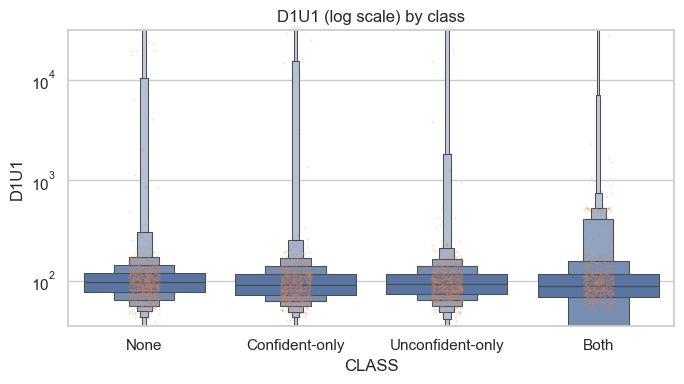

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))


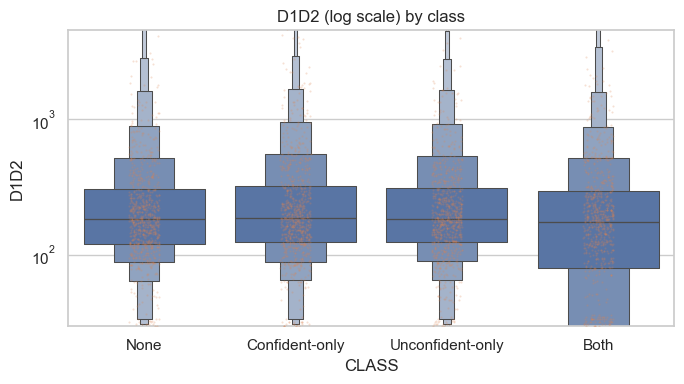

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))


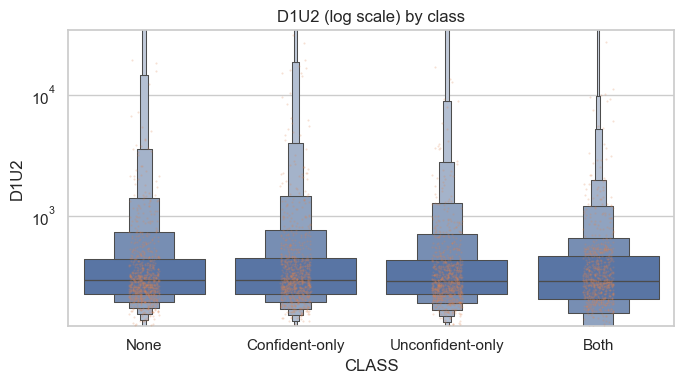

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))


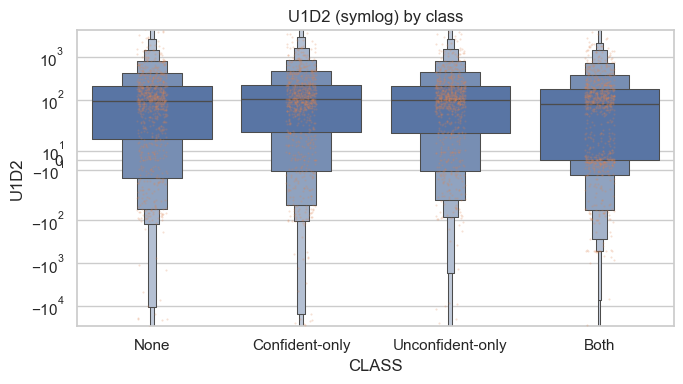

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))


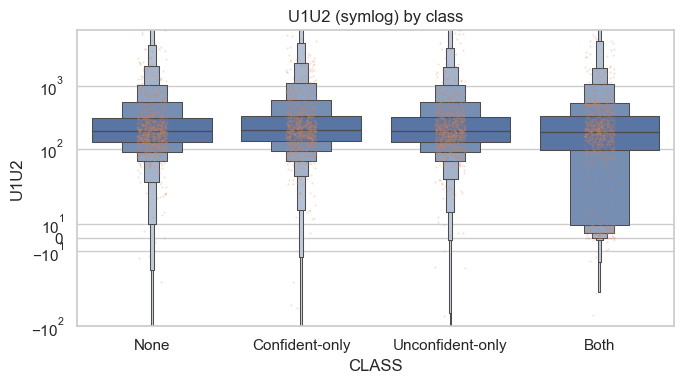

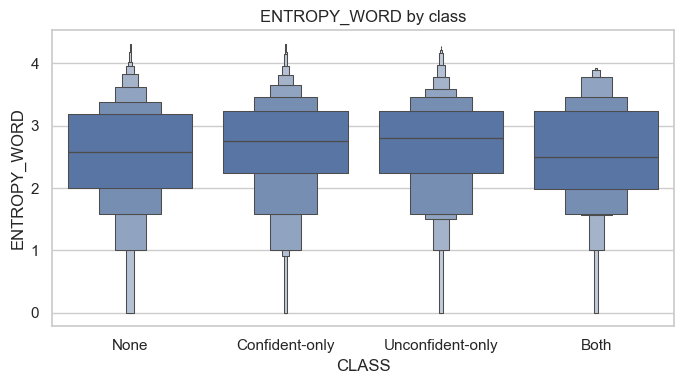

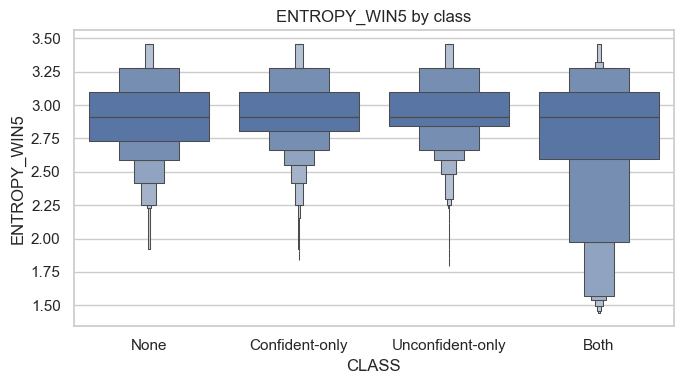

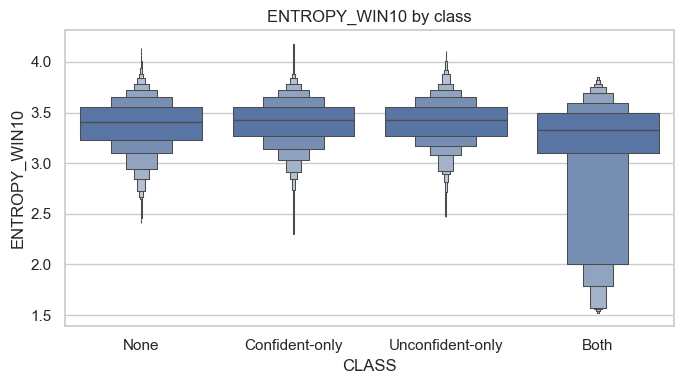

C:\Users\dekassla\AppData\Local\Temp\ipykernel_21948\3420556260.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("CLASS")[feats_pos + feats_signed + entropy_feats]


D1U1                                D1D2         \
                 <lambda_0> median <lambda_1>  count <lambda_0> median   
CLASS                                                                    
None                   76.0   96.0      120.0  51300      121.0  184.0   
Confident-only         72.0   90.0      115.0  72788      125.0  189.0   
Unconfident-only       73.0   92.0      117.0  35643      124.0  185.0   
Both                   68.0   88.0      115.0   1141       81.0  175.0   

                                         D1U2         ... ENTROPY_WORD         \
                 <lambda_1>  count <lambda_0> median  ...   <lambda_1>  count   
CLASS                                                 ...                       
None                  305.0  52723     226.00  291.0  ...     3.192760  41973   
Confident-only        321.0  75789     225.00  294.0  ...     3.240224  63945   
Unconfident-only      311.0  37255     224.00  288.0  ...     3.235064  31870   
Both                  296.0   1238     205.25  289.0  ...     3.238901   1105   

                 ENTROPY_WIN5                             ENTROPY_WIN10  \
                   <lambda_0>    median <lambda_1>  count    <lambda_0>   
CLASS                                                                     
None                 2.732159  2.913977   3.095795  53188      3.232102   
Confident-only       2.807355  2.913977   3.095795  76088      3.272804   
Unconfident-only     2.845351  2.913977   3.095795  37328      3.272804   
Both                 2.594907  2.913977   3.095795   1249      3.096161   

                                              
                    median <lambda_1>  count  
CLASS                                         
None              3.403989   3.553763  53188  
Confident-only    3.422578   3.558519  76088  
Unconfident-only  3.422578   3.558519  37328  
Both              3.327340   3.499228   1249  

[4 rows x 32 columns]

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="notebook", style="whitegrid")
order = ["None","Confident-only","Unconfident-only","Both"]

# --- feature groups ---
feats_pos = [c for c in ["D1U1","D1D2","D1U2"] if c in df.columns]      # positive latencies
feats_signed = [c for c in ["U1D2","U1U2"] if c in df.columns]          # signed latencies
entropy_feats = [c for c in ["ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"] if c in df.columns]

# --- A) positive latencies (log scale) ---
for feat in feats_pos:
    data = df.loc[df[feat].notna() & (df[feat] > 0), ["CLASS", feat]].copy()
    if data.empty:
        continue
    lo, hi = data[feat].quantile([0.01, 0.99])
    plt.figure(figsize=(7,4))
    ax = sns.boxenplot(data=data, x="CLASS", y=feat, order=order, showfliers=False)
    sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
    sns.stripplot(data=sub, x="CLASS", y=feat, order=order, size=1.5, alpha=0.25, ax=ax)
    ax.set(yscale="log")
    ax.set_ylim(max(lo, 5), hi*1.1)
    ax.set_title(f"{feat} (log scale) by class")
    plt.tight_layout()
    plt.show()

# --- B) signed latencies (symlog) ---
for feat in feats_signed:
    data = df.loc[df[feat].notna(), ["CLASS", feat]].copy()
    if data.empty:
        continue
    lo, hi = data[feat].quantile([0.01, 0.99])
    plt.figure(figsize=(7,4))
    ax = sns.boxenplot(data=data, x="CLASS", y=feat, order=order, showfliers=False)
    sub = data.groupby("CLASS", group_keys=False).apply(lambda g: g.sample(min(len(g), 800), random_state=0))
    sns.stripplot(data=sub, x="CLASS", y=feat, order=order, size=1.5, alpha=0.25, ax=ax)
    ax.set_yscale("symlog", linthresh=50)  # linear near 0, log in tails
    ax.set_ylim(lo*1.05 if lo<0 else -100, hi*1.05 if hi>0 else 100)
    ax.set_title(f"{feat} (symlog) by class")
    plt.tight_layout()
    plt.show()

# --- C) entropy (linear scale) ---
for feat in entropy_feats:
    data = df.loc[df[feat].notna(), ["CLASS", feat]]
    if data.empty:
        continue
    plt.figure(figsize=(7,4))
    sns.boxenplot(data=data, x="CLASS", y=feat, order=order, showfliers=False)
    plt.title(f"{feat} by class")
    plt.tight_layout()
    plt.show()

# --- D) summary table ---
summ = (
    df.groupby("CLASS")[feats_pos + feats_signed + entropy_feats]
      .agg([lambda s: np.nanpercentile(s, 25),
            "median",
            lambda s: np.nanpercentile(s, 75),
            "count"])
      .reindex(order)
)
display(summ)


In [6]:
import pandas as pd

def class_label(row):
    if row["CONFIDENT_MARKED_CHAR"] == 1 and row["UNCONFIDENT_MARKED_CHAR"] == 0:
        return "Confident-only"
    elif row["CONFIDENT_MARKED_CHAR"] == 0 and row["UNCONFIDENT_MARKED_CHAR"] == 1:
        return "Unconfident-only"
    elif row["CONFIDENT_MARKED_CHAR"] == 1 and row["UNCONFIDENT_MARKED_CHAR"] == 1:
        return "Both"   # rare
    else:
        return "None"

df["CLASS"] = df.apply(class_label, axis=1)


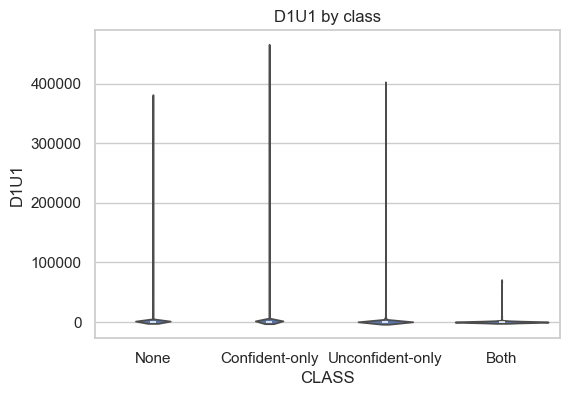

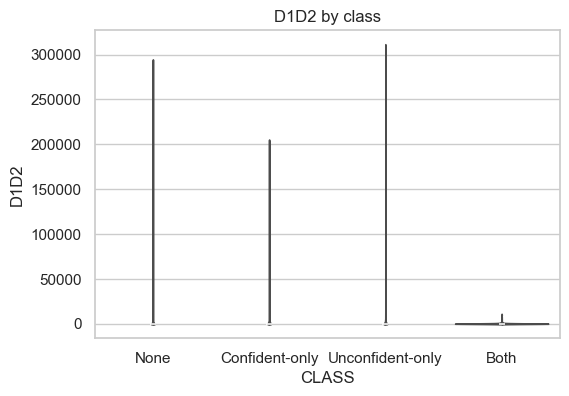

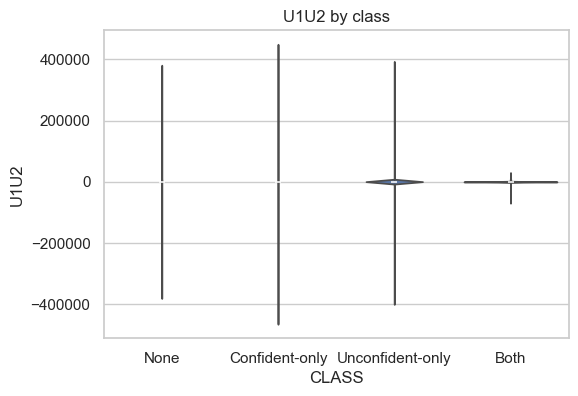

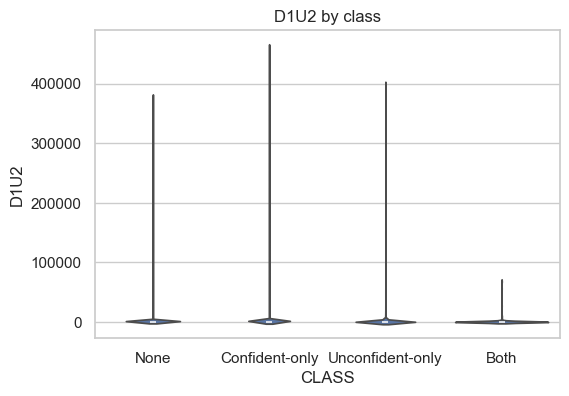

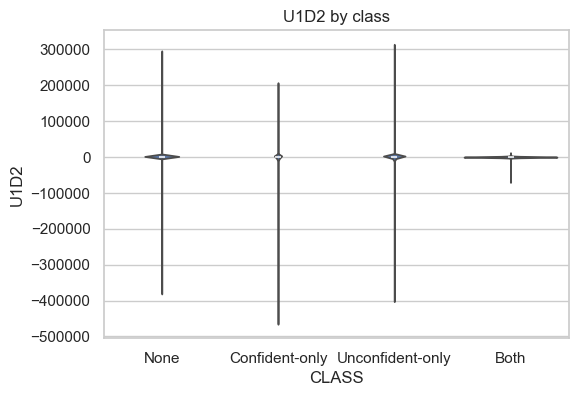

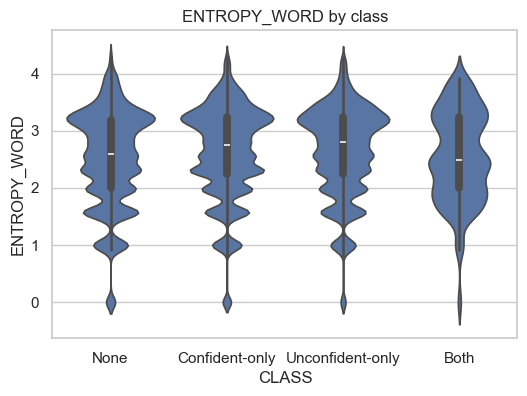

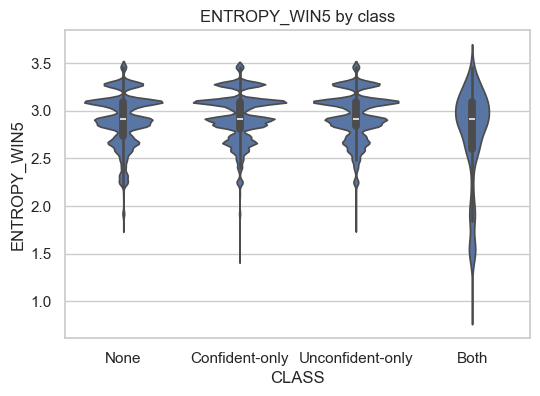

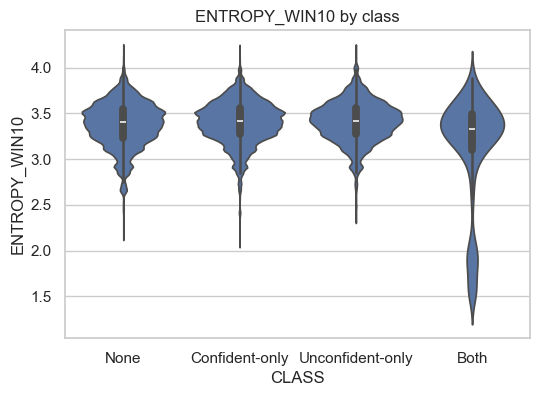

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["D1U1","D1D2","U1U2","D1U2","U1D2","ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"]

for feat in features:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x="CLASS", y=feat, inner="box")
    plt.title(f"{feat} by class")
    plt.show()


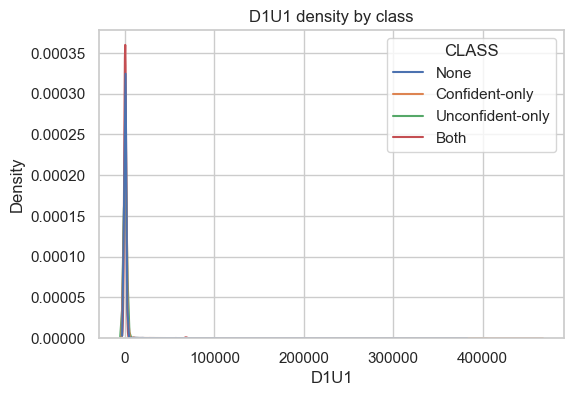

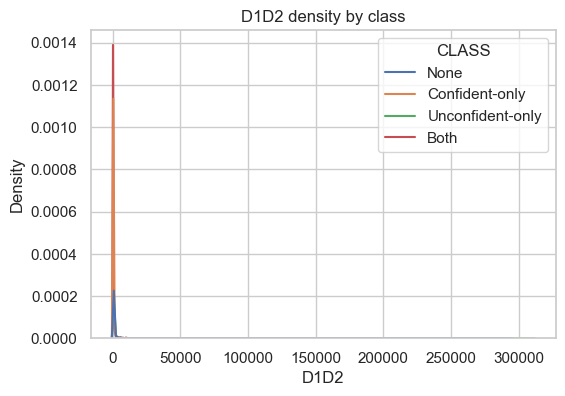

In [8]:
for feat in ["D1U1","D1D2"]:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feat, hue="CLASS", common_norm=False)
    plt.title(f"{feat} density by class")
    plt.show()


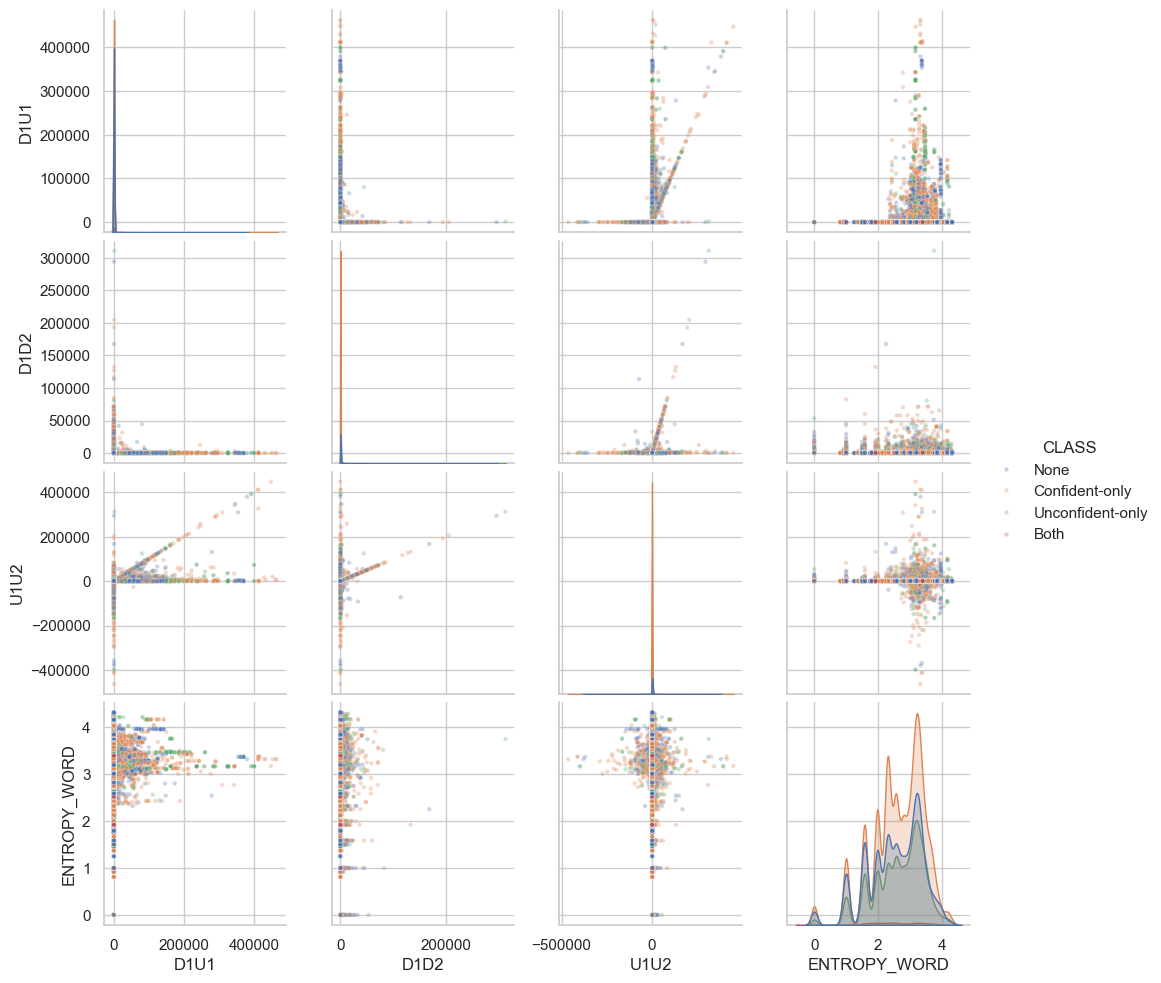

In [9]:
sns.pairplot(
    df,
    vars=["D1U1","D1D2","U1U2","ENTROPY_WORD"],
    hue="CLASS",
    plot_kws=dict(alpha=0.3, s=10)
)
plt.show()


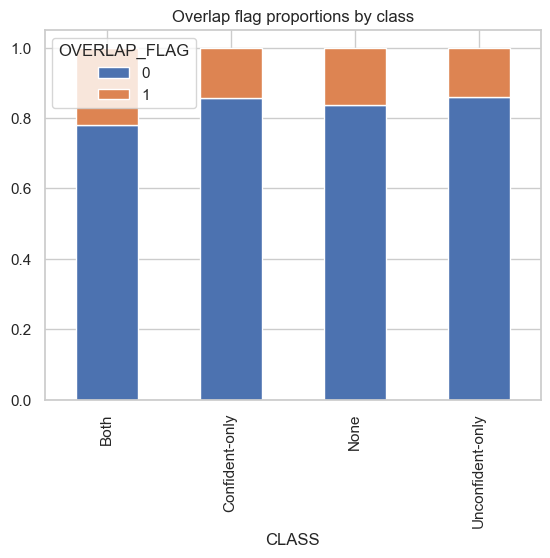

In [10]:
pd.crosstab(df["CLASS"], df["OVERLAP_FLAG"], normalize="index").plot.bar(stacked=True)
plt.title("Overlap flag proportions by class")
plt.show()


### creating test and training folder, use test for further evaluations

In [52]:
import os
import glob
import shutil
import numpy as np
import pandas as pd

def create_train_test_split(
    source_dir="data/with_entropy_features",
    train_dir="data/training",
    test_dir="data/test",
    test_ratio=0.2,
    seed=42,
    exclude=("fd_means_per_file.csv", "fd_means_per_participant.csv")
):
    """Create clean train/test folders from CSV files in source_dir."""
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Clean existing
    for d in [train_dir, test_dir]:
        for f in glob.glob(os.path.join(d, "*")):
            os.remove(f)

    # Gather CSVs, excluding summaries
    all_csvs = sorted(glob.glob(os.path.join(source_dir, "*.csv")))
    eligible = [f for f in all_csvs if os.path.basename(f) not in exclude]

    # Split by file
    rng = np.random.default_rng(seed)
    n_test = max(1, int(round(len(eligible) * test_ratio)))
    test_idx = set(rng.choice(len(eligible), size=n_test, replace=False))
    test_files = [eligible[i] for i in sorted(test_idx)]
    train_files = [f for i, f in enumerate(eligible) if i not in test_idx]

    # Copy files
    for f in train_files:
        shutil.copy2(f, os.path.join(train_dir, os.path.basename(f)))
    for f in test_files:
        shutil.copy2(f, os.path.join(test_dir, os.path.basename(f)))

    # Save manifest
    manifest = pd.DataFrame(
        [{"filename": os.path.basename(f), "subset": "train"} for f in train_files] +
        [{"filename": os.path.basename(f), "subset": "test"} for f in test_files]
    ).sort_values(["subset", "filename"]).reset_index(drop=True)
    manifest.to_csv("data/split_manifest.csv", index=False)

    print("Split complete")
    print(f"Train files: {len(train_files)} saved in {train_dir}")
    print(f"Test files:  {len(test_files)} saved in {test_dir}")
    print("Manifest written to data/split_manifest.csv")

    return manifest


In [53]:
manifest = create_train_test_split()
manifest.head()


Split complete
Train files: 678 saved in data/training
Test files:  170 saved in data/test
Manifest written to data/split_manifest.csv


filename subset
0  experiment_57b345d276b2ea0001c988bc_2025090419...   test
1  experiment_5883a935c0c9a10001df6345_2025090417...   test
2  experiment_5962a9280b835400010a7617_2025081917...   test
3  experiment_5962a9280b835400010a7617_2025081917...   test
4  experiment_5962a9280b835400010a7617_2025081917...   test

### Train models

In [54]:
# ==== TRAIN 6 MODELS with verbose logging + autoscaled graphics (NaN-safe) ====
import os, glob, time, math, textwrap
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from datetime import datetime

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.base import clone  # <— for safe, fresh preprocessor per model

# ----------------- CONFIG -----------------
ALLOWED_FEATURES = [
    # Base latency features
    "D1U1", "D1D2", "U1U2", "D1U2", "U1D2",

    # Word-level aggregates
    "WORD_ID", "WORD_LEN_KEYS", "WORD_DURATION", "WORD_GAP_AFTER",
    "MS_PER_KEY_WORD",

    # Per-file means
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",

    # Per-participant means
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT",
    "U1U2_MEAN_PARTICIPANT", "D1U2_MEAN_PARTICIPANT",

    # Word-based mean latencies
    "D1U1_MEAN_WORD", "D1D2_MEAN_WORD", "U1U2_MEAN_WORD",
    "D1U2_MEAN_WORD", "U1D2_MEAN_WORD",

    # Derived features
    "OVERLAP_FLAG", "OVERLAP_RATIO",
    "SHORT_LAT_FRAC_D1D2_lt100ms", "LONG_LAT_FRAC_D1D2_gt500ms",
    "ENTROPY_D1U1", "ENTROPY_D1D2", "ENTROPY_U1U2", "ENTROPY_D1U2",
    "D1U1_MEAN_FIRST_THIRD", "D1U1_MEAN_LAST_THIRD",
    "D1U1_DRIFT_LAST_MINUS_FIRST",
    "D1D2_MEAN_FIRST_THIRD", "D1D2_MEAN_LAST_THIRD",
    "D1D2_DRIFT_LAST_MINUS_FIRST",
]

TARGETS = {
    "confident": "CONFIDENT_MARKED_CHAR",
    "unconfident": "UNCONFIDENT_MARKED_CHAR",
}

MODELS_DIR  = "models"
REPORTS_DIR = "reports"
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)

# Treat these as categorical even if they look numeric sometimes
FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}

# Progress log
PROGRESS_LOG = os.path.join(REPORTS_DIR, "train_progress.log")
def _log(msg: str):
    ts = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    line = f"[{ts}] {msg}"
    print(line, flush=True)
    with open(PROGRESS_LOG, "a", encoding="utf-8") as f:
        f.write(line + "\n")

# ----------------- HELPERS -----------------
def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Keep only whitelisted features (create missing ones as NaN) and clean infs."""
    for col in ALLOWED_FEATURES:
        if col not in df.columns:
            df[col] = np.nan
    X = df[ALLOWED_FEATURES].copy()
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    return X

def _mostly_numeric(series: pd.Series, thresh: float = 0.9) -> bool:
    s = series.dropna().astype(str)
    if len(s) == 0:
        return True
    def _is_num(x: str) -> bool:
        x = x.strip()
        if x.count(".") <= 1 and x.replace(".", "", 1).replace("-", "", 1).isdigit():
            return True
        return False
    frac = np.mean([_is_num(v) for v in s])
    return frac >= thresh

def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    cats, nums = [], []
    for c in ALLOWED_FEATURES:
        if c in FORCE_CATEGORICAL:
            cats.append(c); continue
        dt = df[c].dtype
        if dt == "object":
            if _mostly_numeric(df[c]):
                df[c] = pd.to_numeric(df[c], errors="coerce")
                nums.append(c)
            else:
                cats.append(c)
        else:
            nums.append(c)
    cats = [c for c in cats if c not in nums]
    return cats, nums

def _preprocessor(cat_cols: List[str], num_cols: List[str]) -> ColumnTransformer:
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

    cat_t = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot",  ohe),
    ])
    num_t = Pipeline([
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("scaler",  StandardScaler()),
    ])
    return ColumnTransformer(
        [("cat", cat_t, cat_cols), ("num", num_t, num_cols)],
        remainder="drop"
    )

def _get_fitted_feature_names(pipe: Pipeline) -> List[str]:
    """
    Robustly extract feature names even if there were no categorical columns
    or the cat block was skipped (so OHE wasn't fitted).
    Also use the *actual* missing-indicator positions from SimpleImputer.
    """
    pre: ColumnTransformer = pipe.named_steps["pre"]
    # The transformers are in the same order we created them: 0="cat", 1="num"
    cat_cols = list(pre.transformers_[0][2])
    num_cols = list(pre.transformers_[1][2])

    # --- categorical names
    cat_names: List[str] = []
    if len(cat_cols) > 0:
        cat_pipe = pre.named_transformers_["cat"]
        ohe = cat_pipe.named_steps.get("onehot")
        # Only attempt if OHE actually got fitted
        if hasattr(ohe, "categories_"):
            try:
                cat_names = ohe.get_feature_names_out(cat_cols).tolist()
            except Exception:
                # Fallback manual construction
                for c_name, cats in zip(cat_cols, getattr(ohe, "categories_", [])):
                    cat_names += [f"{c_name}_{str(k)}" for k in cats]
        # else: leave cat_names as []

    # --- numeric names (+ missing indicators actually used)
    num_names = list(num_cols)
    num_pipe = pre.named_transformers_["num"]
    imp: SimpleImputer = num_pipe.named_steps.get("imputer")
    if isinstance(imp, SimpleImputer) and getattr(imp, "add_indicator", False):
        # If missing-indicator was created, scikit-learn exposes positions via indicator_.features_
        if hasattr(imp, "indicator_") and hasattr(imp.indicator_, "features_"):
            miss_idx = imp.indicator_.features_.tolist()
            miss_names = [f"__MISSIND__{num_cols[i]}" for i in miss_idx if i < len(num_cols)]
            num_names += miss_names
        else:
            # very defensive fallback: append indicators for all numeric cols
            num_names += [f"__MISSIND__{c}" for c in num_cols]

    return cat_names + num_names

# ---- auto-sized barh helpers (to avoid cropped labels) ----
def _autosize_barh(labels, n_bars, max_width=18, min_width=6, min_height=3.0):
    max_label_len = max((len(str(s)) for s in labels), default=10)
    width  = min(max(min_width, 0.12 * max_label_len + 4.0), max_width)
    height = max(min_height, 0.35 * n_bars + 1.0)
    return (width, height)

def _wrap_labels(labels, wrap_at=40, truncate_at=None):
    out = []
    for s in labels:
        s = str(s)
        if truncate_at is not None and len(s) > truncate_at:
            s = s[:truncate_at-1] + "…"
        if wrap_at and len(s) > wrap_at:
            s = textwrap.fill(s, width=wrap_at, break_long_words=False)
        out.append(s)
    return out

def _export_feature_importance(pipe: Pipeline, out_csv: str, out_jpg: str,
                               top_k: int = 25, label_wrap_at: int = 40,
                               label_truncate_at: int = None, dpi: int = 220):
    feat_names = _get_fitted_feature_names(pipe)
    model = pipe.named_steps["model"]

    if hasattr(model, "feature_importances_"):
        imps = np.asarray(model.feature_importances_)
    elif hasattr(model, "coef_"):
        coef = model.coef_
        imps = np.mean(np.abs(coef), axis=0) if np.ndim(coef) > 1 else np.abs(coef)
        imps = np.asarray(imps).ravel()
    else:
        imps = np.ones(len(feat_names)) / max(1, len(feat_names))

    L = min(len(feat_names), len(imps))
    df_imp = pd.DataFrame({"feature": feat_names[:L], "importance": imps[:L]}) \
               .sort_values("importance", ascending=False)

    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    df_imp.to_csv(out_csv, index=False)

    top = df_imp.head(top_k).copy()
    top["label"] = _wrap_labels(top["feature"].tolist(), wrap_at=label_wrap_at, truncate_at=label_truncate_at)

    figsize = _autosize_barh(top["label"].tolist(), len(top))
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=False)
    ax.barh(top["label"][::-1], top["importance"][::-1])
    ax.set_title("Top Feature Importances", pad=10)
    ax.set_xlabel("Importance")

    fig.tight_layout()
    fig.subplots_adjust(left=0.30)
    fig.savefig(out_jpg, dpi=dpi, bbox_inches="tight", pad_inches=0.15)
    plt.close(fig)

def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str, dpi: int = 220):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
    pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]) \
      .to_csv(out_prefix + "_confusion_matrix.csv", index=True)

    fig, ax = plt.subplots(figsize=(6.5, 5.2))
    ax.imshow(cm, aspect="auto")
    ax.set_title("Confusion Matrix", pad=10)
    ax.set_xticks([0, 1]); ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticks([0, 1]); ax.set_yticklabels(["True 0", "True 1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center")
    fig.tight_layout()
    fig.savefig(out_prefix + "_confusion_matrix.jpg", dpi=dpi, bbox_inches="tight", pad_inches=0.15)
    plt.close(fig)

    metrics = {
        "accuracy":  float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall":    float(recall_score(y_true, y_pred, zero_division=0)),
        "f1":        float(f1_score(y_true, y_pred, zero_division=0)),
    }
    try:
        metrics["roc_auc"] = float(roc_auc_score(y_true, y_proba))
    except Exception:
        metrics["roc_auc"] = float("nan")
    pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
    return metrics

def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
    frames = []
    for p in file_paths:
        try:
            df = pd.read_csv(p)
            df = enforce_int_like(df)
        except Exception:
            continue
        X = _ensure_allowed_columns(df.copy())
        if target in df.columns:
            X[target] = df[target]
        frames.append(X)
    if not frames:
        return pd.DataFrame(columns=ALLOWED_FEATURES + [target])
    return pd.concat(frames, ignore_index=True)

# ----------------- MAIN TRAINER -----------------
def train_all_models_explicit(train_dir="data/training", valid_size=0.2, seed=42) -> Dict[str, Dict[str, Dict[str, str]]]:
    algos = {
        "logreg": LogisticRegression(max_iter=500),
        "rf": RandomForestClassifier(n_estimators=300, random_state=seed, n_jobs=-1),
        "gb": GradientBoostingClassifier(random_state=seed),
    }

    overall_t0 = time.perf_counter()
    _log("=== TRAIN START (NaN-safe) ===")
    _log(f"Train dir: {train_dir} | Models dir: {MODELS_DIR} | Reports dir: {REPORTS_DIR}")

    results = {}
    for task, target_col in TARGETS.items():
        _log(f"--- Task '{task}' (target={target_col}) ---")
        task_t0 = time.perf_counter()

        task_report_dir = os.path.join(REPORTS_DIR, task)
        os.makedirs(task_report_dir, exist_ok=True)

        file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
        _log(f"[{task}] Found {len(file_paths)} CSV(s). Loading & filtering columns…")
        df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
        _log(f"[{task}] Loaded rows: {len(df):,}")

        if df.empty:
            raise RuntimeError(f"No training rows found with target {target_col} in {train_dir}.")

        X = _ensure_allowed_columns(df.copy())
        na_counts = X.isna().sum().sort_values(ascending=False)
        top_na = na_counts[na_counts > 0].head(10)
        if not top_na.empty:
            _log(f"[{task}] Top columns with NaN (pre-impute): " + ", ".join([f"{k}:{v}" for k,v in top_na.items()]))

        y = df[target_col].astype(int)

        _log(f"[{task}] Inferring categorical/numeric columns…")
        cat_cols, num_cols = _infer_cat_num(X.copy())
        _log(f"[{task}] cat={len(cat_cols)} | num={len(num_cols)}")

        base_pre = _preprocessor(cat_cols, num_cols)

        _log(f"[{task}] Splitting train/valid (test_size={valid_size})…")
        X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=valid_size, random_state=seed, stratify=y)
        _log(f"[{task}] Train rows={len(X_tr):,} | Valid rows={len(X_va):,}")

        results[task] = {}
        for algo_name, model in algos.items():
            _log(f"[{task}] >>> Fitting {algo_name} …")
            t0 = time.perf_counter()

            # Clone pre so each model gets a fresh, unfitted transformer
            pipe = Pipeline([("pre", clone(base_pre)), ("model", model)])
            pipe.fit(X_tr, y_tr)

            fit_sec = time.perf_counter() - t0
            _log(f"[{task}] {algo_name} fit done in {fit_sec:.2f}s. Predicting on validation…")

            y_pred = pipe.predict(X_va)
            try:
                y_proba = pipe.predict_proba(X_va)[:, 1]
            except Exception:
                try:
                    s = pipe.decision_function(X_va)
                    y_proba = (s - s.min()) / (s.max() - s.min() + 1e-9)
                except Exception:
                    y_proba = np.zeros_like(y_pred, dtype=float)

            acc = accuracy_score(y_va, y_pred)
            prec = precision_score(y_va, y_pred, zero_division=0)
            rec = recall_score(y_va, y_pred, zero_division=0)
            f1 = f1_score(y_va, y_pred, zero_division=0)
            _log(f"[{task}] {algo_name} | ACC={acc:.4f}  PREC={prec:.4f}  REC={rec:.4f}  F1={f1:.4f}")

            model_path = os.path.join(MODELS_DIR, f"{task}_{algo_name}_no_added_info_plain_features.pkl")
            joblib.dump({
                "pipeline": pipe,
                "algo": algo_name,
                "task": task,
                "target_col": target_col
            }, model_path)
            _log(f"[{task}] {algo_name} saved → {model_path}")

            _export_feature_importance(
                pipe,
                out_csv=os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
                out_jpg=os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
            )
            md = _export_confusion_and_metrics(
                y_va, y_pred, y_proba,
                out_prefix=os.path.join(task_report_dir, f"{algo_name}")
            )
            _log(f"[{task}] {algo_name} artifacts saved in: {task_report_dir}")

            results[task][algo_name] = {
                "model_path": model_path,
                "metrics": md,
                "feature_importance_csv": os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
                "feature_importance_jpg": os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
                "confusion_matrix_csv": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.csv"),
                "confusion_matrix_jpg": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.jpg"),
                "metrics_csv": os.path.join(task_report_dir, f"{algo_name}_metrics.csv"),
            }

        task_sec = time.perf_counter() - task_t0
        _log(f"[{task}] --- Task finished in {task_sec:.2f}s ---")

    overall_sec = time.perf_counter() - overall_t0
    _log(f"=== TRAIN END (total {overall_sec:.2f}s) ===")
    return results


In [55]:
out = train_all_models_explicit(train_dir="data/training", valid_size=0.2, seed=42)

[2025-09-28 13:34:46] === TRAIN START (NaN-safe) ===
[2025-09-28 13:34:46] Train dir: data/training | Models dir: models | Reports dir: reports
[2025-09-28 13:34:46] --- Task 'confident' (target=CONFIDENT_MARKED_CHAR) ---
[2025-09-28 13:34:46] [confident] Found 678 CSV(s). Loading & filtering columns…
[2025-09-28 13:35:32] [confident] Loaded rows: 132,527
[2025-09-28 13:35:32] [confident] Top columns with NaN (pre-impute): D1D2_MEAN_LAST_THIRD:132527, D1U1_DRIFT_LAST_MINUS_FIRST:132527, D1D2_MEAN_FIRST_THIRD:132527, D1U1_MEAN_FIRST_THIRD:132527, D1U1_MEAN_LAST_THIRD:132527, OVERLAP_RATIO:132527, LONG_LAT_FRAC_D1D2_gt500ms:132527, SHORT_LAT_FRAC_D1D2_lt100ms:132527, D1D2_DRIFT_LAST_MINUS_FIRST:132527, WORD_GAP_AFTER:30224
[2025-09-28 13:35:32] [confident] Inferring categorical/numeric columns…
[2025-09-28 13:35:32] [confident] cat=0 | num=37
[2025-09-28 13:35:32] [confident] Splitting train/valid (test_size=0.2)…
[2025-09-28 13:35:32] [confident] Train rows=106,021 | Valid rows=26,506
[

C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:35:38] [confident] logreg fit done in 5.57s. Predicting on validation…


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:35:38] [confident] logreg | ACC=0.6006  PREC=0.5966  REC=0.4065  F1=0.4836
[2025-09-28 13:35:38] [confident] logreg saved → models\confident_logreg_no_added_info_plain_features.pkl
[2025-09-28 13:35:44] [confident] logreg artifacts saved in: reports\confident
[2025-09-28 13:35:44] [confident] >>> Fitting rf …


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:36:15] [confident] rf fit done in 31.12s. Predicting on validation…


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:36:20] [confident] rf | ACC=0.9418  PREC=0.9406  REC=0.9324  F1=0.9365
[2025-09-28 13:36:24] [confident] rf saved → models\confident_rf_no_added_info_plain_features.pkl
[2025-09-28 13:36:27] [confident] rf artifacts saved in: reports\confident
[2025-09-28 13:36:27] [confident] >>> Fitting gb …


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:37:44] [confident] gb fit done in 76.30s. Predicting on validation…


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:37:44] [confident] gb | ACC=0.7263  PREC=0.7197  REC=0.6633  F1=0.6903
[2025-09-28 13:37:44] [confident] gb saved → models\confident_gb_no_added_info_plain_features.pkl
[2025-09-28 13:37:45] [confident] gb artifacts saved in: reports\confident
[2025-09-28 13:37:45] [confident] --- Task finished in 178.86s ---
[2025-09-28 13:37:45] --- Task 'unconfident' (target=UNCONFIDENT_MARKED_CHAR) ---
[2025-09-28 13:37:45] [unconfident] Found 678 CSV(s). Loading & filtering columns…
[2025-09-28 13:38:20] [unconfident] Loaded rows: 132,527
[2025-09-28 13:38:20] [unconfident] Top columns with NaN (pre-impute): D1D2_MEAN_LAST_THIRD:132527, D1U1_DRIFT_LAST_MINUS_FIRST:132527, D1D2_MEAN_FIRST_THIRD:132527, D1U1_MEAN_FIRST_THIRD:132527, D1U1_MEAN_LAST_THIRD:132527, OVERLAP_RATIO:132527, LONG_LAT_FRAC_D1D2_gt500ms:132527, SHORT_LAT_FRAC_D1D2_lt100ms:132527, D1D2_DRIFT_LAST_MINUS_FIRST:132527, WORD_GAP_AFTER:30224
[2025-09-28 13:38:20] [unconfident] Inferring categorical/numeric columns…
[2

C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:38:22] [unconfident] logreg fit done in 2.21s. Predicting on validation…
[2025-09-28 13:38:23] [unconfident] logreg | ACC=0.7747  PREC=0.4555  REC=0.0293  F1=0.0551
[2025-09-28 13:38:23] [unconfident] logreg saved → models\unconfident_logreg_no_added_info_plain_features.pkl


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:38:23] [unconfident] logreg artifacts saved in: reports\unconfident
[2025-09-28 13:38:23] [unconfident] >>> Fitting rf …


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:38:54] [unconfident] rf fit done in 30.52s. Predicting on validation…


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:38:58] [unconfident] rf | ACC=0.9594  PREC=0.9509  REC=0.8634  F1=0.9050
[2025-09-28 13:39:00] [unconfident] rf saved → models\unconfident_rf_no_added_info_plain_features.pkl
[2025-09-28 13:39:11] [unconfident] rf artifacts saved in: reports\unconfident
[2025-09-28 13:39:11] [unconfident] >>> Fitting gb …


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:40:23] [unconfident] gb fit done in 72.10s. Predicting on validation…
[2025-09-28 13:40:23] [unconfident] gb | ACC=0.8077  PREC=0.9527  REC=0.1494  F1=0.2582
[2025-09-28 13:40:23] [unconfident] gb saved → models\unconfident_gb_no_added_info_plain_features.pkl


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[2025-09-28 13:40:23] [unconfident] gb artifacts saved in: reports\unconfident
[2025-09-28 13:40:23] [unconfident] --- Task finished in 158.85s ---
[2025-09-28 13:40:23] === TRAIN END (total 337.72s) ===


In [56]:
# # --- DROP-IN FIXES for training all 6 models ---
#
# import os, glob, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
# from typing import List, Tuple, Dict
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import pandas as pd
# import math, textwrap
#
#
# ALLOWED_FEATURES = [
#     "PROMPT", "KEYSTROKE_ID", "PRESS_TIME", "RELEASE_TIME", "LETTER", "KEYCODE",
#     "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
#     "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
#     "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
#     "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
# ]
#
# TARGETS = {
#     "confident": "CONFIDENT_MARKED_CHAR",
#     "unconfident": "UNCONFIDENT_MARKED_CHAR",
# }
#
# MODELS_DIR  = "models"
# REPORTS_DIR = "reports"
# os.makedirs(MODELS_DIR, exist_ok=True)
# os.makedirs(REPORTS_DIR, exist_ok=True)
#
# # Force these to be treated as categorical even if they look numeric sometimes
# FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}
#
# def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
#     for col in ALLOWED_FEATURES:
#         if col not in df.columns:
#             df[col] = np.nan
#     return df[ALLOWED_FEATURES]
#
# def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
#     cats, nums = [], []
#     for c in ALLOWED_FEATURES:
#         if c in FORCE_CATEGORICAL:
#             cats.append(c)
#             continue
#         if df[c].dtype == "object":
#             cats.append(c)
#         else:
#             s = df[c].dropna().astype(str)
#             if len(s) == 0:
#                 # empty column — treat as numeric so median imputer can handle (will warn if all-NaN; harmless)
#                 nums.append(c)
#             else:
#                 conv = s.apply(lambda x: x.replace('.', '', 1).replace('-', '', 1).isdigit()).mean()
#                 if conv > 0.9:
#                     df[c] = pd.to_numeric(df[c], errors="coerce")
#                     nums.append(c)
#                 else:
#                     cats.append(c)
#     # de-dup
#     cats = [c for c in cats if c not in nums]
#     return cats, nums
#
# def _preprocessor(cat_cols: List[str], num_cols: List[str]) -> ColumnTransformer:
#     # sklearn >= 1.2 uses sparse_output; older uses sparse
#     try:
#         ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
#     except TypeError:
#         ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
#
#     cat_t = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("onehot", ohe),
#     ])
#     num_t = Pipeline([
#         ("imputer", SimpleImputer(strategy="median")),
#         ("scaler", StandardScaler()),
#     ])
#     return ColumnTransformer(
#         [("cat", cat_t, cat_cols), ("num", num_t, num_cols)],
#         remainder="drop"
#     )
#
# def _get_fitted_feature_names(pipe: Pipeline) -> List[str]:
#     """
#     Extract transformed feature names from an already-fitted pipeline.
#     This avoids length mismatches with model coefficients/importances.
#     """
#     pre: ColumnTransformer = pipe.named_steps["pre"]
#     # Transformer indices: 0 = "cat", 1 = "num" as built above
#     cat_cols = pre.transformers_[0][2]
#     num_cols = pre.transformers_[1][2]
#     ohe = pre.named_transformers_["cat"].named_steps["onehot"]
#     # Try native API, else build from categories_
#     try:
#         cat_names = ohe.get_feature_names_out(cat_cols).tolist()
#     except Exception:
#         cat_names = []
#         for c_name, cats in zip(cat_cols, ohe.categories_):
#             cat_names += [f"{c_name}_{str(k)}" for k in cats]
#     return list(cat_names) + list(num_cols)
#
#
# # --- helper: compute a nice figure size from label lengths & bar count
# def _autosize_barh(labels, n_bars, max_width=18, min_width=6, min_height=3.0):
#     max_label_len = max((len(s) for s in labels), default=10)
#     # width grows with label length (characters -> inches ~0.12), capped
#     width  = min(max(min_width, 0.12 * max_label_len + 4.0), max_width)
#     # height grows with number of bars (~0.35 inch each), with a minimum
#     height = max(min_height, 0.35 * n_bars + 1.0)
#     return (width, height)
#
# # --- helper: format long labels (wrap or truncate)
# def _wrap_labels(labels, wrap_at=40, truncate_at=None):
#     out = []
#     for s in labels:
#         s = str(s)
#         if truncate_at is not None and len(s) > truncate_at:
#             s = s[:truncate_at-1] + "…"
#         if wrap_at and len(s) > wrap_at:
#             s = textwrap.fill(s, width=wrap_at, break_long_words=False)
#         out.append(s)
#     return out
#
# # --- drop-in replacement for your feature-importance saver
# def _export_feature_importance(pipe, out_csv: str, out_jpg: str,
#                                top_k: int = 25, label_wrap_at: int = 40,
#                                label_truncate_at: int = None, dpi: int = 220):
#     # 1) Build importance table (unchanged logic)
#     feat_names = _get_fitted_feature_names(pipe)
#     model = pipe.named_steps["model"]
#
#     if hasattr(model, "feature_importances_"):
#         imps = np.asarray(model.feature_importances_)
#     elif hasattr(model, "coef_"):
#         coef = model.coef_
#         imps = np.mean(np.abs(coef), axis=0) if np.ndim(coef) > 1 else np.abs(coef)
#         imps = np.asarray(imps).ravel()
#     else:
#         imps = np.ones(len(feat_names)) / max(1, len(feat_names))
#
#     L = min(len(feat_names), len(imps))
#     df_imp = pd.DataFrame({"feature": feat_names[:L], "importance": imps[:L]}) \
#                .sort_values("importance", ascending=False)
#
#     # 2) Save CSV
#     os.makedirs(os.path.dirname(out_csv), exist_ok=True)
#     df_imp.to_csv(out_csv, index=False)
#
#     # 3) Plot top-k with auto layout
#     top = df_imp.head(top_k).copy()
#     # format labels to avoid overrun
#     top["label"] = _wrap_labels(
#         top["feature"].tolist(),
#         wrap_at=label_wrap_at,
#         truncate_at=label_truncate_at
#     )
#
#     # figure size based on labels + number of bars
#     figsize = _autosize_barh(top["label"].tolist(), len(top))
#     fig, ax = plt.subplots(figsize=figsize, constrained_layout=False)
#     ax.barh(top["label"][::-1], top["importance"][::-1])
#     ax.set_title("Top Feature Importances", pad=10)
#     ax.set_xlabel("Importance")
#
#     # make sure labels are fully visible
#     fig.tight_layout()
#     fig.subplots_adjust(left=0.28)  # add left margin for wrapped labels
#     # If your labels are still long, bump this up to e.g. 0.33
#
#     # save with tight bbox so nothing is clipped
#     fig.savefig(out_jpg, dpi=dpi, bbox_inches="tight", pad_inches=0.15)
#     plt.close(fig)
#
# # --- drop-in replacement for your confusion-matrix saver
# def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str, dpi: int = 220):
#     cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
#     os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
#     pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]) \
#       .to_csv(out_prefix + "_confusion_matrix.csv", index=True)
#
#     # Larger default figure + tight bbox
#     fig, ax = plt.subplots(figsize=(6.5, 5.2))
#     im = ax.imshow(cm, aspect="auto")
#     ax.set_title("Confusion Matrix", pad=10)
#     ax.set_xticks([0, 1]); ax.set_xticklabels(["Pred 0", "Pred 1"], rotation=0)
#     ax.set_yticks([0, 1]); ax.set_yticklabels(["True 0", "True 1"])
#     # annotate cells
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, cm[i, j], ha="center", va="center")
#     fig.tight_layout()
#     fig.savefig(out_prefix + "_confusion_matrix.jpg", dpi=dpi, bbox_inches="tight", pad_inches=0.15)
#     plt.close(fig)
#
#     metrics = {
#         "accuracy":  accuracy_score(y_true, y_pred),
#         "precision": precision_score(y_true, y_pred, zero_division=0),
#         "recall":    recall_score(y_true, y_pred, zero_division=0),
#         "f1":        f1_score(y_true, y_pred, zero_division=0),
#     }
#     try:
#         metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
#     except Exception:
#         metrics["roc_auc"] = np.nan
#     pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
#     return metrics
#
#
# def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
#     frames = []
#     for p in file_paths:
#         try:
#             df = pd.read_csv(p)
#         except Exception:
#             continue
#         X = _ensure_allowed_columns(df.copy())
#         if target in df.columns:
#             X[target] = df[target]
#         frames.append(X)
#     if not frames:
#         return pd.DataFrame(columns=ALLOWED_FEATURES + [target])
#     return pd.concat(frames, ignore_index=True)
#
# def train_all_models_explicit(train_dir="data/training", valid_size=0.2, seed=42) -> Dict[str, Dict[str, Dict[str, str]]]:
#     algos = {
#         "logreg": LogisticRegression(max_iter=500),
#         "rf": RandomForestClassifier(n_estimators=300, random_state=seed, n_jobs=-1),
#         "gb": GradientBoostingClassifier(random_state=seed),
#     }
#
#     results = {}
#     for task, target_col in TARGETS.items():
#         task_report_dir = os.path.join(REPORTS_DIR, task)
#         os.makedirs(task_report_dir, exist_ok=True)
#
#         file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
#         df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
#         if df.empty:
#             raise RuntimeError(f"No training rows found with target {target_col} in {train_dir}.")
#
#         X = _ensure_allowed_columns(df.copy())
#         y = df[target_col].astype(int)
#
#         cat_cols, num_cols = _infer_cat_num(X.copy())
#         pre = _preprocessor(cat_cols, num_cols)
#
#         X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=valid_size, random_state=seed, stratify=y)
#
#         results[task] = {}
#         for algo_name, model in algos.items():
#             pipe = Pipeline([("pre", pre), ("model", model)])
#             pipe.fit(X_tr, y_tr)
#
#             y_pred = pipe.predict(X_va)
#             try:
#                 y_proba = pipe.predict_proba(X_va)[:, 1]
#             except Exception:
#                 try:
#                     s = pipe.decision_function(X_va)
#                     y_proba = (s - s.min()) / (s.max() - s.min() + 1e-9)
#                 except Exception:
#                     y_proba = np.zeros_like(y_pred, dtype=float)
#
#             model_path = os.path.join(MODELS_DIR, f"{task}_{algo_name}no_added_info.pkl")
#             joblib.dump({
#                 "pipeline": pipe,
#                 "algo": algo_name,
#                 "task": task,
#                 "target_col": target_col
#             }, model_path)
#
#             _export_feature_importance(
#                 pipe,
#                 out_csv=os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
#                 out_jpg=os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
#             )
#             _export_confusion_and_metrics(
#                 y_va, y_pred, y_proba,
#                 out_prefix=os.path.join(task_report_dir, f"{algo_name}")
#             )
#
#             results[task][algo_name] = {
#                 "model_path": model_path,
#                 "feature_importance_csv": os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
#                 "feature_importance_jpg": os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
#                 "confusion_matrix_csv": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.csv"),
#                 "confusion_matrix_jpg": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.jpg"),
#                 "metrics_csv": os.path.join(task_report_dir, f"{algo_name}_metrics.csv"),
#             }
#     print(" Trained and saved 6 models with stable feature-name export.")
#     return results


In [57]:
# results = train_all_models_explicit(train_dir="data/training")
# results

### train same models but with less features

In [58]:
# # ==== TRAIN 6 MODELS with verbose logging + autoscaled graphics (standalone) ====
# import os, glob, time, math, textwrap
# import joblib
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from typing import List, Tuple, Dict
# from datetime import datetime
#
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (
#     confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# )
#
# # ----------------- CONFIG -----------------
# ALLOWED_FEATURES = [
#     "LETTER", "KEYCODE",
#     "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
#     "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
#     "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
#     "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
# ]
#
# TARGETS = {
#     "confident": "CONFIDENT_MARKED_CHAR",
#     "unconfident": "UNCONFIDENT_MARKED_CHAR",
# }
#
# MODELS_DIR  = "models"
# REPORTS_DIR = "reports"
# os.makedirs(MODELS_DIR, exist_ok=True)
# os.makedirs(REPORTS_DIR, exist_ok=True)
#
# # Force these to be treated as categorical even if they look numeric sometimes
# FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}
#
# # Progress log
# PROGRESS_LOG = os.path.join(REPORTS_DIR, "train_progress.log")
# def _log(msg: str):
#     ts = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     line = f"[{ts}] {msg}"
#     print(line, flush=True)
#     with open(PROGRESS_LOG, "a", encoding="utf-8") as f:
#         f.write(line + "\n")
#
# # ----------------- HELPERS -----------------
# def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
#     for col in ALLOWED_FEATURES:
#         if col not in df.columns:
#             df[col] = np.nan
#     return df[ALLOWED_FEATURES]
#
# def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
#     cats, nums = [], []
#     for c in ALLOWED_FEATURES:
#         if c in FORCE_CATEGORICAL:
#             cats.append(c); continue
#         if df[c].dtype == "object":
#             cats.append(c)
#         else:
#             s = df[c].dropna().astype(str)
#             if len(s) == 0:
#                 nums.append(c)
#             else:
#                 conv = s.apply(lambda x: x.replace('.', '', 1).replace('-', '', 1).isdigit()).mean()
#                 if conv > 0.9:
#                     df[c] = pd.to_numeric(df[c], errors="coerce")
#                     nums.append(c)
#                 else:
#                     cats.append(c)
#     cats = [c for c in cats if c not in nums]
#     return cats, nums
#
# def _preprocessor(cat_cols: List[str], num_cols: List[str]) -> ColumnTransformer:
#     try:
#         ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
#     except TypeError:
#         ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
#
#     cat_t = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("onehot", ohe),
#     ])
#     num_t = Pipeline([
#         ("imputer", SimpleImputer(strategy="median")),
#         ("scaler", StandardScaler()),
#     ])
#     return ColumnTransformer(
#         [("cat", cat_t, cat_cols), ("num", num_t, num_cols)],
#         remainder="drop"
#     )
#
# def _get_fitted_feature_names(pipe: Pipeline) -> List[str]:
#     pre: ColumnTransformer = pipe.named_steps["pre"]
#     cat_cols = pre.transformers_[0][2]
#     num_cols = pre.transformers_[1][2]
#     ohe = pre.named_transformers_["cat"].named_steps["onehot"]
#     try:
#         cat_names = ohe.get_feature_names_out(cat_cols).tolist()
#     except Exception:
#         cat_names = []
#         for c_name, cats in zip(cat_cols, ohe.categories_):
#             cat_names += [f"{c_name}_{str(k)}" for k in cats]
#     return list(cat_names) + list(num_cols)
#
# # ---- auto-sized barh helpers (to avoid cropped labels) ----
# def _autosize_barh(labels, n_bars, max_width=18, min_width=6, min_height=3.0):
#     max_label_len = max((len(str(s)) for s in labels), default=10)
#     width  = min(max(min_width, 0.12 * max_label_len + 4.0), max_width)
#     height = max(min_height, 0.35 * n_bars + 1.0)
#     return (width, height)
#
# def _wrap_labels(labels, wrap_at=40, truncate_at=None):
#     out = []
#     for s in labels:
#         s = str(s)
#         if truncate_at is not None and len(s) > truncate_at:
#             s = s[:truncate_at-1] + "…"
#         if wrap_at and len(s) > wrap_at:
#             s = textwrap.fill(s, width=wrap_at, break_long_words=False)
#         out.append(s)
#     return out
#
# def _export_feature_importance(pipe: Pipeline, out_csv: str, out_jpg: str,
#                                top_k: int = 25, label_wrap_at: int = 40,
#                                label_truncate_at: int = None, dpi: int = 220):
#     feat_names = _get_fitted_feature_names(pipe)
#     model = pipe.named_steps["model"]
#
#     if hasattr(model, "feature_importances_"):
#         imps = np.asarray(model.feature_importances_)
#     elif hasattr(model, "coef_"):
#         coef = model.coef_
#         imps = np.mean(np.abs(coef), axis=0) if np.ndim(coef) > 1 else np.abs(coef)
#         imps = np.asarray(imps).ravel()
#     else:
#         imps = np.ones(len(feat_names)) / max(1, len(feat_names))
#
#     L = min(len(feat_names), len(imps))
#     df_imp = pd.DataFrame({"feature": feat_names[:L], "importance": imps[:L]}) \
#                .sort_values("importance", ascending=False)
#
#     os.makedirs(os.path.dirname(out_csv), exist_ok=True)
#     df_imp.to_csv(out_csv, index=False)
#
#     top = df_imp.head(top_k).copy()
#     top["label"] = _wrap_labels(top["feature"].tolist(), wrap_at=label_wrap_at, truncate_at=label_truncate_at)
#
#     figsize = _autosize_barh(top["label"].tolist(), len(top))
#     fig, ax = plt.subplots(figsize=figsize, constrained_layout=False)
#     ax.barh(top["label"][::-1], top["importance"][::-1])
#     ax.set_title("Top Feature Importances", pad=10)
#     ax.set_xlabel("Importance")
#
#     fig.tight_layout()
#     fig.subplots_adjust(left=0.30)
#     fig.savefig(out_jpg, dpi=dpi, bbox_inches="tight", pad_inches=0.15)
#     plt.close(fig)
#
# def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str, dpi: int = 220):
#     cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
#     os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
#     pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]) \
#       .to_csv(out_prefix + "_confusion_matrix.csv", index=True)
#
#     fig, ax = plt.subplots(figsize=(6.5, 5.2))
#     ax.imshow(cm, aspect="auto")
#     ax.set_title("Confusion Matrix", pad=10)
#     ax.set_xticks([0, 1]); ax.set_xticklabels(["Pred 0", "Pred 1"])
#     ax.set_yticks([0, 1]); ax.set_yticklabels(["True 0", "True 1"])
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, cm[i, j], ha="center", va="center")
#     fig.tight_layout()
#     fig.savefig(out_prefix + "_confusion_matrix.jpg", dpi=dpi, bbox_inches="tight", pad_inches=0.15)
#     plt.close(fig)
#
#     metrics = {
#         "accuracy":  float(accuracy_score(y_true, y_pred)),
#         "precision": float(precision_score(y_true, y_pred, zero_division=0)),
#         "recall":    float(recall_score(y_true, y_pred, zero_division=0)),
#         "f1":        float(f1_score(y_true, y_pred, zero_division=0)),
#     }
#     try:
#         metrics["roc_auc"] = float(roc_auc_score(y_true, y_proba))
#     except Exception:
#         metrics["roc_auc"] = float("nan")
#     pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
#     return metrics
#
# def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
#     frames = []
#     for p in file_paths:
#         try:
#             df = pd.read_csv(p)
#         except Exception:
#             continue
#         X = _ensure_allowed_columns(df.copy())
#         if target in df.columns:
#             X[target] = df[target]
#         frames.append(X)
#     if not frames:
#         return pd.DataFrame(columns=ALLOWED_FEATURES + [target])
#     return pd.concat(frames, ignore_index=True)
#
# # ----------------- MAIN TRAINER -----------------
# def train_all_models_explicit(train_dir="data/training", valid_size=0.2, seed=42) -> Dict[str, Dict[str, Dict[str, str]]]:
#     algos = {
#         "logreg": LogisticRegression(max_iter=500),
#         "rf": RandomForestClassifier(n_estimators=300, random_state=seed, n_jobs=-1),
#         "gb": GradientBoostingClassifier(random_state=seed),
#     }
#
#     overall_t0 = time.perf_counter()
#     _log("=== TRAIN START ===")
#     _log(f"Train dir: {train_dir} | Models dir: {MODELS_DIR} | Reports dir: {REPORTS_DIR}")
#
#     results = {}
#     for task, target_col in TARGETS.items():
#         _log(f"--- Task '{task}' (target={target_col}) ---")
#         task_t0 = time.perf_counter()
#
#         task_report_dir = os.path.join(REPORTS_DIR, task)
#         os.makedirs(task_report_dir, exist_ok=True)
#
#         file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
#         _log(f"[{task}] Found {len(file_paths)} CSV(s). Loading & filtering columns…")
#         df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
#         _log(f"[{task}] Loaded rows: {len(df):,}")
#
#         if df.empty:
#             raise RuntimeError(f"No training rows found with target {target_col} in {train_dir}.")
#
#         X = _ensure_allowed_columns(df.copy())
#         y = df[target_col].astype(int)
#
#         _log(f"[{task}] Inferring categorical/numeric columns…")
#         cat_cols, num_cols = _infer_cat_num(X.copy())
#         _log(f"[{task}] cat={len(cat_cols)} | num={len(num_cols)}")
#
#         pre = _preprocessor(cat_cols, num_cols)
#
#         _log(f"[{task}] Splitting train/valid (test_size={valid_size})…")
#         X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=valid_size, random_state=seed, stratify=y)
#         _log(f"[{task}] Train rows={len(X_tr):,} | Valid rows={len(X_va):,}")
#
#         results[task] = {}
#         for algo_name, model in algos.items():
#             _log(f"[{task}] >>> Fitting {algo_name} …")
#             t0 = time.perf_counter()
#
#             pipe = Pipeline([("pre", pre), ("model", model)])
#             pipe.fit(X_tr, y_tr)
#
#             fit_sec = time.perf_counter() - t0
#             _log(f"[{task}] {algo_name} fit done in {fit_sec:.2f}s. Predicting on validation…")
#
#             y_pred = pipe.predict(X_va)
#             try:
#                 y_proba = pipe.predict_proba(X_va)[:, 1]
#             except Exception:
#                 try:
#                     s = pipe.decision_function(X_va)
#                     y_proba = (s - s.min()) / (s.max() - s.min() + 1e-9)
#                 except Exception:
#                     y_proba = np.zeros_like(y_pred, dtype=float)
#
#             # Print accuracy (and more) to console immediately
#             acc = accuracy_score(y_va, y_pred)
#             prec = precision_score(y_va, y_pred, zero_division=0)
#             rec = recall_score(y_va, y_pred, zero_division=0)
#             f1 = f1_score(y_va, y_pred, zero_division=0)
#             _log(f"[{task}] {algo_name} | ACC={acc:.4f}  PREC={prec:.4f}  REC={rec:.4f}  F1={f1:.4f}")
#
#             model_path = os.path.join(MODELS_DIR, f"{task}_{algo_name}_no_added_info_plain_features.pkl")
#             joblib.dump({
#                 "pipeline": pipe,
#                 "algo": algo_name,
#                 "task": task,
#                 "target_col": target_col
#             }, model_path)
#             _log(f"[{task}] {algo_name} saved → {model_path}")
#
#             _export_feature_importance(
#                 pipe,
#                 out_csv=os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
#                 out_jpg=os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
#             )
#             md = _export_confusion_and_metrics(
#                 y_va, y_pred, y_proba,
#                 out_prefix=os.path.join(task_report_dir, f"{algo_name}")
#             )
#             _log(f"[{task}] {algo_name} artifacts saved in: {task_report_dir}")
#
#             results[task][algo_name] = {
#                 "model_path": model_path,
#                 "metrics": md,
#                 "feature_importance_csv": os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv"),
#                 "feature_importance_jpg": os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg"),
#                 "confusion_matrix_csv": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.csv"),
#                 "confusion_matrix_jpg": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.jpg"),
#                 "metrics_csv": os.path.join(task_report_dir, f"{algo_name}_metrics.csv"),
#             }
#
#         task_sec = time.perf_counter() - task_t0
#         _log(f"[{task}] --- Task finished in {task_sec:.2f}s ---")
#
#     overall_sec = time.perf_counter() - overall_t0
#     _log(f"=== TRAIN END (total {overall_sec:.2f}s) ===")
#     return results


In [59]:
# results = train_all_models_explicit(train_dir="data/training")
# results

### predict

In [60]:
import os, glob, joblib, numpy as np, pandas as pd
from typing import List, Dict, Any
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# >>> Must match the training list exactly <<<
TRAIN_ALLOWED_FEATURES: List[str] = [
    # Base latency features
    "D1U1", "D1D2", "U1U2", "D1U2", "U1D2",

    # Word-level aggregates
    "WORD_ID", "WORD_LEN_KEYS", "WORD_DURATION", "WORD_GAP_AFTER",
    "MS_PER_KEY_WORD",

    # Per-file means
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",

    # Per-participant means
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT",
    "U1U2_MEAN_PARTICIPANT", "D1U2_MEAN_PARTICIPANT",

    # Word-based mean latencies
    "D1U1_MEAN_WORD", "D1D2_MEAN_WORD", "U1U2_MEAN_WORD",
    "D1U2_MEAN_WORD", "U1D2_MEAN_WORD",

    # Derived features
    "OVERLAP_FLAG", "OVERLAP_RATIO",
    "SHORT_LAT_FRAC_D1D2_lt100ms", "LONG_LAT_FRAC_D1D2_gt500ms",
    "ENTROPY_D1U1", "ENTROPY_D1D2", "ENTROPY_U1U2", "ENTROPY_D1U2",
    "D1U1_MEAN_FIRST_THIRD", "D1U1_MEAN_LAST_THIRD",
    "D1U1_DRIFT_LAST_MINUS_FIRST",
    "D1D2_MEAN_FIRST_THIRD", "D1D2_MEAN_LAST_THIRD",
    "D1D2_DRIFT_LAST_MINUS_FIRST",
]

def _prepare_features_for_pipe(df: pd.DataFrame, pipe) -> pd.DataFrame:
    """
    Create the exact feature frame expected by the pipeline's preprocessor:
      - Add missing training columns as NaN
      - Keep only expected columns
      - Same order as during training
      - Replace +/-inf with NaN
    """
    pre = pipe.named_steps.get("pre")
    # Prefer the input column list the preprocessor was fitted on
    expected_cols = getattr(pre, "feature_names_in_", None)
    if expected_cols is None:
        # Fallback: use the training whitelist you provided
        expected_cols = TRAIN_ALLOWED_FEATURES

    X = df.copy()
    # Add any missing expected columns
    for c in expected_cols:
        if c not in X.columns:
            X[c] = np.nan

    # Keep and order exactly as expected
    X = X[list(expected_cols)].copy()
    # Clean infs
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    return X

def predict_with_saved_model(model_path: str, file_path: str) -> Dict[str, Any]:
    """
    Load a saved model bundle, predict on one CSV, save per-row predictions, and return a summary.
    - Uses the same features you trained with (adds missing columns as NaN).
    - If the bundle contains 'best_threshold', it will be used to derive the binary class from probabilities.
    - Saves to:
        data/prediction_result_confident/
        data/prediction_result_unconfident/
    """
    os.makedirs("data/prediction_result_confident", exist_ok=True)
    os.makedirs("data/prediction_result_unconfident", exist_ok=True)

    # Load model bundle
    bundle = joblib.load(model_path)
    pipe       = bundle["pipeline"]
    task       = bundle["task"]        # "confident" or "unconfident"
    target_col = bundle["target_col"]  # e.g. "CONFIDENT_MARKED_CHAR"
    best_thr   = float(bundle.get("best_threshold", 0.5))

    # Load input file
    df_raw = pd.read_csv(file_path, low_memory=False)
    df_raw = enforce_int_like(df_raw)

    # Prepare features exactly as training saw them
    X = _prepare_features_for_pipe(df_raw, pipe)

    # Predict probabilities if available
    try:
        y_proba = pipe.predict_proba(X)[:, 1]
    except Exception:
        # Fall back to decision_function or to the class output
        try:
            s = pipe.decision_function(X)
            # min-max to [0,1] so thresholding still works
            y_proba = (s - np.min(s)) / (np.ptp(s) + 1e-9)
        except Exception:
            # as a last resort, use predicted labels as 0/1 floats
            y_pred = pipe.predict(X)
            y_proba = y_pred.astype(float)

    # Binary predictions from tuned threshold (or 0.5 if not present)
    y_pred_thr = (y_proba >= best_thr).astype(int)

    # Also keep the default 0.5 prediction for reporting if you want
    # y_pred_05 = (y_proba >= 0.5).astype(int)

    # Save augmented file
    out = df_raw.copy()
    out[f"PRED_{target_col}"] = y_pred_thr
    out[f"PRED_PROBA_{target_col}"] = y_proba  # helpful for inspection

    out_dir = "data/prediction_result_confident" if task == "confident" else "data/prediction_result_unconfident"
    base = os.path.splitext(os.path.basename(file_path))[0]
    out_name = f"{base}__pred_{task}.csv"
    out_path = os.path.join(out_dir, out_name)
    out.to_csv(out_path, index=False)

    # Letters predicted as 1 (if LETTER column exists)
    letters_pred_1 = []
    if "LETTER" in out.columns:
        letters_pred_1 = (
            out.loc[out[f"PRED_{target_col}"] == 1, "LETTER"]
               .fillna("")
               .astype(str)
               .unique()
               .tolist()
        )

    # Optional metrics if ground truth is present
    metrics = {}
    if target_col in df_raw.columns:
        y_true = df_raw[target_col].astype(int)
        metrics["accuracy"]  = float(accuracy_score(y_true, y_pred_thr))
        metrics["precision"] = float(precision_score(y_true, y_pred_thr, zero_division=0))
        metrics["recall"]    = float(recall_score(y_true, y_pred_thr, zero_division=0))
        metrics["f1"]        = float(f1_score(y_true, y_pred_thr, zero_division=0))
        try:
            metrics["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            metrics["roc_auc"] = None

    return {
        "saved_prediction_csv": out_path,
        "letters_predicted_as_1": letters_pred_1,
        "threshold_used": best_thr,
        "metrics_if_labels_present": metrics
    }


In [61]:
# CONFIDENT model (Logistic Regression)
out_conf_logreg = predict_with_saved_model(
    "models/confident_logreg_no_added_info_plain_features.pkl",
    "data/test/experiment_5accb373436f5500010037ee_20250826220942__word_features.csv"
)
print("Confident (thr*):", out_conf_logreg["metrics_if_labels_present"].get("accuracy"))

# UNCONFIDENT model (Random Forest or Logistic Regression – adjust the filename you want)
out_unconf_logreg = predict_with_saved_model(
    "models/unconfident_logreg_no_added_info_plain_features.pkl",
    "data/test/experiment_5accb373436f5500010037ee_20250826220942__word_features.csv"
)
print("Unconfident (thr*):", out_unconf_logreg["metrics_if_labels_present"].get("accuracy"))


Confident (thr*): 0.8120300751879699
Unconfident (thr*): 0.9699248120300752


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['OVERLAP_RATIO' 'SHORT_LAT_FRAC_D1D2_lt100ms'
 'LONG_LAT_FRAC_D1D2_gt500ms' 'D1U1_MEAN_FIRST_THIRD'
 'D1U1_MEAN_LAST_THIRD' 'D1U1_DRIFT_LAST_MINUS_FIRST'
 'D1D2_MEAN_FIRST_THIRD' 'D1D2_MEAN_LAST_THIRD'
 'D1D2_DRIFT_LAST_MINUS_FIRST']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [62]:
import os, joblib, pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def predict_with_saved_model(model_path: str, file_path: str):
    """
    Load a saved model (any of the 6 pickles), predict on one CSV file,
    save row-by-row predictions, and return summary info.

    - Saves predictions into:
        data/prediction_result_confident/   or
        data/prediction_result_unconfident/
      depending on the model.
    - Adds a new column PRED_<TARGET> in the output CSV.
    - Returns dict with path, list of LETTERs predicted as 1, and metrics if labels are present.
    """
    os.makedirs("data/prediction_result_confident", exist_ok=True)
    os.makedirs("data/prediction_result_unconfident", exist_ok=True)

    # Load model bundle
    bundle = joblib.load(model_path)
    pipe       = bundle["pipeline"]
    task       = bundle["task"]        # "confident" or "unconfident"
    target_col = bundle["target_col"]  # e.g., "CONFIDENT_MARKED_CHAR"

    # Read file and prepare features
    df = pd.read_csv(file_path)
    df = enforce_int_like(df)
    X = df[[c for c in df.columns if c in bundle.get("feature_names", df.columns)]]
    # Ensure the pipeline handles missing allowed columns itself
    preds = pipe.predict(df[pipe.named_steps["pre"].feature_names_in_])

    # Save results with prediction column
    out = df.copy()
    out[f"PRED_{target_col}"] = preds

    out_dir = "data/prediction_result_confident" if task == "confident" else "data/prediction_result_unconfident"
    out_name = os.path.splitext(os.path.basename(file_path))[0] + f"__pred_{task}.csv"
    out_path = os.path.join(out_dir, out_name)
    out.to_csv(out_path, index=False)

    # Collect LETTERs predicted as 1
    letters_pred_1 = out.loc[out[f"PRED_{target_col}"] == 1, "LETTER"].fillna("").astype(str).unique().tolist()

    # Metrics (if ground truth exists in file)
    metrics = {}
    if target_col in df.columns:
        y_true = df[target_col].astype(int)
        metrics["accuracy"]  = float(accuracy_score(y_true, preds))
        metrics["precision"] = float(precision_score(y_true, preds, zero_division=0))
        metrics["recall"]    = float(recall_score(y_true, preds, zero_division=0))
        metrics["f1"]        = float(f1_score(y_true, preds, zero_division=0))
        try:
            y_proba = pipe.predict_proba(df[pipe.named_steps["pre"].feature_names_in_])[:, 1]
            metrics["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            metrics["roc_auc"] = None

    return {
        "saved_prediction_csv": out_path,
        "letters_predicted_as_1": letters_pred_1,
        "metrics_if_labels_present": metrics
    }


In [63]:
# CONFIDENT Logistic Regression model
out_conf_logreg = predict_with_saved_model(
    "models/confident_logreg_no_added_info_plain_features.pkl",
    "data/test/experiment_5bf368846edd7200017136c7_20250819173015.csv"
)
print("Confident model accuracy:", out_conf_logreg["metrics_if_labels_present"].get("accuracy"))


# UNCONFIDENT Random Forest model
out_unconf_rf = predict_with_saved_model(
    "models/unconfident_logreg_no_added_info_plain_features.pkl",
    "data/test/experiment_5bf368846edd7200017136c7_20250819173015.csv"
)
print("Unconfident model accuracy:", out_unconf_rf["metrics_if_labels_present"].get("accuracy"))



FileNotFoundError: [Errno 2] No such file or directory: 'data/test/experiment_5bf368846edd7200017136c7_20250819173015.csv'

### new strategy, classifier with additional information

In [7]:
# =========================
# Robust training w/ context features
# Tries GPU (XGB/LGBM/CatBoost) and falls back to CPU if GPU fails
# Saves artifacts and provides inference with optional smoothing
# =========================

import os, glob, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Optional
from dataclasses import dataclass

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Optional GPU libs (silently skipped if not installed)
try:
    import xgboost as xgb; HAS_XGB = True
except Exception:
    HAS_XGB = False

try:
    import lightgbm as lgb; HAS_LGBM = True
except Exception:
    HAS_LGBM = False

try:
    from catboost import CatBoostClassifier; HAS_CAT = True
except Exception:
    HAS_CAT = False

# ---- Config ----
ALLOWED_FEATURES = [
    "PROMPT", "KEYSTROKE_ID", "PRESS_TIME", "RELEASE_TIME", "LETTER", "KEYCODE",
    "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
    "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
]

TARGETS = {
    "confident": "CONFIDENT_MARKED_CHAR",
    "unconfident": "UNCONFIDENT_MARKED_CHAR",
}

MODELS_DIR  = "models"
REPORTS_DIR = "reports"
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)

# Treat these as categorical regardless of dtype
FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}

# ---- Small utils ----
def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in ALLOWED_FEATURES:
        if col not in df.columns:
            df[col] = np.nan
    return df[ALLOWED_FEATURES]

def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    cats, nums = [], []
    for c in ALLOWED_FEATURES:
        if c in FORCE_CATEGORICAL:
            cats.append(c); continue
        if df[c].dtype == "object":
            cats.append(c)
        else:
            s = df[c].dropna().astype(str)
            if len(s) == 0:
                nums.append(c)
            else:
                conv = s.apply(lambda x: x.replace('.', '', 1).replace('-', '', 1).isdigit()).mean()
                if conv > 0.9:
                    df[c] = pd.to_numeric(df[c], errors="coerce")
                    nums.append(c)
                else:
                    cats.append(c)
    cats = [c for c in cats if c not in nums]
    return cats, nums

def _preprocessor(cat_cols: List[str], num_cols: List[str]) -> ColumnTransformer:
    # sklearn >=1.2 uses sparse_output
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    cat_t = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe),
    ])
    num_t = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    return ColumnTransformer([("cat", cat_t, cat_cols), ("num", num_t, num_cols)], remainder="drop")

def _get_fitted_feature_names(pipe: Pipeline) -> List[str]:
    pre: ColumnTransformer = pipe.named_steps["pre"]
    cat_cols = pre.transformers_[0][2]
    num_cols = pre.transformers_[1][2]
    ohe = pre.named_transformers_["cat"].named_steps["onehot"]
    try:
        cat_names = ohe.get_feature_names_out(cat_cols).tolist()
    except Exception:
        cat_names = []
        for c_name, cats in zip(cat_cols, ohe.categories_):
            cat_names += [f"{c_name}_{str(k)}" for k in cats]
    return list(cat_names) + list(num_cols)

def _export_feature_importance(pipe: Pipeline, out_csv: str, out_jpg: str):
    feat_names = _get_fitted_feature_names(pipe)
    model = pipe.named_steps["model"]
    imps = None

    # scikit trees / linear
    if hasattr(model, "feature_importances_"):
        imps = np.asarray(model.feature_importances_)
    elif hasattr(model, "coef_"):
        coef = model.coef_
        imps = np.mean(np.abs(coef), axis=0) if np.ndim(coef) > 1 else np.abs(coef)
        imps = np.asarray(imps).ravel()

    # XGBoost
    if imps is None and HAS_XGB and isinstance(model, xgb.XGBClassifier):
        try:
            booster = model.get_booster()
            fmap = booster.get_score(importance_type='gain')
            imps = np.zeros(len(feat_names))
            for k, v in fmap.items():
                if k.startswith('f') and k[1:].isdigit():
                    idx = int(k[1:])
                    if idx < len(imps):
                        imps[idx] = v
        except Exception:
            imps = None

    # LightGBM
    if imps is None and HAS_LGBM and isinstance(model, lgb.LGBMClassifier):
        try:
            imps = np.asarray(model.booster_.feature_importance(importance_type='gain'))
        except Exception:
            imps = None

    # CatBoost
    if imps is None and HAS_CAT and isinstance(model, CatBoostClassifier):
        try:
            imps = np.asarray(model.get_feature_importance(type='FeatureImportance'))
        except Exception:
            imps = None

    if imps is None:
        imps = np.ones(len(feat_names)) / max(1, len(feat_names))

    L = min(len(feat_names), len(imps))
    feat_names = feat_names[:L]; imps = imps[:L]

    imp_df = pd.DataFrame({"feature": feat_names, "importance": imps}).sort_values("importance", ascending=False)
    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    imp_df.to_csv(out_csv, index=False)

    top = imp_df.head(25)
    plt.figure()
    plt.barh(top["feature"][::-1], top["importance"][::-1])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.savefig(out_jpg, dpi=200)
    plt.close()

def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
    pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]).to_csv(out_prefix + "_confusion_matrix.csv", index=True)
    plt.figure(); plt.imshow(cm, aspect="auto"); plt.title("Confusion Matrix")
    plt.xticks([0,1], ["Pred 0", "Pred 1"]); plt.yticks([0,1], ["True 0", "True 1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout(); plt.savefig(out_prefix + "_confusion_matrix.jpg", dpi=200); plt.close()

    metrics = {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
    except Exception:
        metrics["roc_auc"] = np.nan
    pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
    return metrics

# ---- (C) Context features ----
@dataclass
class ContextConfig:
    roll_k: int = 7
    n_lags: int = 1
    n_leads: int = 1

class ContextFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, config: Optional[ContextConfig]=None):
        self.config = config or ContextConfig()
        self.time_like = ["PRESS_TIME", "RELEASE_TIME", "D1U1", "D1D2", "U1U2", "D1U2",
                          "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
                          "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
                          "D1U2_MEAN_PARTICIPANT", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"]
        self.flag_from_letter = True

    def fit(self, X, y=None): return self

    def _featurize_group(self, df: pd.DataFrame) -> pd.DataFrame:
        out = df.copy()
        for col in self.time_like:
            if col in out.columns:
                for i in range(1, self.config.n_lags+1):
                    out[f"{col}_lag{i}"] = out[col].shift(i)
                for i in range(1, self.config.n_leads+1):
                    out[f"{col}_lead{i}"] = out[col].shift(-i)
        k = self.config.roll_k if self.config.roll_k % 2 == 1 else self.config.roll_k+1
        for col in self.time_like:
            if col in out.columns:
                out[f"{col}_roll_mean"] = out[col].rolling(window=k, center=True, min_periods=1).mean()
                out[f"{col}_roll_std"]  = out[col].rolling(window=k, center=True, min_periods=1).std()
        out["seq_index"] = np.arange(len(out))
        if "WORD" in out.columns:
            grp = (out["WORD"] != out["WORD"].shift()).cumsum()
            out["word_pos"] = out.groupby(grp).cumcount()
            out["word_len"] = out.groupby(grp)["WORD"].transform("size")
            out["word_pos_rev"] = out["word_len"] - out["word_pos"] - 1
        else:
            out["word_pos"] = 0; out["word_len"] = 0; out["word_pos_rev"] = 0
        if self.flag_from_letter and "LETTER" in out.columns:
            s = out["LETTER"].astype(str).str.lower()
            out["flag_backspace"] = (s == "backspace").astype(int)
            out["flag_shift"]     = (s == "shift").astype(int)
            out["flag_space"]     = (s == " ").astype(int)
            out["flag_alpha"]     = s.str.fullmatch(r"[a-z]", case=False).fillna(False).astype(int)
            out["flag_digit"]     = s.str.fullmatch(r"\d").fillna(False).astype(int)
        else:
            out["flag_backspace"] = out["flag_shift"] = out["flag_space"] = out["flag_alpha"] = out["flag_digit"] = 0
        return out

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        if "___FILE_PATH" in X.columns:
            chunks = []
            for _, sub in X.groupby("___FILE_PATH", sort=False, as_index=False):
                chunks.append(self._featurize_group(sub))
            out = pd.concat(chunks, axis=0, ignore_index=True)
            return out.drop(columns=["___FILE_PATH"], errors="ignore")
        return self._featurize_group(X)

# ---- Data loading (keep file id) ----
def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
    frames = []
    for p in file_paths:
        try:
            df = pd.read_csv(p)
            df = enforce_int_like(df)
        except Exception:
            continue
        X = _ensure_allowed_columns(df.copy())
        X["___FILE_PATH"] = p
        if target in df.columns:
            X[target] = df[target]
        frames.append(X)
    if not frames:
        return pd.DataFrame(columns=ALLOWED_FEATURES + ["___FILE_PATH", target])
    return pd.concat(frames, ignore_index=True)

# ---- Metrics dict ----
def _metrics_dict(y_true, y_pred, y_proba=None):
    m = {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = roc_auc_score(y_true, y_proba)
        except Exception:
            m["roc_auc"] = float("nan")
    else:
        m["roc_auc"] = float("nan")
    return m

# ---- TRAINING (robust w/ GPU fallback) ----
def train_with_context(train_dir="data/training", valid_size=0.2, seed=42,
                       context_cfg: Optional[ContextConfig]=None):
    # CPU baselines
    algos: Dict[str, object] = {
        "logreg": LogisticRegression(max_iter=500),
        "rf": RandomForestClassifier(n_estimators=300, random_state=seed, n_jobs=-1),
        "gb": GradientBoostingClassifier(random_state=seed),
    }
    # GPU-intended models (we'll fall back to CPU on failure)
    if HAS_XGB:
        algos["xgb_gpu"] = xgb.XGBClassifier(
            tree_method="gpu_hist", predictor="gpu_predictor",
            n_estimators=600, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.0, reg_lambda=1.0,
            random_state=seed, n_jobs=-1
        )
    if HAS_LGBM:
        algos["lgbm_gpu"] = lgb.LGBMClassifier(
            device="gpu", boosting_type="gbdt",
            n_estimators=1200, learning_rate=0.05, num_leaves=63,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.0, reg_lambda=1.0,
            random_state=seed, n_jobs=-1
        )
    if HAS_CAT:
        algos["cat_gpu"] = CatBoostClassifier(
            task_type="GPU", devices="0",
            iterations=1200, learning_rate=0.05, depth=6,
            l2_leaf_reg=3.0, loss_function="Logloss", verbose=False, random_seed=seed
        )

    results = {}
    leaderboard_rows = []

    for task, target_col in TARGETS.items():
        task_report_dir = os.path.join(REPORTS_DIR, task)
        os.makedirs(task_report_dir, exist_ok=True)

        file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
        df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
        if df.empty:
            raise RuntimeError(f"No training rows found with target {target_col} in {train_dir}.")

        X = df.drop(columns=[target_col], errors="ignore")
        y = df[target_col].astype(int)

        ctx = ContextFeaturizer(context_cfg or ContextConfig(roll_k=7, n_lags=1, n_leads=1))
        X_ctx = ctx.fit_transform(X)

        X_tr, X_va, y_tr, y_va = train_test_split(X_ctx, y, test_size=valid_size, random_state=seed, stratify=y)

        cat_cols, num_cols = _infer_cat_num(X_tr.copy())
        pre = _preprocessor(cat_cols, num_cols)

        results[task] = {}

        for algo_name, model in list(algos.items()):
            # Try fit; if GPU fails, fall back to CPU config for that family.
            def _fallback_model(name: str):
                # map *_gpu to CPU versions
                if name.startswith("xgb") and HAS_XGB:
                    return xgb.XGBClassifier(
                        tree_method="hist", predictor="auto",
                        n_estimators=600, learning_rate=0.05, max_depth=6,
                        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.0, reg_lambda=1.0,
                        random_state=seed, n_jobs=-1
                    )
                if name.startswith("lgbm") and HAS_LGBM:
                    return lgb.LGBMClassifier(
                        device="cpu", boosting_type="gbdt",
                        n_estimators=1200, learning_rate=0.05, num_leaves=63,
                        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.0, reg_lambda=1.0,
                        random_state=seed, n_jobs=-1
                    )
                if name.startswith("cat") and HAS_CAT:
                    return CatBoostClassifier(
                        task_type="CPU",
                        iterations=1200, learning_rate=0.05, depth=6,
                        l2_leaf_reg=3.0, loss_function="Logloss",
                        verbose=False, random_seed=seed
                    )
                return None

            pipe = Pipeline([("pre", pre), ("model", model)])
            try:
                pipe.fit(X_tr, y_tr)
                used_name = algo_name
            except Exception as e:
                fb = _fallback_model(algo_name)
                if fb is None:
                    print(f"[{task.upper()}] {algo_name} SKIPPED due to error: {e}")
                    continue
                print(f"[{task.upper()}] {algo_name} failed ({e}). Falling back to CPU...")
                pipe = Pipeline([("pre", pre), ("model", fb)])
                try:
                    pipe.fit(X_tr, y_tr)
                    used_name = algo_name.replace("_gpu", "_cpu")
                except Exception as e2:
                    print(f"[{task.upper()}] {algo_name} CPU fallback failed: {e2}. Skipping.")
                    continue

            # Predict/Proba
            y_pred = pipe.predict(X_va)
            y_proba = None
            try:
                y_proba = pipe.predict_proba(X_va)[:, 1]
            except Exception:
                try:
                    s = pipe.decision_function(X_va)
                    y_proba = (s - s.min()) / (s.max() - s.min() + 1e-9)
                except Exception:
                    pass

            # Save bundle (with featurizer)
            model_path = os.path.join(MODELS_DIR, f"{task}_{used_name}.pkl")
            joblib.dump({
                "featurizer": ctx,
                "pipeline": pipe,
                "algo": used_name,
                "task": task,
                "target_col": target_col
            }, model_path)

            # Artifacts
            _export_feature_importance(
                pipe,
                out_csv=os.path.join(task_report_dir, f"{used_name}_feature_importance.csv"),
                out_jpg=os.path.join(task_report_dir, f"{used_name}_feature_importance.jpg"),
            )
            md = _export_confusion_and_metrics(
                y_va, y_pred, (y_proba if y_proba is not None else np.zeros_like(y_pred, dtype=float)),
                out_prefix=os.path.join(task_report_dir, f"{used_name}")
            )

            print(f"[{task.upper()}] {used_name}: ACC={md['accuracy']:.4f}  "
                  f"PREC={md['precision']:.4f}  REC={md['recall']:.4f}  "
                  f"F1={md['f1']:.4f}  AUC={md.get('roc_auc', float('nan')):.4f}")

            results[task][used_name] = {"model_path": model_path, "metrics": md}

    leaderboard_rows = []
    for task, models in results.items():
        for algo_name, info in models.items():
            row = {"task": task, "algo": algo_name, **info["metrics"], "model_path": info["model_path"]}
            leaderboard_rows.append(row)
    leaderboard = pd.DataFrame(leaderboard_rows).sort_values(
        ["task", "f1", "roc_auc", "accuracy"], ascending=[True, False, False, False]
    ).reset_index(drop=True)

    print("\n=== Leaderboard (validation) ===")
    display(leaderboard)
    return {"results": results, "leaderboard": leaderboard}

# ---- (B) Smoothing for inference ----
from scipy.signal import medfilt

def smooth_predictions_median(preds: np.ndarray, kernel_size=7) -> np.ndarray:
    if kernel_size % 2 == 0:
        kernel_size += 1
    return medfilt(preds.astype(int), kernel_size=kernel_size).astype(int)

def viterbi_hmm_binary(proba1: np.ndarray, p01=0.02, p10=0.02, pi1=0.05) -> np.ndarray:
    eps = 1e-12
    proba1 = np.clip(proba1, eps, 1-eps)
    proba0 = 1 - proba1
    T = len(proba1); log = np.log
    a00, a01 = log(1-p01+eps), log(p01+eps)
    a10, a11 = log(p10+eps), log(1-p10+eps)
    dp0 = np.zeros(T); dp1 = np.zeros(T); bp0 = np.zeros(T, dtype=int); bp1 = np.zeros(T, dtype=int)
    dp0[0] = log(1-pi1+eps) + log(proba0[0]); dp1[0] = log(pi1+eps) + log(proba1[0])
    for t in range(1, T):
        s0, s1 = dp0[t-1] + a00, dp1[t-1] + a10
        if s0 >= s1: dp0[t], bp0[t] = s0 + log(proba0[t]), 0
        else:        dp0[t], bp0[t] = s1 + log(proba0[t]), 1
        s0, s1 = dp0[t-1] + a01, dp1[t-1] + a11
        if s0 >= s1: dp1[t], bp1[t] = s0 + log(proba1[t]), 0
        else:        dp1[t], bp1[t] = s1 + log(proba1[t]), 1
    y = np.zeros(T, dtype=int); y[T-1] = 1 if dp1[T-1] > dp0[T-1] else 0
    for t in range(T-2, -1, -1):
        y[t] = bp1[t+1] if y[t+1] == 1 else bp0[t+1]
    return y

print("Ready. Train with: train_out = train_with_context(train_dir='data/training'); train_out['leaderboard'].head()")
print("   Predict with smoothing: predict_with_saved_model('models/confident_rf.pkl','data/test/your.csv', smoothing='hmm')")


Ready. Train with: train_out = train_with_context(train_dir='data/training'); train_out['leaderboard'].head()
   Predict with smoothing: predict_with_saved_model('models/confident_rf.pkl','data/test/your.csv', smoothing='hmm')


In [4]:

# ---- Inference (raw + smoothed) ----
def predict_with_saved_model(model_path: str, file_path: str,
                             smoothing: str = "hmm", median_k: int = 7,
                             hmm_p01: float = 0.02, hmm_p10: float = 0.02, hmm_pi1: float = 0.05):
    """
    smoothing: "none" | "median" | "hmm"
    Saves CSV with both raw and smoothed predictions.
    Returns paths + metrics (if labels present).
    """
    os.makedirs("data/prediction_result_confident", exist_ok=True)
    os.makedirs("data/prediction_result_unconfident", exist_ok=True)

    bundle = joblib.load(model_path)
    ctx: ContextFeaturizer = bundle["featurizer"]
    pipe: Pipeline         = bundle["pipeline"]
    task                   = bundle["task"]
    target_col             = bundle["target_col"]

    df = pd.read_csv(file_path)
    df = enforce_int_like(df)
    X = _ensure_allowed_columns(df.copy())
    X["___FILE_PATH"] = file_path
    X_ctx = ctx.transform(X)

    preds_raw = pipe.predict(X_ctx)
    # probabilities (if available)
    try:
        proba1 = pipe.predict_proba(X_ctx)[:, 1]
    except Exception:
        try:
            s = pipe.decision_function(X_ctx)
            proba1 = (s - s.min()) / (s.max() - s.min() + 1e-9)
        except Exception:
            proba1 = preds_raw.astype(float)

    if smoothing == "median":
        preds_sm = smooth_predictions_median(preds_raw, kernel_size=median_k)
    elif smoothing == "hmm":
        preds_sm = viterbi_hmm_binary(proba1, p01=hmm_p01, p10=hmm_p10, pi1=hmm_pi1)
    else:
        preds_sm = preds_raw

    out = df.copy()
    out[f"PRED_{target_col}"] = preds_raw
    out[f"PRED_{target_col}_SMOOTHED"] = preds_sm

    out_dir = "data/prediction_result_confident" if task == "confident" else "data/prediction_result_unconfident"
    out_name = os.path.splitext(os.path.basename(file_path))[0] + f"__pred_{task}.csv"
    out_path = os.path.join(out_dir, out_name)
    out.to_csv(out_path, index=False)

    letters_pred_1_raw = out.loc[out[f"PRED_{target_col}"] == 1, "LETTER"].fillna("").astype(str).unique().tolist()
    letters_pred_1_sm  = out.loc[out[f"PRED_{target_col}_SMOOTHED"] == 1, "LETTER"].fillna("").astype(str).unique().tolist()

    metrics_raw = {}; metrics_sm = {}
    if target_col in df.columns:
        y_true = df[target_col].astype(int)
        metrics_raw = _metrics_dict(y_true, preds_raw, proba1)
        metrics_sm  = _metrics_dict(y_true, preds_sm,  proba1)

    return {
        "saved_prediction_csv": out_path,
        "letters_predicted_as_1_raw": letters_pred_1_raw,
        "letters_predicted_as_1_smoothed": letters_pred_1_sm,
        "metrics_raw": metrics_raw,
        "metrics_smoothed": metrics_sm
    }


In [ ]:
# Train (prints metrics per model and shows a leaderboard)
train_out = train_with_context(train_dir="data/training", valid_size=0.2, seed=42)
train_out["leaderboard"].head()

C:\Users\dekassla\AppData\Local\Temp\ipykernel_29560\2576413342.py:172: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


[CONFIDENT] logreg: ACC=0.7555  PREC=0.7424  REC=0.6986  F1=0.7199  AUC=0.8297


In [2]:
import os, joblib, pandas as pd, numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fallback if not defined elsewhere
ALLOWED_FEATURES = globals().get("ALLOWED_FEATURES", [
    "PROMPT", "KEYSTROKE_ID", "PRESS_TIME", "RELEASE_TIME", "LETTER", "KEYCODE",
    "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
    "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
])

def _ensure_allowed_columns_local(df: pd.DataFrame) -> pd.DataFrame:
    for col in ALLOWED_FEATURES:
        if col not in df.columns:
            df[col] = np.nan
    return df[ALLOWED_FEATURES]

def _patch_old_featurizer(featurizer):
    """Make old saved ContextFeaturizer objects compatible (ensure .config)."""
    if featurizer is None:
        return
    if not hasattr(featurizer, "config") or featurizer.config is None:
        class _Cfg: pass
        cfg = _Cfg(); cfg.roll_k = 7; cfg.n_lags = 1; cfg.n_leads = 1
        featurizer.config = cfg
    # also ensure expected attributes exist
    if not hasattr(featurizer, "time_like"):
        featurizer.time_like = ["PRESS_TIME","RELEASE_TIME","D1U1","D1D2","U1U2","D1U2",
                                "D1U1_MEAN_FILE","D1D2_MEAN_FILE","U1U2_MEAN_FILE","D1U2_MEAN_FILE",
                                "D1U1_MEAN_PARTICIPANT","D1D2_MEAN_PARTICIPANT","U1U2_MEAN_PARTICIPANT",
                                "D1U2_MEAN_PARTICIPANT","DURATION_SECONDS","WPM_FILE","WPM_AVG"]
    if not hasattr(featurizer, "flag_from_letter"):
        featurizer.flag_from_letter = True

def predict_with_saved_model(model_path: str, file_path: str):
    """
    Loads a saved model bundle, applies the saved ContextFeaturizer (patched if needed),
    predicts per-row, writes a CSV with predictions, and returns summary + metrics.
    """
    os.makedirs("data/prediction_result_confident", exist_ok=True)
    os.makedirs("data/prediction_result_unconfident", exist_ok=True)

    bundle = joblib.load(model_path)
    pipe       = bundle["pipeline"]              # Pipeline(pre -> model)
    task       = bundle["task"]                  # "confident" | "unconfident"
    target_col = bundle["target_col"]            # target name
    featurizer = bundle.get("featurizer", None)  # ContextFeaturizer or None

    # Patch old featurizer objects so .transform works
    _patch_old_featurizer(featurizer)

    # Load data and build same base feature set
    df = pd.read_csv(file_path)
    df = enforce_int_like(df)
    X_base = _ensure_allowed_columns_local(df.copy())
    X_base["___FILE_PATH"] = file_path

    # Apply context features if available
    if featurizer is not None:
        X_infer = featurizer.transform(X_base)
    else:
        X_infer = X_base.drop(columns=["___FILE_PATH"], errors="ignore")

    # Predict
    preds = pipe.predict(X_infer)
    try:
        proba1 = pipe.predict_proba(X_infer)[:, 1]
    except Exception:
        try:
            s = pipe.decision_function(X_infer)
            proba1 = (s - s.min()) / (s.max() - s.min() + 1e-9)
        except Exception:
            proba1 = preds.astype(float)

    # Save per-row predictions
    out = df.copy()
    out[f"PRED_{target_col}"] = preds
    out_dir  = "data/prediction_result_confident" if task == "confident" else "data/prediction_result_unconfident"
    out_name = os.path.splitext(os.path.basename(file_path))[0] + f"__pred_{task}.csv"
    out_path = os.path.join(out_dir, out_name)
    out.to_csv(out_path, index=False)

    # Letters predicted as 1
    letters_pred_1 = (
        out.loc[out[f"PRED_{target_col}"] == 1, "LETTER"]
        .fillna("").astype(str).unique().tolist()
        if "LETTER" in out.columns else []
    )

    # Optional metrics if file contains ground truth
    metrics = {}
    if target_col in df.columns:
        y_true = df[target_col].astype(int)
        metrics["accuracy"]  = float(accuracy_score(y_true, preds))
        metrics["precision"] = float(precision_score(y_true, preds, zero_division=0))
        metrics["recall"]    = float(recall_score(y_true, preds, zero_division=0))
        metrics["f1"]        = float(f1_score(y_true, preds, zero_division=0))
        try:
            metrics["roc_auc"] = float(roc_auc_score(y_true, proba1))
        except Exception:
            metrics["roc_auc"] = None

    return {
        "saved_prediction_csv": out_path,
        "letters_predicted_as_1": letters_pred_1,
        "metrics_if_labels_present": metrics
    }


In [19]:
out_conf = predict_with_saved_model(
    "models/confident_xgb_cpu.pkl",
    "data/test/experiment_5adae3ebdec767000128c131_20250819162658.csv"
)
out_conf["metrics_if_labels_present"], out_conf["saved_prediction_csv"], out_conf["letters_predicted_as_1"]


({'accuracy': 0.275,
  'precision': 0.28205128205128205,
  'recall': 0.9166666666666666,
  'f1': 0.43137254901960786,
  'roc_auc': 0.09235491071428573},
 'data/prediction_result_confident\\experiment_5adae3ebdec767000128c131_20250819162658__pred_confident.csv',
 ['Shift',
  'T',
  'h',
  'e',
  ' ',
  'b',
  'a',
  'c',
  'w',
  's',
  'o',
  'q',
  'u',
  'i',
  't',
  'j',
  'r',
  'n',
  'd',
  'l',
  'Backspace',
  'v',
  'k',
  '.',
  'S',
  'g',
  'z',
  'm',
  'f',
  'y',
  'p'])

In [ ]:
# Example: CONFIDENT + HMM smoothing
out = predict_with_saved_model(
    "models/confident_rf.pkl",
    "data/test/your_file.csv",
    smoothing="hmm", hmm_p01=0.01, hmm_p10=0.01, hmm_pi1=0.05
)
print(out["metrics_raw"])
print(out["metrics_smoothed"])
print(out["saved_prediction_csv"])


### train more models

In [13]:
# =========================
# Extra models with tamed categorical handling + real importances
# (standalone cell – safe to run by itself)
# =========================
import os, glob, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# ---- Paths
MODELS_DIR  = "models"
REPORTS_DIR = "reports"
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)

# ---- Allowed features & targets
ALLOWED_FEATURES = [
    "PROMPT", "KEYSTROKE_ID", "PRESS_TIME", "RELEASE_TIME", "LETTER", "KEYCODE",
    "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
    "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
]

TARGETS = {
    "confident": "CONFIDENT_MARKED_CHAR",
    "unconfident": "UNCONFIDENT_MARKED_CHAR",
}
from sklearn.preprocessing import FunctionTransformer

class ToStringCols(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # ensure 2D array -> DataFrame -> all strings
        return pd.DataFrame(X).astype(str)


# Treat these as categorical when inferring types
FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}

# Only these categoricals will be OHE’d (PROMPT is intentionally excluded)
CAT_OHE_WHITELIST = ["LETTER", "PROMPT_CHAR", "WORD", "KEYSTROKE_ID"]
RARE_MIN_COUNT = 50  # bucket categories appearing < this count into __RARE__

# ---------- Helpers (standalone) ----------
def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in ALLOWED_FEATURES:
        if col not in df.columns:
            df[col] = np.nan
    return df[ALLOWED_FEATURES]

def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    cats, nums = [], []
    for c in ALLOWED_FEATURES:
        if c in FORCE_CATEGORICAL:
            cats.append(c); continue
        # Heuristic: if it's object -> categorical; else test numeric-ish strings
        if df[c].dtype == "object":
            cats.append(c)
        else:
            s = df[c].dropna().astype(str)
            if len(s) == 0:
                nums.append(c)
            else:
                conv = s.apply(lambda x: x.replace('.', '', 1).replace('-', '', 1).isdigit()).mean()
                if conv > 0.9:
                    df[c] = pd.to_numeric(df[c], errors="coerce")
                    nums.append(c)
                else:
                    cats.append(c)
    cats = [c for c in cats if c not in nums]
    return cats, nums

def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
    pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]).to_csv(out_prefix + "_confusion_matrix.csv", index=True)
    plt.figure(); plt.imshow(cm, aspect="auto"); plt.title("Confusion Matrix")
    plt.xticks([0,1], ["Pred 0", "Pred 1"]); plt.yticks([0,1], ["True 0", "True 1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout(); plt.savefig(out_prefix + "_confusion_matrix.jpg", dpi=200); plt.close()

    metrics = {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
    except Exception:
        metrics["roc_auc"] = np.nan
    pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
    return metrics

# ---- Context features (sequence-aware) ----
@dataclass
class ContextConfig:
    roll_k: int = 7
    n_lags: int = 1
    n_leads: int = 1

class ContextFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, config: Optional[ContextConfig]=None):
        self.config = config or ContextConfig()
        self.time_like = ["PRESS_TIME", "RELEASE_TIME", "D1U1", "D1D2", "U1U2", "D1U2",
                          "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
                          "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
                          "D1U2_MEAN_PARTICIPANT", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"]
        self.flag_from_letter = True

    def fit(self, X, y=None): return self

    def _featurize_group(self, df: pd.DataFrame) -> pd.DataFrame:
        out = df.copy()
        # lags/leads
        for col in self.time_like:
            if col in out.columns:
                for i in range(1, self.config.n_lags+1):
                    out[f"{col}_lag{i}"] = out[col].shift(i)
                for i in range(1, self.config.n_leads+1):
                    out[f"{col}_lead{i}"] = out[col].shift(-i)
        # rolling stats (centered)
        k = self.config.roll_k if self.config.roll_k % 2 == 1 else self.config.roll_k + 1
        for col in self.time_like:
            if col in out.columns:
                out[f"{col}_roll_mean"] = out[col].rolling(window=k, center=True, min_periods=1).mean()
                out[f"{col}_roll_std"]  = out[col].rolling(window=k, center=True, min_periods=1).std()
        # position features
        out["seq_index"] = np.arange(len(out))
        if "WORD" in out.columns:
            grp = (out["WORD"] != out["WORD"].shift()).cumsum()
            out["word_pos"] = out.groupby(grp).cumcount()
            out["word_len"] = out.groupby(grp)["WORD"].transform("size")
            out["word_pos_rev"] = out["word_len"] - out["word_pos"] - 1
        else:
            out["word_pos"] = 0; out["word_len"] = 0; out["word_pos_rev"] = 0
        # key flags
        if self.flag_from_letter and "LETTER" in out.columns:
            s = out["LETTER"].astype(str).str.lower()
            out["flag_backspace"] = (s == "backspace").astype(int)
            out["flag_shift"]     = (s == "shift").astype(int)
            out["flag_space"]     = (s == " ").astype(int)
            out["flag_alpha"]     = s.str.fullmatch(r"[a-z]", case=False).fillna(False).astype(int)
            out["flag_digit"]     = s.str.fullmatch(r"\d").fillna(False).astype(int)
        else:
            out["flag_backspace"] = out["flag_shift"] = out["flag_space"] = out["flag_alpha"] = out["flag_digit"] = 0
        return out

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        if "___FILE_PATH" in X.columns:
            chunks = []
            for _, sub in X.groupby("___FILE_PATH", sort=False, as_index=False):
                chunks.append(self._featurize_group(sub))
            out = pd.concat(chunks, axis=0, ignore_index=True)
            return out.drop(columns=["___FILE_PATH"], errors="ignore")
        return self._featurize_group(X)

# ---- Rare-category bucketer (clone- & array-safe) ----
class RareCategoryBinner(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols=None, min_count=50, rare_token="__RARE__"):
        # DO NOT mutate/convert here (important for sklearn.clone)
        self.cat_cols = cat_cols
        self.min_count = min_count
        self.rare_token = rare_token

    def _to_df_with_names(self, X, expected_cols: List[str]):
        Xdf = pd.DataFrame(X).copy()
        if expected_cols is not None and len(expected_cols) == Xdf.shape[1]:
            Xdf.columns = list(expected_cols)
        return Xdf

    def fit(self, X, y=None):
        # safe working copy for internal use
        self.cat_cols_ = list(self.cat_cols) if self.cat_cols is not None else None

        if self.cat_cols_ is None:
            Xdf = pd.DataFrame(X).copy()
            self.cat_cols_ = [str(c) for c in range(Xdf.shape[1])]
            Xdf.columns = self.cat_cols_
        else:
            Xdf = self._to_df_with_names(X, self.cat_cols_)

        self.keep_values_ = {}
        for c in self.cat_cols_:
            if c not in Xdf.columns:
                self.keep_values_[c] = set()
                continue
            vc = Xdf[c].astype("object").value_counts(dropna=False)
            self.keep_values_[c] = set(vc[vc >= int(self.min_count)].index.tolist())
        return self

    def transform(self, X):
        Xdf = self._to_df_with_names(X, self.cat_cols_)
        for c in self.cat_cols_:
            if c not in Xdf.columns:
                continue
            s = Xdf[c].astype("object")
            keep = self.keep_values_.get(c, set())
            Xdf[c] = np.where(s.isin(keep), s, self.rare_token)
        return Xdf



# ---- Preprocessor that (a) excludes PROMPT, (b) whitelists, (c) bins rares ----
def _preprocessor_tamed(cat_cols: List[str], num_cols: List[str],
                        cat_ohe_whitelist: List[str] = None,
                        rare_min_count: int = 50) -> ColumnTransformer:
    cat_ohe_whitelist = cat_ohe_whitelist or ["LETTER", "PROMPT_CHAR", "WORD", "KEYSTROKE_ID"]
    cat_cols_eff = [c for c in cat_cols if c in cat_ohe_whitelist]

    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

    cat_t = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("rarebin", RareCategoryBinner(cat_cols=cat_cols_eff, min_count=rare_min_count)),
        ("to_str", ToStringCols()),              # <-- make categories uniform strings
        ("onehot", ohe),
    ])
    num_t = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    return ColumnTransformer(
        [("cat", cat_t, cat_cols_eff), ("num", num_t, num_cols)],
        remainder="drop"
    )


# ---- Fitted feature names (for importances)
def _get_fitted_feature_names(pipe: Pipeline) -> List[str]:
    pre: ColumnTransformer = pipe.named_steps["pre"]
    cat_cols = pre.transformers_[0][2]
    num_cols = pre.transformers_[1][2]
    ohe = pre.named_transformers_["cat"].named_steps["onehot"]
    try:
        cat_names = ohe.get_feature_names_out(cat_cols).tolist()
    except Exception:
        cat_names = []
        for c_name, cats in zip(cat_cols, ohe.categories_):
            cat_names += [f"{c_name}_{str(k)}" for k in cats]
    return list(cat_names) + list(num_cols)

# ---- Permutation importance (for models w/o native importances) + readable labels
def _export_feature_importance_perm(pipe: Pipeline, X_va, y_va, feat_names: List[str],
                                    out_csv: str, out_jpg: str,
                                    n_repeats=5, max_features_plot=25, label_max=60):
    try:
        # use ROC AUC if predict_proba exists; otherwise f1
        scorer = "roc_auc" if hasattr(pipe.named_steps["model"], "predict_proba") else "f1"
        r = permutation_importance(pipe, X_va, y_va, n_repeats=n_repeats,
                                   random_state=0, scoring=scorer, n_jobs=-1)
        imps = r.importances_mean
    except Exception:
        imps = np.ones(len(feat_names)) / max(1, len(feat_names))

    L = min(len(feat_names), len(imps))
    imp_df = pd.DataFrame({"feature": feat_names[:L], "importance": np.asarray(imps)[:L]}) \
                .sort_values("importance", ascending=False)
    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    imp_df.to_csv(out_csv, index=False)

    top = imp_df.head(max_features_plot).copy()
    top["label"] = top["feature"].apply(lambda s: s if len(s) <= label_max else s[:label_max-1]+"…")
    plt.figure()
    plt.barh(top["label"][::-1], top["importance"][::-1])
    plt.title("Permutation Importances (validation)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.savefig(out_jpg, dpi=200)
    plt.close()

# ---- Data loader (keeps file id for context featurizer)
def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
    frames = []
    for p in file_paths:
        try:
            df = pd.read_csv(p)
            df = enforce_int_like(df)
        except Exception:
            continue
        X = _ensure_allowed_columns(df.copy())
        X["___FILE_PATH"] = p
        if target in df.columns:
            X[target] = df[target]
        frames.append(X)
    if not frames:
        return pd.DataFrame(columns=ALLOWED_FEATURES + ["___FILE_PATH", target])
    return pd.concat(frames, ignore_index=True)

# ---- Metrics dict
def _metrics_dict(y_true, y_pred, y_proba=None):
    m = {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = roc_auc_score(y_true, y_proba)
        except Exception:
            m["roc_auc"] = float("nan")
    else:
        m["roc_auc"] = float("nan")
    return m

# ---- Trainer (KNN, MLP, SVM, ExtraTrees, AdaBoost) with tamed preprocessor
def train_more_models(train_dir="data/training", valid_size=0.2, seed=42,
                      use_permutation_importance=True) -> Dict[str, Dict[str, Dict]]:
    algos = {
        "knn": KNeighborsClassifier(n_neighbors=15, weights="distance", n_jobs=-1),
        "mlp": MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu",
                             solver="adam", learning_rate_init=1e-3,
                             batch_size=256, max_iter=25, random_state=seed, verbose=False),
        "svm": SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, random_state=seed),
        "extratrees": ExtraTreesClassifier(
            n_estimators=400, max_depth=None, min_samples_split=2, min_samples_leaf=1,
            bootstrap=False, random_state=seed, n_jobs=-1
        ),
        "adaboost": AdaBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=seed),
    }

    results = {}

    for task, target_col in TARGETS.items():
        task_report_dir = os.path.join(REPORTS_DIR, task)
        os.makedirs(task_report_dir, exist_ok=True)

        file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
        df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
        if df.empty:
            raise RuntimeError(f"No training rows found with target {target_col} in {train_dir}.")

        X = df.drop(columns=[target_col], errors="ignore")
        y = df[target_col].astype(int)

        # Context features
        ctx = ContextFeaturizer()
        X_ctx = ctx.fit_transform(X)

        # Split
        X_tr, X_va, y_tr, y_va = train_test_split(X_ctx, y, test_size=valid_size, random_state=seed, stratify=y)

        # Infer cat/num then apply tamed preprocessor (excludes PROMPT; bins rares)
        cat_cols, num_cols = _infer_cat_num(X_tr.copy())
        pre = _preprocessor_tamed(cat_cols, num_cols, cat_ohe_whitelist=CAT_OHE_WHITELIST, rare_min_count=RARE_MIN_COUNT)

        results[task] = {}

        for algo_name, model in algos.items():
            print(f"[{task.upper()}] Training {algo_name} …")
            pipe = Pipeline([("pre", pre), ("model", model)])
            pipe.fit(X_tr, y_tr)

            # Predictions
            y_pred = pipe.predict(X_va)
            try:
                y_proba = pipe.predict_proba(X_va)[:, 1]
            except Exception:
                try:
                    s = pipe.decision_function(X_va)
                    y_proba = (s - s.min()) / (s.max() - s.min() + 1e-9)
                except Exception:
                    y_proba = y_pred.astype(float)

            # Save bundle
            model_path = os.path.join(MODELS_DIR, f"{task}_{algo_name}.pkl")
            joblib.dump({
                "featurizer": ctx,
                "pipeline": pipe,
                "algo": algo_name,
                "task": task,
                "target_col": target_col
            }, model_path)

            # Metrics + confusion matrix
            md = _export_confusion_and_metrics(
                y_va, y_pred, y_proba,
                out_prefix=os.path.join(task_report_dir, f"{algo_name}")
            )

            # Feature importances
            feat_names = _get_fitted_feature_names(pipe)
            fi_csv = os.path.join(task_report_dir, f"{algo_name}_feature_importance.csv")
            fi_jpg = os.path.join(task_report_dir, f"{algo_name}_feature_importance.jpg")

            if hasattr(model, "feature_importances_"):
                imps = np.asarray(model.feature_importances_)
                L = min(len(feat_names), len(imps))
                imp_df = pd.DataFrame({"feature": feat_names[:L], "importance": imps[:L]}).sort_values("importance", ascending=False)
                imp_df.to_csv(fi_csv, index=False)
                top = imp_df.head(25).copy()
                top["label"] = top["feature"].apply(lambda s: s if len(s) <= 60 else s[:59]+"…")
                plt.figure(); plt.barh(top["label"][::-1], top["importance"][::-1])
                plt.title("Top Feature Importances"); plt.xlabel("Importance"); plt.tight_layout()
                plt.savefig(fi_jpg, dpi=200); plt.close()
            else:
                if use_permutation_importance:
                    _export_feature_importance_perm(pipe, X_va, y_va, feat_names, fi_csv, fi_jpg,
                                                    n_repeats=5, max_features_plot=25, label_max=60)
                else:
                    # fallback (not recommended)
                    imp_df = pd.DataFrame({"feature": feat_names, "importance": np.ones(len(feat_names))/max(1,len(feat_names))})
                    imp_df.to_csv(fi_csv, index=False)
                    top = imp_df.head(25).copy()
                    top["label"] = top["feature"].apply(lambda s: s if len(s) <= 60 else s[:59]+"…")
                    plt.figure(); plt.barh(top["label"][::-1], top["importance"][::-1])
                    plt.title("Feature 'Importances' (uniform fallback)"); plt.xlabel("Importance"); plt.tight_layout()
                    plt.savefig(fi_jpg, dpi=200); plt.close()

            print(f"[{task.upper()}] {algo_name}: ACC={md['accuracy']:.4f}  PREC={md['precision']:.4f}  REC={md['recall']:.4f}  F1={md['f1']:.4f}")
            results[task][algo_name] = {
                "model_path": model_path,
                "metrics": md,
                "feature_importance_csv": fi_csv,
                "feature_importance_jpg": fi_jpg,
                "confusion_matrix_csv": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.csv"),
                "confusion_matrix_jpg": os.path.join(task_report_dir, f"{algo_name}_confusion_matrix.jpg"),
            }

    # Leaderboard
    rows = []
    for task, mm in results.items():
        for algo, info in mm.items():
            rows.append({"task": task, "algo": algo, **info["metrics"], "model_path": info["model_path"]})
    leaderboard = pd.DataFrame(rows).sort_values(
        ["task", "f1", "roc_auc", "accuracy"], ascending=[True, False, False, False]
    ).reset_index(drop=True)
    print("\n=== Leaderboard (validation) ===")
    display(leaderboard)
    return {"results": results, "leaderboard": leaderboard}


In [ ]:
extra_out = train_more_models(
    train_dir="data/training",
    valid_size=0.2,
    seed=42,
    use_permutation_importance=True  # enables real importances for KNN/MLP/SVM/AdaBoost
)


[CONFIDENT] Training knn …


In [3]:
# Example: predict with the new MLP (ANN) model
pred_ann = predict_with_saved_model(
    "models/confident_mlp.pkl",
    "data/test/experiment_5adae3ebdec767000128c131_20250819162658.csv"
)
pred_ann["metrics_if_labels_present"], pred_ann["saved_prediction_csv"][:120]

AttributeError: Can't get attribute 'ContextFeaturizer' on <module '__main__'>

### XGBoost and LGBM most likely fail -> fallback CPU

In [4]:
# =========================
# XGBoost + LightGBM trainer (no early stopping, safe preprocessing)
# - fits preprocessor first, transforms to numpy, then trains models
# - re-wraps as Pipeline(pre, model) for compatibility with your predict() code
# - robust GPU→CPU fallback
# - progress log
# =========================

import os, glob, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, datetime
from typing import List, Tuple, Dict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# ---- paths (safe defaults if missing) ----
MODELS_DIR  = globals().get("MODELS_DIR", "models")
REPORTS_DIR = globals().get("REPORTS_DIR", "reports")
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)

# ---- features/targets (safe defaults if missing) ----
ALLOWED_FEATURES = globals().get("ALLOWED_FEATURES", [
    "PROMPT", "KEYSTROKE_ID", "PRESS_TIME", "RELEASE_TIME", "LETTER", "KEYCODE",
    "PROMPT_CHAR", "WORD", "D1U1", "D1D2", "U1U2", "D1U2",
    "D1U1_MEAN_FILE", "D1D2_MEAN_FILE", "U1U2_MEAN_FILE", "D1U2_MEAN_FILE",
    "D1U1_MEAN_PARTICIPANT", "D1D2_MEAN_PARTICIPANT", "U1U2_MEAN_PARTICIPANT",
    "D1U2_MEAN_PARTICIPANT", "WORDS", "DURATION_SECONDS", "WPM_FILE", "WPM_AVG"
])
TARGETS = globals().get("TARGETS", {
    "confident": "CONFIDENT_MARKED_CHAR",
    "unconfident": "UNCONFIDENT_MARKED_CHAR",
})
FORCE_CATEGORICAL = {"PROMPT", "KEYSTROKE_ID", "LETTER", "PROMPT_CHAR", "WORD"}

# ---- progress log ----
PROGRESS_LOG = os.path.join(REPORTS_DIR, "xgb_lgbm_progress.log")
def _log(msg: str):
    ts = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    line = f"[{ts}] {msg}"
    print(line)
    with open(PROGRESS_LOG, "a", encoding="utf-8") as f:
        f.write(line + "\n")

# ---- optional libraries ----
try:
    import xgboost as xgb; HAS_XGB = True
except Exception as e:
    HAS_XGB = False
    print("XGBoost not available:", e)

try:
    import lightgbm as lgb; HAS_LGBM = True
except Exception as e:
    HAS_LGBM = False
    print("LightGBM not available:", e)

# ---- utils (standalone, no external deps) ----
def _ensure_allowed_columns(df: pd.DataFrame) -> pd.DataFrame:
    for c in ALLOWED_FEATURES:
        if c not in df.columns:
            df[c] = np.nan
    return df[ALLOWED_FEATURES]

def _infer_cat_num(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    cats, nums = [], []
    for c in ALLOWED_FEATURES:
        if c in FORCE_CATEGORICAL:
            cats.append(c); continue
        if df[c].dtype == "object":
            cats.append(c)
        else:
            s = df[c].dropna().astype(str)
            if len(s) == 0:
                nums.append(c)
            else:
                conv = s.apply(lambda x: x.replace('.', '', 1).replace('-', '', 1).isdigit()).mean()
                if conv > 0.9:
                    df[c] = pd.to_numeric(df[c], errors="coerce")
                    nums.append(c)
                else:
                    cats.append(c)
    cats = [c for c in cats if c not in nums]
    return cats, nums

class RareCategoryBinner(BaseEstimator, TransformerMixin):
    """Array-safe, clone-safe rare-category bucketer (keeps top_k per column)."""
    def __init__(self, min_freq=50, top_k=500):
        self.min_freq = min_freq
        self.top_k = top_k
        self.keep_per_col_ = None

    def _to_numpy_str(self, X):
        if isinstance(X, pd.DataFrame):
            arr = X.astype(str).to_numpy()
        else:
            arr = np.asarray(X).astype(str)
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)
        return arr

    def fit(self, X, y=None):
        arr = self._to_numpy_str(X)
        keep = []
        for j in range(arr.shape[1]):
            vc = pd.Series(arr[:, j]).value_counts(dropna=False)
            if self.top_k is not None:
                keep_set = set(vc.head(self.top_k).index)
            else:
                keep_set = set(vc[vc >= self.min_freq].index)
            keep.append(keep_set)
        self.keep_per_col_ = keep
        return self

    def transform(self, X):
        if self.keep_per_col_ is None:
            return X
        arr = self._to_numpy_str(X).astype(object)
        for j, keep_set in enumerate(self.keep_per_col_):
            col = arr[:, j].astype(str)
            arr[:, j] = np.where(np.isin(col, list(keep_set)), col, "__OTHER__")
        return arr

def _preprocessor(cat_cols, num_cols) -> ColumnTransformer:
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    cat_t = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("rarebin", RareCategoryBinner(min_freq=50, top_k=500)),
        ("onehot", ohe),
    ])
    num_t = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    return ColumnTransformer([("cat", cat_t, cat_cols), ("num", num_t, num_cols)], remainder="drop")

def _get_feature_names_after_fit(pre: ColumnTransformer) -> List[str]:
    cat_cols = pre.transformers_[0][2]
    num_cols = pre.transformers_[1][2]
    ohe = pre.named_transformers_["cat"].named_steps["onehot"]
    try:
        cat_names = ohe.get_feature_names_out(cat_cols).tolist()
    except Exception:
        cat_names = []
        for c_name, cats in zip(cat_cols, ohe.categories_):
            cat_names += [f"{c_name}_{str(k)}" for k in cats]
    return list(cat_names) + list(num_cols)

def _export_feature_importance_from_model(model, feat_names, out_csv, out_jpg):
    # try common ways
    if hasattr(model, "feature_importances_"):
        imps = np.asarray(model.feature_importances_)
    elif HAS_XGB and isinstance(model, xgb.XGBClassifier):
        try:
            fmap = model.get_booster().get_score(importance_type='gain')
            imps = np.zeros(len(feat_names))
            for k, v in fmap.items():
                if k.startswith("f") and k[1:].isdigit():
                    idx = int(k[1:])
                    if idx < len(imps): imps[idx] = v
        except Exception:
            imps = None
    elif HAS_LGBM and isinstance(model, lgb.LGBMClassifier):
        try:
            imps = np.asarray(model.booster_.feature_importance(importance_type='gain'))
        except Exception:
            imps = None
    else:
        imps = None
    if imps is None:
        imps = np.ones(len(feat_names)) / max(1, len(feat_names))
    L = min(len(feat_names), len(imps))
    feat_names, imps = feat_names[:L], imps[:L]
    imp_df = pd.DataFrame({"feature": feat_names, "importance": imps}).sort_values("importance", ascending=False)
    os.makedirs(os.path.dirname(out_csv), exist_ok=True)
    imp_df.to_csv(out_csv, index=False)
    top = imp_df.head(25)
    plt.figure()
    plt.barh(top["feature"][::-1], top["importance"][::-1])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.savefig(out_jpg, dpi=200)
    plt.close()

def _export_confusion_and_metrics(y_true, y_pred, y_proba, out_prefix: str):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    os.makedirs(os.path.dirname(out_prefix), exist_ok=True)
    pd.DataFrame(cm, index=["True_0","True_1"], columns=["Pred_0","Pred_1"]).to_csv(out_prefix + "_confusion_matrix.csv", index=True)
    plt.figure(); plt.imshow(cm, aspect="auto"); plt.title("Confusion Matrix")
    plt.xticks([0,1], ["Pred 0", "Pred 1"]); plt.yticks([0,1], ["True 0", "True 1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout(); plt.savefig(out_prefix + "_confusion_matrix.jpg", dpi=200); plt.close()
    metrics = {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
    except Exception:
        metrics["roc_auc"] = np.nan
    pd.DataFrame([metrics]).to_csv(out_prefix + "_metrics.csv", index=False)
    return metrics

# ---- simple context featurizer (same as before, compact) ----
class ContextFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, roll_k=5, n_lags=1, n_leads=0):
        self.roll_k = roll_k; self.n_lags = n_lags; self.n_leads = n_leads
        self.time_like = ["PRESS_TIME","RELEASE_TIME","D1U1","D1D2","U1U2","D1U2",
                          "D1U1_MEAN_FILE","D1D2_MEAN_FILE","U1U2_MEAN_FILE","D1U2_MEAN_FILE",
                          "D1U1_MEAN_PARTICIPANT","D1D2_MEAN_PARTICIPANT","U1U2_MEAN_PARTICIPANT",
                          "D1U2_MEAN_PARTICIPANT","DURATION_SECONDS","WPM_FILE","WPM_AVG"]
    def fit(self, X, y=None): return self
    def _featurize_group(self, df):
        out = df.copy()
        k = self.roll_k if self.roll_k % 2 == 1 else self.roll_k + 1
        for col in self.time_like:
            if col in out.columns:
                for i in range(1, self.n_lags+1): out[f"{col}_lag{i}"] = out[col].shift(i)
                for i in range(1, self.n_leads+1): out[f"{col}_lead{i}"] = out[col].shift(-i)
                out[f"{col}_roll_mean"] = out[col].rolling(window=k, center=True, min_periods=1).mean()
                out[f"{col}_roll_std"]  = out[col].rolling(window=k, center=True, min_periods=1).std()
        out["seq_index"] = np.arange(len(out))
        if "WORD" in out.columns:
            grp = (out["WORD"] != out["WORD"].shift()).cumsum()
            out["word_pos"] = out.groupby(grp).cumcount()
            out["word_len"] = out.groupby(grp)["WORD"].transform("size")
            out["word_pos_rev"] = out["word_len"] - out["word_pos"] - 1
        else:
            out["word_pos"] = out["word_len"] = out["word_pos_rev"] = 0
        s = out.get("LETTER", pd.Series([""]*len(out))).astype(str).str.lower()
        out["flag_backspace"]=(s=="backspace").astype(int); out["flag_shift"]=(s=="shift").astype(int)
        out["flag_space"]=(s==" ").astype(int); out["flag_alpha"]=s.str.fullmatch(r"[a-z]").fillna(False).astype(int)
        out["flag_digit"]=s.str.fullmatch(r"\d").fillna(False).astype(int)
        return out
    def transform(self, X):
        if "___FILE_PATH" in X.columns:
            chunks=[]
            for _, sub in X.groupby("___FILE_PATH", sort=False, as_index=False):
                chunks.append(self._featurize_group(sub))
            return pd.concat(chunks, axis=0, ignore_index=True).drop(columns=["___FILE_PATH"], errors="ignore")
        return self._featurize_group(X)

def _load_concat(file_paths: List[str], target: str) -> pd.DataFrame:
    frames=[]
    for p in file_paths:
        try: df = pd.read_csv(p)
        except Exception: continue
        X = _ensure_allowed_columns(df.copy()); X["___FILE_PATH"]=p
        if target in df.columns: X[target] = df[target]
        frames.append(X)
    if not frames:
        return pd.DataFrame(columns=ALLOWED_FEATURES+["___FILE_PATH",target])
    return pd.concat(frames, ignore_index=True)

# ---- main trainer ----
def train_xgb_lgbm_only(train_dir="data/training", valid_size=0.2, seed=42, skip_if_exists=True):
    if not (HAS_XGB or HAS_LGBM):
        raise RuntimeError("Neither XGBoost nor LightGBM is available. pip install xgboost lightgbm")

    results = {}
    for task, target_col in TARGETS.items():
        _log(f"=== START TASK: {task} ({target_col}) ===")

        file_paths = sorted(glob.glob(os.path.join(train_dir, "*.csv")))
        df = _load_concat(file_paths, target_col).dropna(subset=[target_col]).copy()
        if df.empty:
            raise RuntimeError(f"No training rows for {target_col} in {train_dir}.")

        X = df.drop(columns=[target_col], errors="ignore")
        y = df[target_col].astype(int)

        # 1) Context featurize
        ctx = ContextFeaturizer(roll_k=5, n_lags=1, n_leads=0)
        X_ctx = ctx.fit_transform(X)

        # 2) Split
        X_tr, X_va, y_tr, y_va = train_test_split(X_ctx, y, test_size=valid_size, random_state=seed, stratify=y)

        # 3) Preprocessor fit on train, transform to numpy (avoids LGBM pandas dtype error)
        cat_cols, num_cols = _infer_cat_num(X_tr.copy())
        pre = _preprocessor(cat_cols, num_cols)
        Xtr_t = pre.fit_transform(X_tr)
        Xva_t = pre.transform(X_va)
        feat_names = _get_feature_names_after_fit(pre)

        results[task] = {}
        task_report_dir = os.path.join(REPORTS_DIR, task); os.makedirs(task_report_dir, exist_ok=True)

        # ----- XGBoost (GPU → CPU fallback) -----
        if HAS_XGB:
            for name, xtra in [
                ("xgb_gpu", dict(tree_method="gpu_hist", predictor="gpu_predictor")),
                ("xgb_cpu", dict(tree_method="hist", predictor="auto")),
            ]:
                model_path = os.path.join(MODELS_DIR, f"{task}_{name}.pkl")
                if skip_if_exists and os.path.exists(model_path):
                    _log(f"[{task}] {name} already exists → skipping.")
                    results[task][name] = {"model_path": model_path}
                    break
                try:
                    _log(f"[{task}] {name} FIT starting...")
                    model = xgb.XGBClassifier(
                        objective="binary:logistic",
                        eval_metric="auc",
                        n_estimators=600, learning_rate=0.05, max_depth=6,
                        subsample=0.8, colsample_bytree=0.8,
                        reg_lambda=1.0, random_state=seed, n_jobs=-1,
                        **xtra
                    )
                    model.fit(Xtr_t, y_tr)  # <-- no eval_set
                    y_pred  = model.predict(Xva_t)
                    y_proba = model.predict_proba(Xva_t)[:,1] if hasattr(model, "predict_proba") else y_pred.astype(float)

                    # re-wrap as Pipeline for compatibility at inference time
                    pipe = Pipeline([("pre", pre), ("model", model)])

                    # save + artifacts
                    bundle = {"featurizer": ctx, "pipeline": pipe, "algo": name, "task": task, "target_col": target_col}
                    joblib.dump(bundle, model_path)
                    md = _export_confusion_and_metrics(y_va, y_pred, y_proba, out_prefix=os.path.join(task_report_dir, name))
                    _export_feature_importance_from_model(model, feat_names,
                        os.path.join(task_report_dir, f"{name}_feature_importance.csv"),
                        os.path.join(task_report_dir, f"{name}_feature_importance.jpg"))
                    _log(f"[{task}] {name} DONE. ACC={md['accuracy']:.4f} F1={md['f1']:.4f}")
                    results[task][name] = {"model_path": model_path, "metrics": md}
                    break
                except Exception as e:
                    _log(f"[{task}] {name} FAILED → {e}. Trying next config...")

        # ----- LightGBM (GPU → CPU fallback) -----
        if HAS_LGBM:
            for name, xtra in [
                ("lgbm_gpu", dict(device="gpu")),    # OpenCL; may work on Intel Arc
                ("lgbm_cpu", dict(device="cpu")),
            ]:
                model_path = os.path.join(MODELS_DIR, f"{task}_{name}.pkl")
                if skip_if_exists and os.path.exists(model_path):
                    _log(f"[{task}] {name} already exists → skipping.")
                    results[task][name] = {"model_path": model_path}
                    break
                try:
                    _log(f"[{task}] {name} FIT starting...")
                    model = lgb.LGBMClassifier(
                        objective="binary", boosting_type="gbdt",
                        n_estimators=1000, learning_rate=0.06, num_leaves=63,
                        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
                        random_state=seed, n_jobs=-1, **xtra
                    )
                    model.fit(Xtr_t, y_tr)  # <-- no eval_set
                    y_pred  = model.predict(Xva_t)
                    y_proba = model.predict_proba(Xva_t)[:,1] if hasattr(model, "predict_proba") else y_pred.astype(float)

                    pipe = Pipeline([("pre", pre), ("model", model)])

                    bundle = {"featurizer": ctx, "pipeline": pipe, "algo": name, "task": task, "target_col": target_col}
                    joblib.dump(bundle, model_path)
                    md = _export_confusion_and_metrics(y_va, y_pred, y_proba, out_prefix=os.path.join(task_report_dir, name))
                    _export_feature_importance_from_model(model, feat_names,
                        os.path.join(task_report_dir, f"{name}_feature_importance.csv"),
                        os.path.join(task_report_dir, f"{name}_feature_importance.jpg"))
                    _log(f"[{task}] {name} DONE. ACC={md['accuracy']:.4f} F1={md['f1']:.4f}")
                    results[task][name] = {"model_path": model_path, "metrics": md}
                    break
                except Exception as e:
                    _log(f"[{task}] {name} FAILED → {e}. Trying next config...")

        _log(f"=== END TASK: {task} ===")

    _log("All requested trainings finished.")
    return results

print("Ready. Call: results = train_xgb_lgbm_only(train_dir='data/training', valid_size=0.2, seed=42)")
print("Tail log:\nwith open('reports/xgb_lgbm_progress.log','r',encoding='utf-8') as f:\n    print(''.join(f.readlines()[-30:]))")


Ready. Call: results = train_xgb_lgbm_only(train_dir='data/training', valid_size=0.2, seed=42)
Tail log:
with open('reports/xgb_lgbm_progress.log','r',encoding='utf-8') as f:
    print(''.join(f.readlines()[-30:]))


In [5]:
results = train_xgb_lgbm_only(train_dir="data/training", valid_size=0.2, seed=42)

# monitor progress
with open("reports/xgb_lgbm_progress.log","r",encoding="utf-8") as f:
    print("".join(f.readlines()[-30:]))


[2025-09-14 15:30:54] === START TASK: confident (CONFIDENT_MARKED_CHAR) ===
[2025-09-14 15:31:31] [confident] xgb_gpu FIT starting...


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packa

[2025-09-14 15:31:34] [confident] xgb_gpu FAILED → [15:31:34] C:\actions-runner\_work\xgboost\xgboost\src\tree\updater_gpu_hist.cu:847: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device. Trying next config...
[2025-09-14 15:31:34] [confident] xgb_cpu FIT starting...


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:31:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\AppData\Local\Temp\ipykernel_22968\2410067616.py:188: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


[2025-09-14 15:33:07] [confident] xgb_cpu DONE. ACC=0.7785 F1=0.7377
[2025-09-14 15:33:07] [confident] lgbm_gpu FIT starting...
[LightGBM] [Info] Number of positive: 35700, number of negative: 43708
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6323
[LightGBM] [Info] Number of data points in the train set: 79408, number of used features: 1394
[LightGBM] [Info] Using GPU Device: Intel(R) Arc(TM) Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 21 dense feature groups (1.82 MB) transferred to GPU in 0.024023 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.449577 -> initscore=-0.202380
[LightGBM] [Info] Start training from score -0.202380


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[2025-09-14 15:35:15] [confident] lgbm_gpu DONE. ACC=0.8231 F1=0.7983
[2025-09-14 15:35:15] === END TASK: confident ===
[2025-09-14 15:35:15] === START TASK: unconfident (UNCONFIDENT_MARKED_CHAR) ===
[2025-09-14 15:36:09] [unconfident] xgb_gpu FIT starting...


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packa

[2025-09-14 15:36:13] [unconfident] xgb_gpu FAILED → [15:36:13] C:\actions-runner\_work\xgboost\xgboost\src\tree\updater_gpu_hist.cu:847: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device. Trying next config...
[2025-09-14 15:36:13] [unconfident] xgb_cpu FIT starting...


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dekassla\AppData\Local\Temp\ipykernel_22968\2410067616.py:188: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


[2025-09-14 15:37:42] [unconfident] xgb_cpu DONE. ACC=0.8260 F1=0.4053
[2025-09-14 15:37:42] [unconfident] lgbm_gpu FIT starting...
[LightGBM] [Info] Number of positive: 17778, number of negative: 61630
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6326
[LightGBM] [Info] Number of data points in the train set: 79408, number of used features: 1394
[LightGBM] [Info] Using GPU Device: Intel(R) Arc(TM) Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 22 dense feature groups (1.82 MB) transferred to GPU in 0.005136 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223882 -> initscore=-1.243187
[LightGBM] [Info] Start training from score -1.243187


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[2025-09-14 15:39:26] [unconfident] lgbm_gpu DONE. ACC=0.8637 F1=0.6240
[2025-09-14 15:39:26] === END TASK: unconfident ===
[2025-09-14 15:39:26] All requested trainings finished.
[2025-09-14 14:57:23] === START TASK: unconfident (UNCONFIDENT_MARKED_CHAR) ===
[2025-09-14 14:57:39] [unconfident] xgb_gpu FIT starting...
[2025-09-14 14:57:42] [unconfident] xgb_gpu FAILED → XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'. Trying next config...
[2025-09-14 14:57:42] [unconfident] xgb_cpu FIT starting...
[2025-09-14 14:57:45] [unconfident] xgb_cpu FAILED → XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'. Trying next config...
[2025-09-14 14:57:46] [unconfident] lgbm_gpu FIT starting...
[2025-09-14 14:57:52] [unconfident] lgbm_gpu FAILED → pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: PROMPT: object, LETTER: object. Trying next config...
[2025-09-14 14:57:52] [unconfident] lgbm_cpu FIT starting...
[2025-0

### Classifier

In [42]:
from pathlib import Path
import re
import numpy as np
import pandas as pd

def _safe_read_csv(p: Path) -> pd.DataFrame | None:
    try:
        return pd.read_csv(p, low_memory=False)
    except Exception as e:
        print(f"[skip] {p.name}: {e}")
        return None

def _find_col(df: pd.DataFrame, name: str):
    if name in df.columns: return name
    d = {c.lower(): c for c in df.columns}
    return d.get(name.lower())

def _load_training_files(folder: str | Path, exclude_patterns=None) -> list[Path]:
    folder = Path(folder)
    files = sorted(p for p in folder.glob("*.csv") if p.is_file())
    if exclude_patterns:
        keep = []
        for p in files:
            name = p.name.lower()
            if any(re.search(pat.lower(), name) for pat in exclude_patterns):
                continue
            keep.append(p)
        files = keep
    return files

def scan_training_folder(
    folder: str | Path,
    feature_cols: list[str],
    target_candidates: list[str],
    exclude_patterns=None,
    max_rows: int = 12,
):
    """
    Print a quick table of which files have which targets/features and how many positives.
    """
    paths = _load_training_files(folder, exclude_patterns)
    if not paths:
        print(f"[scan] No CSVs found in {folder}")
        return
    rows = []
    for p in paths:
        df = _safe_read_csv(p)
        if df is None or df.empty:
            rows.append({"file": p.name, "rows": 0, "target": "-", "pos": 0, "missing_features": "all"})
            continue
        # pick first available target
        tgt = None
        for cand in target_candidates:
            col = _find_col(df, cand)
            if col is not None:
                tgt = col
                break
        if tgt is None:
            rows.append({"file": p.name, "rows": len(df), "target": "NONE", "pos": 0, "missing_features": "n/a"})
            continue
        y = pd.to_numeric(df[tgt], errors="coerce")
        pos = int((y == 1).sum()) if y.notna().any() else 0
        missing = [c for c in feature_cols if _find_col(df, c) is None]
        rows.append({
            "file": p.name,
            "rows": int(len(df)),
            "target": tgt,
            "pos": pos,
            "missing_features": ",".join(missing) if missing else ""
        })
    tab = pd.DataFrame(rows)
    print(tab.head(max_rows).to_string(index=False))
    if len(tab) > max_rows:
        print(f"... ({len(tab) - max_rows} more files)")
    # Summary
    print("\n[scan summary]")
    print("files:", len(tab))
    print("with target:", int((tab['target'] != 'NONE').sum()))
    print("with all features:", int((tab['missing_features'].astype(str) == '').sum()))

def build_row_dataset_flexible(
    folder: str | Path,
    feature_cols: list[str],
    target_candidates: list[str],
    exclude_patterns=None,
):
    """
    Build X, y, groups, meta using the FIRST present target from target_candidates.
    Skips files missing the chosen target or all requested features.
    """
    paths = _load_training_files(folder, exclude_patterns)
    if not paths:
        raise ValueError(f"No CSVs found in {folder}")

    X_list, y_list, meta_list = [], [], []

    for p in paths:
        df = _safe_read_csv(p)
        if df is None or df.empty:
            continue

        # choose target
        tgt_col = None
        for cand in target_candidates:
            c = _find_col(df, cand)
            if c is not None:
                tgt_col = c
                break
        if tgt_col is None:
            # no target here
            continue

        # subset feature columns
        present_feats = [c for c in feature_cols if _find_col(df, c) is not None]
        if not present_feats:
            # none of the requested features in this file
            continue

        # Build X from present features; missing ones -> -1 column (to keep fixed layout)
        cols = {}
        for c in feature_cols:
            cname = _find_col(df, c)
            if cname is None:
                cols[c] = pd.Series([-1]*len(df), dtype="int64")
            else:
                cols[c] = pd.to_numeric(df[cname], errors="coerce").fillna(-1).astype("int64")
        X_part = pd.DataFrame(cols)

        y_part = pd.to_numeric(df[tgt_col], errors="coerce").fillna(0).astype(int)

        pid_col  = _find_col(df, "PARTICIPANT_ID")
        letter_c = _find_col(df, "LETTER") or _find_col(df, "KEY")
        meta_part = pd.DataFrame({
            "filename": p.name,
            "row_id": np.arange(len(df)),
            "LETTER": df[letter_c] if letter_c else "",
            "PARTICIPANT_ID": df[pid_col] if pid_col else "",
        })

        mask = y_part.isin([0,1]).to_numpy()
        if mask.any():
            X_list.append(X_part[mask])
            y_list.append(y_part[mask])
            meta_list.append(meta_part[mask])

    if not X_list:
        raise ValueError("No valid rows after scanning all files. Check targets and features/paths.")

    X = pd.concat(X_list, axis=0, ignore_index=True)
    y = pd.concat(y_list, axis=0, ignore_index=True)
    meta = pd.concat(meta_list, axis=0, ignore_index=True)

    groups = meta["PARTICIPANT_ID"].astype(str).replace({"nan": ""}) if "PARTICIPANT_ID" in meta.columns else pd.Series([""]*len(meta))

    return X, y, groups, meta


In [43]:
# from pathlib import Path
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GroupKFold
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.utils.class_weight import compute_class_weight
# import joblib
#
# # ---------- trainer ----------
#
# def train_confidence_classifiers(
#     folder,
#     out_dir="data/ML_confidence",
#     feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#     exclude_patterns=None,
#     n_estimators=400,
#     random_state=42,
# ):
#     """
#     Train two RandomForest classifiers (row-level):
#       - CONFIDENT_MARKED / CONFIDENT_MARKED_CHAR
#       - UNCONFIDENT_MARKED / UNCONFIDENT_MARKED_CHAR
#     Uses GroupKFold by PARTICIPANT_ID. Saves models & CV artifacts in out_dir.
#     """
#     out_dir = Path(out_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
#
#     # ---- CONFIDENT ----
#     Xc, yc, gc, meta_c = build_row_dataset_flexible(
#         folder=folder,
#         feature_cols=feature_cols,
#         target_candidates=["CONFIDENT_MARKED","CONFIDENT_MARKED_CHAR"],
#         exclude_patterns=exclude_patterns
#     )
#     classes = np.array([0,1])
#     cw_c = compute_class_weight(class_weight="balanced", classes=classes, y=yc)
#     clf_c = RandomForestClassifier(
#         n_estimators=n_estimators,
#         min_samples_leaf=2,
#         class_weight={0: cw_c[0], 1: cw_c[1]},
#         n_jobs=-1,
#         random_state=random_state,
#     )
#
#     gkf_c = GroupKFold(n_splits=max(2, min(5, gc.nunique())))
#     rep_rows_c, cm_rows_c = [], []
#     for fold, (tr, te) in enumerate(gkf_c.split(Xc, yc, groups=gc), start=1):
#         clf_c.fit(Xc.iloc[tr], yc.iloc[tr])
#         yhat = clf_c.predict(Xc.iloc[te])
#         rep = classification_report(yc.iloc[te], yhat, output_dict=True, zero_division=0)
#         cm  = confusion_matrix(yc.iloc[te], yhat, labels=[0,1])
#         rep_df = pd.DataFrame(rep).T
#         rep_df["fold"] = fold
#         rep_rows_c.append(rep_df)
#         cm_rows_c.append(pd.DataFrame(cm, index=["true_0","true_1"], columns=["pred_0","pred_1"]))
#     pd.concat(rep_rows_c).to_csv(out_dir / "cv_report_CONFIDENT_MARKED.csv", index=True)
#     pd.concat(cm_rows_c).to_csv(out_dir / "cv_confusion_CONFIDENT_MARKED.csv")
#     # final fit & save
#     clf_c.fit(Xc, yc)
#     joblib.dump({"model": clf_c, "features": list(Xc.columns)}, out_dir / "model_CONFIDENT_MARKED.joblib")
#     pd.DataFrame({"feature": clf_c.feature_names_in_, "importance": clf_c.feature_importances_}) \
#       .sort_values("importance", ascending=False) \
#       .to_csv(out_dir / "feature_importances_CONFIDENT.csv", index=False)
#
#     # ---- UNCONFIDENT ----
#     Xu, yu, gu, meta_u = build_row_dataset_flexible(
#         folder=folder,
#         feature_cols=feature_cols,
#         target_candidates=["UNCONFIDENT_MARKED","UNCONFIDENT_MARKED_CHAR"],
#         exclude_patterns=exclude_patterns
#     )
#     cw_u = compute_class_weight(class_weight="balanced", classes=classes, y=yu)
#     clf_u = RandomForestClassifier(
#         n_estimators=n_estimators,
#         min_samples_leaf=2,
#         class_weight={0: cw_u[0], 1: cw_u[1]},
#         n_jobs=-1,
#         random_state=random_state,
#     )
#
#     gkf_u = GroupKFold(n_splits=max(2, min(5, gu.nunique())))
#     rep_rows_u, cm_rows_u = [], []
#     for fold, (tr, te) in enumerate(gkf_u.split(Xu, yu, groups=gu), start=1):
#         clf_u.fit(Xu.iloc[tr], yu.iloc[tr])
#         yhat = clf_u.predict(Xu.iloc[te])
#         rep = classification_report(yu.iloc[te], yhat, output_dict=True, zero_division=0)
#         cm  = confusion_matrix(yu.iloc[te], yhat, labels=[0,1])
#         rep_df = pd.DataFrame(rep).T
#         rep_df["fold"] = fold
#         rep_rows_u.append(rep_df)
#         cm_rows_u.append(pd.DataFrame(cm, index=["true_0","true_1"], columns=["pred_0","pred_1"]))
#     pd.concat(rep_rows_u).to_csv(out_dir / "cv_report_UNCONFIDENT_MARKED.csv", index=True)
#     pd.concat(cm_rows_u).to_csv(out_dir / "cv_confusion_UNCONFIDENT_MARKED.csv")
#     # final fit & save
#     clf_u.fit(Xu, yu)
#     joblib.dump({"model": clf_u, "features": list(Xu.columns)}, out_dir / "model_UNCONFIDENT_MARKED.joblib")
#     pd.DataFrame({"feature": clf_u.feature_names_in_, "importance": clf_u.feature_importances_}) \
#       .sort_values("importance", ascending=False) \
#       .to_csv(out_dir / "feature_importances_UNCONFIDENT.csv", index=False)
#
#     print(f"[ok] Models & CV artifacts saved to {out_dir.resolve()}")
#
# # ---------- optional: single-file prediction ----------
#
# def _display_token(tok: str) -> str:
#     t = str(tok)
#     if t == " ": return "space"
#     tl = t.lower()
#     if tl in {"cap","shift"}: return "SHIFT"
#     if tl == "backspace": return "backspace"
#     if len(t) == 1: return t
#     return tl
#
# def _group_runs_to_string(mask: np.ndarray, tokens: list[str]) -> str:
#     segs, cur = [], []
#     for m, tok in zip(mask, tokens):
#         if int(m) == 1:
#             cur.append(_display_token(tok))
#         else:
#             if cur: segs.append(cur); cur = []
#     if cur: segs.append(cur)
#     return " | ".join(",".join(s) for s in segs) if segs else ""
#
# def predict_confidence_on_file(
#     csv_path: str | Path,
#     model_conf_path: str | Path = "data/ML_confidence/model_CONFIDENT_MARKED.joblib",
#     model_unconf_path: str | Path = "data/ML_confidence/model_UNCONFIDENT_MARKED.joblib",
#     out_dir: str | Path = "data/ML_confidence/predictions",
# ):
#     out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)
#     p = Path(csv_path)
#     df = _safe_read_csv(p)
#     if df is None or df.empty:
#         raise ValueError(f"Empty/bad file: {p}")
#
#     # load models
#     pack_c = joblib.load(model_conf_path)
#     pack_u = joblib.load(model_unconf_path)
#     clf_c, feat_c = pack_c["model"], pack_c["features"]
#     clf_u, feat_u = pack_u["model"], pack_u["features"]
#
#     # build features (missing -> -1)
#     def _build_X(df, feat_list):
#         cols = {}
#         for c in feat_list:
#             cname = _find_col(df, c)
#             cols[c] = pd.to_numeric(df[cname], errors="coerce").fillna(-1).astype("int64") if cname else pd.Series([-1]*len(df), dtype="int64")
#         return pd.DataFrame(cols)
#
#     Xc = _build_X(df, feat_c)
#     Xu = _build_X(df, feat_u)
#
#     yhat_c = clf_c.predict(Xc)
#     yhat_u = clf_u.predict(Xu)
#
#     df["P_CONFIDENT_MARKED"]   = yhat_c.astype(int)
#     df["P_UNCONFIDENT_MARKED"] = yhat_u.astype(int)
#
#     letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
#     letters = df[letter_col].astype(str).tolist() if letter_col else [""]*len(df)
#     df["PRED_CONFIDENT_LETTERS"]   = _group_runs_to_string(yhat_c, letters)
#     df["PRED_UNCONFIDENT_LETTERS"] = _group_runs_to_string(yhat_u, letters)
#
#     out_path = Path(out_dir) / p.name
#     df.to_csv(out_path, index=False, encoding="utf-8")
#     print(f"[ok] predictions -> {out_path}")
#
# # ---------- how to run ----------
#
# # pick the folder that actually has D1U1/D1D2/U1U2/D1U2
# train_folder = "data/merged_key_values"
#
# feature_cols = ["D1U1","D1D2","U1U2","D1U2"]
#
# # targets might be named either *_MARKED or *_MARKED_CHAR depending on stage
# conf_targets = ["CONFIDENT_MARKED", "CONFIDENT_MARKED_CHAR"]
# unco_targets = ["UNCONFIDENT_MARKED", "UNCONFIDENT_MARKED_CHAR"]
#
# # exclude summary-like filenames if they’re in the same folder
# exclude = [r"index", r"means", r"per_file", r"per_participant"]
#
# # quick scan (optional, to verify availability)
# scan_training_folder(train_folder, feature_cols, conf_targets, exclude_patterns=exclude)
# scan_training_folder(train_folder, feature_cols, unco_targets,  exclude_patterns=exclude)
#
# # train both models
# train_confidence_classifiers(
#     folder=train_folder,
#     out_dir="data/ML_confidence",
#     feature_cols=feature_cols,
#     exclude_patterns=exclude,
#     n_estimators=400,
#     random_state=42,
# )
#
# # example prediction on a single merged file
# # predict_confidence_on_file("data/merged_key_values/some_file.csv")


In [44]:
# # pick the folder that actually has D1U1/D1D2/U1U2/D1U2
# train_folder = "data/merged_key_values"  # <- better than data/marked_text
#
# feature_cols = ["D1U1","D1D2","U1U2","D1U2"]
#
# # Targets might be named either *_MARKED or *_MARKED_CHAR depending on stage
# conf_targets = ["CONFIDENT_MARKED", "CONFIDENT_MARKED_CHAR"]
# unco_targets = ["UNCONFIDENT_MARKED", "UNCONFIDENT_MARKED_CHAR"]
#
# # exclude summary-like filenames if they’re in the same folder
# exclude = [r"index", r"means", r"per_file", r"per_participant"]
#
# # 1) See what's actually available
# scan_training_folder(train_folder, feature_cols, conf_targets, exclude_patterns=exclude)
# scan_training_folder(train_folder, feature_cols, unco_targets, exclude_patterns=exclude)
#
# # 2) Build datasets
# Xc, yc, gc, meta_c = build_row_dataset_flexible(train_folder, feature_cols, conf_targets, exclude_patterns=exclude)
# Xu, yu, gu, meta_u = build_row_dataset_flexible(train_folder, feature_cols, unco_targets, exclude_patterns=exclude)
# print("CONFIDENT dataset:", Xc.shape, "positives:", int((yc==1).sum()))
# print("UNCONFIDENT dataset:", Xu.shape, "positives:", int((yu==1).sum()))


In [45]:
# exclude_patterns = [r"index", r"means", r"per_file", r"per_participant"]
#
# Xc, yc, gc, meta_c = build_row_dataset_flexible(
#     folder="data/merged_key_values",
#     feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#     target_candidates=["CONFIDENT_MARKED","CONFIDENT_MARKED_CHAR"],
#     exclude_patterns=exclude_patterns
# )
#
# Xu, yu, gu, meta_u = build_row_dataset_flexible(
#     folder="data/merged_key_values",
#     feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#     target_candidates=["UNCONFIDENT_MARKED","UNCONFIDENT_MARKED_CHAR"],
#     exclude_patterns=exclude_patterns
# )


In [46]:
# from pathlib import Path
# import pandas as pd
# import numpy as np
# import joblib
#
# def _find_col(df, name):
#     if name in df.columns: return name
#     d = {c.lower(): c for c in df.columns}
#     return d.get(name.lower())
#
# def _load_model_and_features(path, fallback_features):
#     pack = joblib.load(path)
#     # support either raw estimator or a dict with {"model": estimator, "features": [...]}
#     if isinstance(pack, dict) and "model" in pack:
#         clf = pack["model"]
#         feats = pack.get("features", list(fallback_features))
#     else:
#         clf = pack
#         feats = list(fallback_features)
#     return clf, feats
#
# def _build_X_from_features(df, feat_list):
#     cols = {}
#     for c in feat_list:
#         cname = _find_col(df, c)
#         if cname is None:
#             cols[c] = pd.Series([-1]*len(df), dtype="int64")
#         else:
#             cols[c] = pd.to_numeric(df[cname], errors="coerce").fillna(-1).astype("int64")
#     return pd.DataFrame(cols)
#
# def _display_token(tok: str) -> str:
#     t = str(tok)
#     if t == " ": return "space"
#     tl = t.lower()
#     if tl in {"cap","shift"}: return "SHIFT"
#     if tl == "backspace": return "backspace"
#     if len(t) == 1: return t
#     return tl
#
# def _runs_to_string(mask: np.ndarray, tokens: list[str]) -> str:
#     segs, cur = [], []
#     for m, tok in zip(mask, tokens):
#         if int(m) == 1:
#             cur.append(_display_token(tok))
#         else:
#             if cur:
#                 segs.append(cur); cur = []
#     if cur: segs.append(cur)
#     return " | ".join(",".join(s) for s in segs) if segs else ""
#
# def predict_confidence_for_file(
#     model_conf_path: str,
#     model_unconf_path: str,
#     infile: str,
#     outfile: str | None = None,
#     default_feature_cols: list[str] = ["D1U1","D1D2","U1U2","D1U2"],
# ):
#     """
#     Load one CSV, predict row-wise CONFIDENT/UNCONFIDENT marks, and also list predicted letters.
#
#     Creates columns:
#       - PRED_CONFIDENT_MARKED (0/1)
#       - PRED_UNCONFIDENT_MARKED (0/1)
#       - PRED_CONFIDENT_LETTERS (grouped tokens string)
#       - PRED_UNCONFIDENT_LETTERS (grouped tokens string)
#     """
#     infile = Path(infile)
#     df = pd.read_csv(infile, low_memory=False)
#     if df.empty:
#         raise ValueError(f"{infile} is empty")
#
#     # Load models (and their expected feature lists if saved)
#     clf_c, feats_c = _load_model_and_features(model_conf_path, default_feature_cols)
#     clf_u, feats_u = _load_model_and_features(model_unconf_path, default_feature_cols)
#
#     # Build X (missing features -> -1)
#     Xc = _build_X_from_features(df, feats_c)
#     Xu = _build_X_from_features(df, feats_u)
#
#     # Predict
#     yhat_c = clf_c.predict(Xc)
#     yhat_u = clf_u.predict(Xu)
#
#     df["PRED_CONFIDENT_MARKED"]   = pd.Series(yhat_c, dtype="int64")
#     df["PRED_UNCONFIDENT_MARKED"] = pd.Series(yhat_u, dtype="int64")
#
#     # Summaries of predicted letters
#     letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
#     letters = df[letter_col].astype(str).tolist() if letter_col else [""] * len(df)
#     df["PRED_CONFIDENT_LETTERS"]   = _runs_to_string(yhat_c, letters)
#     df["PRED_UNCONFIDENT_LETTERS"] = _runs_to_string(yhat_u, letters)
#
#     # Save
#     if outfile is None:
#         outfile = infile.with_name(infile.stem + "_predicted.csv")
#     df.to_csv(outfile, index=False, encoding="utf-8")
#     print(f"[ok] Predictions written -> {outfile}")
#     return df


In [47]:
# predict_confidence_for_file(
#     model_conf_path="data/ML_confidence/model_CONFIDENT_MARKED.joblib",
#     model_unconf_path="data/ML_confidence/model_UNCONFIDENT_MARKED.joblib",
#     infile="data/marked_text/experiment_5accb373436f5500010037ee_20250826220942.csv",
# )


### save pickle

In [48]:
# # =========================
# # Keystroke Confidence: Train Pickled Models with Holdouts
# # =========================
# from pathlib import Path
# import re
# import numpy as np
# import pandas as pd
# import pickle
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GroupKFold
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.utils.class_weight import compute_class_weight
#
# # ---------- basic helpers ----------
#
# def _safe_read_csv(p: Path) -> pd.DataFrame | None:
#     try:
#         return pd.read_csv(p, low_memory=False)
#     except Exception as e:
#         print(f"[skip] {p.name}: {e}")
#         return None
#
# def _find_col(df: pd.DataFrame, name: str):
#     """Case-insensitive column finder."""
#     if name in df.columns:
#         return name
#     d = {c.lower(): c for c in df.columns}
#     return d.get(name.lower())
#
# # ---------- file loading with exclusions ----------
#
# def _load_training_files(
#     folder: str | Path,
#     exclude_patterns: list[str] | None = None,   # regex list to skip by filename
#     exclude_files: list[str] | None = None,      # exact filenames to skip
# ) -> list[Path]:
#     folder = Path(folder)
#     files = sorted(p for p in folder.glob("*.csv") if p.is_file())
#
#     # exact file exclusion (case-insensitive)
#     if exclude_files:
#         excl = {f.lower() for f in exclude_files}
#         files = [p for p in files if p.name.lower() not in excl]
#
#     # regex exclusion
#     if exclude_patterns:
#         keep = []
#         for p in files:
#             nm = p.name.lower()
#             if any(re.search(pat.lower(), nm) for pat in exclude_patterns):
#                 continue
#             keep.append(p)
#         files = keep
#
#     return files
#
# # ---------- dataset builder (row-level) ----------
#
# def build_row_dataset_flexible(
#     folder: str | Path,
#     feature_cols: list[str],
#     target_candidates: list[str],
#     exclude_patterns: list[str] | None = None,
#     exclude_files: list[str] | None = None,
# ):
#     """
#     Build row-wise dataset X, y, groups, meta from many CSVs.
#     - feature_cols: list of column names to use as features (missing -> -1)
#     - target_candidates: first present among these is used (e.g. ["CONFIDENT_MARKED","CONFIDENT_MARKED_CHAR"])
#     - exclude_patterns/exclude_files: to keep test files out of training
#     Returns:
#       X (DataFrame), y (Series), groups (Series of PARTICIPANT_ID), meta (DataFrame with filename/LETTER/etc.)
#     """
#     paths = _load_training_files(folder, exclude_patterns=exclude_patterns, exclude_files=exclude_files)
#     if not paths:
#         raise ValueError(f"No CSV files found in: {folder}")
#
#     X_list, y_list, meta_list = [], [], []
#
#     for p in paths:
#         df = _safe_read_csv(p)
#         if df is None or df.empty:
#             continue
#
#         # choose target
#         tgt_col = None
#         for cand in target_candidates:
#             c = _find_col(df, cand)
#             if c is not None:
#                 tgt_col = c
#                 break
#         if tgt_col is None:
#             # no target column in this file
#             continue
#
#         # Build X with fixed layout, filling missing features with -1
#         cols = {}
#         for c in feature_cols:
#             cname = _find_col(df, c)
#             if cname is None:
#                 cols[c] = pd.Series([-1]*len(df), dtype="int64")
#             else:
#                 cols[c] = pd.to_numeric(df[cname], errors="coerce").fillna(-1).astype("int64")
#         X_part = pd.DataFrame(cols)
#
#         # Targets 0/1
#         y_part = pd.to_numeric(df[tgt_col], errors="coerce").fillna(0).astype(int)
#
#         pid_col  = _find_col(df, "PARTICIPANT_ID")
#         letter_c = _find_col(df, "LETTER") or _find_col(df, "KEY")
#         meta_part = pd.DataFrame({
#             "filename": p.name,
#             "row_id": np.arange(len(df)),
#             "LETTER": df[letter_c] if letter_c else "",
#             "PARTICIPANT_ID": df[pid_col] if pid_col else "",
#         })
#
#         mask = y_part.isin([0,1]).to_numpy()
#         if mask.any():
#             X_list.append(X_part[mask])
#             y_list.append(y_part[mask])
#             meta_list.append(meta_part[mask])
#
#     if not X_list:
#         raise ValueError("No valid rows after scanning all files. Check features/targets/paths.")
#
#     X = pd.concat(X_list, axis=0, ignore_index=True)
#     y = pd.concat(y_list, axis=0, ignore_index=True)
#     meta = pd.concat(meta_list, axis=0, ignore_index=True)
#     groups = meta["PARTICIPANT_ID"].astype(str).replace({"nan": ""})
#
#     return X, y, groups, meta
#
# # ---------- visualization helper ----------
#
# def _save_feature_importance_img(model, feature_names, out_img: Path, top_n: int = 30, title: str = ""):
#     """
#     Save a horizontal bar chart of feature importances as a JPG.
#     """
#     if not hasattr(model, "feature_importances_"):
#         print(f"[warn] Estimator {type(model).__name__} has no feature_importances_; skipping JPG: {out_img.name}")
#         return
#
#     imp = np.asarray(model.feature_importances_)
#     names = np.asarray(list(feature_names))
#     order = np.argsort(imp)[::-1]
#     order = order[:min(top_n, len(order))]
#
#     plt.figure(figsize=(8, max(3, 0.35 * len(order))))
#     plt.barh(names[order][::-1], imp[order][::-1])
#     plt.xlabel("Importance")
#     plt.title(title or "Feature Importances")
#     plt.tight_layout()
#     out_img.parent.mkdir(parents=True, exist_ok=True)
#     plt.savefig(out_img, format="jpg", dpi=300)
#     plt.close()
#     print(f"[ok] feature importance JPG -> {out_img}")
#
# # ---------- main training ----------
#
# def train_confidence_classifiers_pickle(
#     folder,
#     out_dir="data/ML_confidence",
#     feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#     exclude_patterns=None,          # regex list to skip filenames (e.g. ["index","means"])
#     exclude_files=None,             # exact filenames to hold out
#     holdout_participants=None,      # participant IDs to exclude entirely
#     n_estimators=400,
#     random_state=42,
# ):
#     """
#     Train row-level RandomForest classifiers and save as PICKLE:
#       - model_CONFIDENT_MARKED.pkl
#       - model_UNCONFIDENT_MARKED.pkl
#     Each pickle: {"model": estimator, "features": [...]}
#
#     Leakage controls:
#       - exclude_patterns: regex list to drop files by name
#       - exclude_files: exact filenames to skip
#       - holdout_participants: exclude all rows from these participants
#
#     Also writes:
#       - CV reports/confusions (CSV)
#       - feature_importances_ (CSV)
#       - feature importance plots (JPG)
#       - training manifests (which files were used)
#     """
#     out_dir = Path(out_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
#
#     def _apply_pid_holdout(X, y, groups, meta, holdout_set):
#         if not holdout_set:
#             return X, y, groups, meta
#         holdout_set = {str(x) for x in holdout_set}
#         keep_mask = ~groups.astype(str).isin(holdout_set)
#         return X[keep_mask], y[keep_mask], groups[keep_mask], meta[keep_mask]
#
#     # -------- CONFIDENT --------
#     Xc, yc, gc, meta_c = build_row_dataset_flexible(
#         folder=folder,
#         feature_cols=feature_cols,
#         target_candidates=["CONFIDENT_MARKED","CONFIDENT_MARKED_CHAR"],
#         exclude_patterns=exclude_patterns,
#         exclude_files=exclude_files,
#     )
#     Xc, yc, gc, meta_c = _apply_pid_holdout(Xc, yc, gc, meta_c, holdout_participants)
#
#     # Save manifest of training files actually used
#     used_files_c = pd.Series(meta_c["filename"].unique()).sort_values()
#     used_files_c.to_csv(out_dir / "training_manifest_CONFIDENT.csv", index=False)
#
#     classes = np.array([0,1])
#     cw_c = compute_class_weight(class_weight="balanced", classes=classes, y=yc)
#     clf_c = RandomForestClassifier(
#         n_estimators=n_estimators,
#         min_samples_leaf=2,
#         class_weight={0: cw_c[0], 1: cw_c[1]},
#         n_jobs=-1,
#         random_state=random_state,
#     )
#
#     # CV (grouped by participant)
#     gkf_c = GroupKFold(n_splits=max(2, min(5, gc.nunique())))
#     rep_rows, cm_rows = [], []
#     for fold, (tr, te) in enumerate(gkf_c.split(Xc, yc, groups=gc), start=1):
#         clf_c.fit(Xc.iloc[tr], yc.iloc[tr])
#         yhat = clf_c.predict(Xc.iloc[te])
#         rep = classification_report(yc.iloc[te], yhat, output_dict=True, zero_division=0)
#         cm  = confusion_matrix(yc.iloc[te], yhat, labels=[0,1])
#         rdf = pd.DataFrame(rep).T; rdf["fold"] = fold; rep_rows.append(rdf)
#         cm_rows.append(pd.DataFrame(cm, index=["true_0","true_1"], columns=["pred_0","pred_1"]))
#     pd.concat(rep_rows).to_csv(out_dir / "cv_report_CONFIDENT_MARKED.csv", index=True)
#     pd.concat(cm_rows).to_csv(out_dir / "cv_confusion_CONFIDENT_MARKED.csv", index=True)
#
#     # Final fit + save
#     clf_c.fit(Xc, yc)
#     pack_c = {"model": clf_c, "features": list(Xc.columns)}
#     with open(out_dir / "model_CONFIDENT_MARKED.pkl", "wb") as f:
#         pickle.dump(pack_c, f)
#
#     fi_c = pd.DataFrame({"feature": clf_c.feature_names_in_, "importance": clf_c.feature_importances_}) \
#              .sort_values("importance", ascending=False)
#     fi_c.to_csv(out_dir / "feature_importances_CONFIDENT.csv", index=False)
#     _save_feature_importance_img(clf_c, clf_c.feature_names_in_, out_dir / "feature_importances_CONFIDENT.jpg",
#                                  top_n=30, title="Feature Importances – CONFIDENT")
#
#     # -------- UNCONFIDENT --------
#     Xu, yu, gu, meta_u = build_row_dataset_flexible(
#         folder=folder,
#         feature_cols=feature_cols,
#         target_candidates=["UNCONFIDENT_MARKED","UNCONFIDENT_MARKED_CHAR"],
#         exclude_patterns=exclude_patterns,
#         exclude_files=exclude_files,
#     )
#     Xu, yu, gu, meta_u = _apply_pid_holdout(Xu, yu, gu, meta_u, holdout_participants)
#
#     used_files_u = pd.Series(meta_u["filename"].unique()).sort_values()
#     used_files_u.to_csv(out_dir / "training_manifest_UNCONFIDENT.csv", index=False)
#
#     cw_u = compute_class_weight(class_weight="balanced", classes=classes, y=yu)
#     clf_u = RandomForestClassifier(
#         n_estimators=n_estimators,
#         min_samples_leaf=2,
#         class_weight={0: cw_u[0], 1: cw_u[1]},
#         n_jobs=-1,
#         random_state=random_state,
#     )
#
#     gkf_u = GroupKFold(n_splits=max(2, min(5, gu.nunique())))
#     rep_rows, cm_rows = [], []
#     for fold, (tr, te) in enumerate(gkf_u.split(Xu, yu, groups=gu), start=1):
#         clf_u.fit(Xu.iloc[tr], yu.iloc[tr])
#         yhat = clf_u.predict(Xu.iloc[te])
#         rep = classification_report(yu.iloc[te], yhat, output_dict=True, zero_division=0)
#         cm  = confusion_matrix(yu.iloc[te], yhat, labels=[0,1])
#         rdf = pd.DataFrame(rep).T; rdf["fold"] = fold; rep_rows.append(rdf)
#         cm_rows.append(pd.DataFrame(cm, index=["true_0","true_1"], columns=["pred_0","pred_1"]))
#     pd.concat(rep_rows).to_csv(out_dir / "cv_report_UNCONFIDENT_MARKED.csv", index=True)
#     pd.concat(cm_rows).to_csv(out_dir / "cv_confusion_UNCONFIDENT_MARKED.csv", index=True)
#
#     clf_u.fit(Xu, yu)
#     pack_u = {"model": clf_u, "features": list(Xu.columns)}
#     with open(out_dir / "model_UNCONFIDENT_MARKED.pkl", "wb") as f:
#         pickle.dump(pack_u, f)
#
#     fi_u = pd.DataFrame({"feature": clf_u.feature_names_in_, "importance": clf_u.feature_importances_}) \
#              .sort_values("importance", ascending=False)
#     fi_u.to_csv(out_dir / "feature_importances_UNCONFIDENT.csv", index=False)
#     _save_feature_importance_img(clf_u, clf_u.feature_names_in_, out_dir / "feature_importances_UNCONFIDENT.jpg",
#                                  top_n=30, title="Feature Importances – UNCONFIDENT")
#
#     print(f"[ok] Pickled models + JPG importances saved to {out_dir.resolve()}")
#
#
# # -----------------------------
# # Example usage (edit as needed)
# # -----------------------------
# if __name__ == "__main__":
#     train_confidence_classifiers_pickle(
#         folder="data/merged_key_values",
#         out_dir="data/ML_confidence",
#         feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#
#         # Exclude by filename pattern (e.g., summary/means files)
#         exclude_patterns=[r"index", r"means", r"per_file", r"per_participant"],
#
#         # Explicit test/holdout files (exact names)
#         exclude_files=[
#          "data/merged_key_values/experiment_5accb373436f5500010037ee_20250826221422.csv",
#             "data/merged_key_values/experiment_5adae3ebdec767000128c131_20250819161945.csv","data/merged_key_valuesexperiment_64e8b6f73929dae22fc25705_20250827034148.csv"
#         ],
#
#         # Exclude whole participants from training (safer generalization eval)
#         holdout_participants=[
#             # "5accb373436f5500010037ee",
#             # "5bf368846edd7200017136c7",
#         ],
#         n_estimators=400,
#         random_state=42,
#     )


In [49]:
# exclude = [r"index", r"means", r"per_file", r"per_participant"]
# train_confidence_classifiers_pickle(
#     folder="data/merged_key_values",
#     out_dir="data/ML_confidence",
#     feature_cols=["D1U1","D1D2","U1U2","D1U2"],
#     exclude_patterns=exclude,
#     n_estimators=400,
#     random_state=42,
# )


In [50]:
# from pathlib import Path
# import pandas as pd
# import numpy as np
# import pickle
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#
# def _find_col(df: pd.DataFrame, name: str):
#     if name in df.columns:
#         return name
#     lower = {c.lower(): c for c in df.columns}
#     return lower.get(name.lower())
#
# def _build_X_from_features(df: pd.DataFrame, feat_list: list[str]) -> pd.DataFrame:
#     cols = {}
#     for c in feat_list:
#         cname = _find_col(df, c)
#         if cname is None:
#             cols[c] = pd.Series([-1]*len(df), dtype="int64")
#         else:
#             cols[c] = pd.to_numeric(df[cname], errors="coerce").fillna(-1).astype("int64")
#     return pd.DataFrame(cols)
#
# def _display_token(tok: str) -> str:
#     t = str(tok)
#     if t == " ": return "space"
#     tl = t.lower()
#     if tl in {"cap","shift"}: return "SHIFT"
#     if tl == "backspace": return "backspace"
#     if len(t) == 1: return t
#     return tl
#
# def _runs_to_string(mask: np.ndarray, tokens: list[str]) -> str:
#     """Group consecutive 1s into '|'-separated comma lists."""
#     segs, cur = [], []
#     for m, tok in zip(mask, tokens):
#         if int(m) == 1:
#             cur.append(_display_token(tok))
#         else:
#             if cur:
#                 segs.append(cur); cur = []
#     if cur: segs.append(cur)
#     return " | ".join(",".join(s) for s in segs) if segs else ""
#
# def predict_confident_with_pickle(
#     model_path: str | Path = "data/ML_confidence/model_CONFIDENT_MARKED.pkl",
#     infile: str | Path = "",
#     outfile: str | Path | None = None,
#     show_top: int = 30,  # how many predicted-positive letters to print as a preview
# ):
#     """
#     Load a pickled CONFIDENT classifier and apply it to one CSV.
#     Adds columns:
#       - PRED_CONFIDENT_MARKED  (0/1 per row)
#       - PRED_CONFIDENT_LETTERS (grouped token string of rows predicted 1)
#     Prints:
#       - Overall accuracy, precision, recall, F1 (if ground-truth is present)
#       - A preview list of predicted-positive letters (first `show_top`)
#       - Confusion matrix and classification report (if ground-truth is present)
#
#     Returns: the annotated DataFrame
#     """
#     infile = Path(infile)
#     df = pd.read_csv(infile, low_memory=False)
#     if df.empty:
#         raise ValueError(f"{infile} is empty")
#
#     # Load pickled bundle: {"model": estimator, "features":[...]}
#     with open(model_path, "rb") as f:
#         pack = pickle.load(f)
#     clf = pack["model"]
#     feats = list(pack.get("features", []))
#     if not feats:
#         raise ValueError("Pickle has no 'features' list; retrain/save with features.")
#
#     # Build feature matrix and predict
#     X = _build_X_from_features(df, feats)
#     yhat = clf.predict(X)
#     df["PRED_CONFIDENT_MARKED"] = pd.Series(yhat, dtype="int64")
#
#     # Summarize predicted letters
#     letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
#     letters = df[letter_col].astype(str).tolist() if letter_col else [""] * len(df)
#     df["PRED_CONFIDENT_LETTERS"] = _runs_to_string(yhat, letters)
#
#     # Preview: list predicted-positive letters (first `show_top`)
#     pred_pos_idx = np.where(yhat == 1)[0]
#     if len(pred_pos_idx):
#         preview = [ _display_token(letters[i]) for i in pred_pos_idx[:show_top] ]
#         print(f"\nPredicted-positive letters (first {min(show_top, len(preview))}):")
#         print(", ".join(preview))
#         if len(pred_pos_idx) > show_top:
#             print(f"... (+{len(pred_pos_idx)-show_top} more)")
#     else:
#         print("\nNo letters predicted as CONFIDENT (1).")
#
#     # Scoring if ground truth exists
#     truth_col = _find_col(df, "CONFIDENT_MARKED") or _find_col(df, "CONFIDENT_MARKED_CHAR")
#     if truth_col:
#         y_true = pd.to_numeric(df[truth_col], errors="coerce").fillna(0).astype(int).clip(0,1)
#         y_pred = df["PRED_CONFIDENT_MARKED"].astype(int)
#
#         acc = accuracy_score(y_true, y_pred)
#         prec = precision_score(y_true, y_pred, zero_division=0)
#         rec  = recall_score(y_true, y_pred, zero_division=0)
#         f1   = f1_score(y_true, y_pred, zero_division=0)
#
#         print("\n=== Metrics (CONFIDENT) ===")
#         print(f"Accuracy:  {acc*100:.2f}%")
#         print(f"Precision: {prec*100:.2f}%   (share of predicted 1s that were correct)")
#         print(f"Recall:    {rec*100:.2f}%   (share of true 1s that were found)")
#         print(f"F1:        {f1*100:.2f}%")
#
#         cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#         print("\nConfusion matrix  [[TN FP],[FN TP]]:\n", cm)
#
#         print("\nClassification report:\n", classification_report(
#             y_true, y_pred, labels=[0,1], target_names=["not_marked","marked"], zero_division=0
#         ))
#     else:
#         print("\n[info] No CONFIDENT_MARKED column found for ground-truth scoring.")
#
#     # Save annotated CSV
#     if outfile is None:
#         outfile = infile.with_name(infile.stem + "_predicted_confident.csv")
#     else:
#         outfile = Path(outfile)
#     df.to_csv(outfile, index=False, encoding="utf-8")
#     print(f"[ok] Predicted CONFIDENT -> {outfile}")
#
#     # Also print a tiny table of predicted-positive rows (index, LETTER)
#     if len(pred_pos_idx):
#         preview_df = pd.DataFrame({
#             "row": pred_pos_idx,
#             "LETTER": [letters[i] for i in pred_pos_idx]
#         })
#         print("\nFirst predicted-positive rows:")
#         print(preview_df.head(min(show_top, 15)).to_string(index=False))
#
#     return df


In [51]:
# df_pred = predict_confident_with_pickle(
#     model_path="data/ML_confidence/model_CONFIDENT_MARKED.pkl",
#     infile="data/merged_key_values/experiment_5adae3ebdec767000128c131_20250819161945.csv",
#     # outfile=None,          # optional; auto-saves as *_predicted_confident.csv
#     show_top=50              # show more predicted-positive letters in the preview
# )


### Regression

In [52]:
# from pathlib import Path
# import os
# import pandas as pd
# import numpy as np
#
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GroupKFold
# from sklearn.metrics import r2_score, mean_squared_error
#
# def _safe_read_csv(p: Path) -> pd.DataFrame | None:
#     try:
#         return pd.read_csv(p, low_memory=False)
#     except Exception as e:
#         print(f"[skip] {p.name}: {e}")
#         return None
#
# def _find_col(df: pd.DataFrame, name: str):
#     if name in df.columns: return name
#     d = {c.lower(): c for c in df.columns}
#     return d.get(name.lower())
#
# def run_keystroke_regression_from_merged(
#     merged_folder: str | os.PathLike = "data/merged_key_values",
#     out_dir: str | os.PathLike       = "data/ML",
#     target_col: str                  = "WPM_FILE",
#     n_estimators: int                = 400,
#     random_state: int                = 42,
# ):
#     """
#     Train a RF regression on one row per merged CSV (file-level).
#     Skips helper CSVs (index & means) in the merged folder.
#
#     Writes to `out_dir`:
#       - training_table.csv  (one row per file with numeric features + id cols)
#       - cv_scores.csv
#       - rf_feature_importances.csv
#     """
#     merged_folder = Path(merged_folder)
#     out_dir = Path(out_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
#
#     # Collect candidate CSVs and filter out helper/means files
#     all_csvs = sorted(p for p in merged_folder.glob("*.csv") if p.is_file())
#     skip_names = {
#         "_index.csv",
#         "fd_means_per_file.csv",
#         "fd_means_per_participant.csv",
#         "flight_dwell_per_file.csv",
#         "flight_dwell_per_participant.csv",
#     }
#     rows = []
#     for p in all_csvs:
#         name_low = p.name.lower()
#         if p.name in skip_names or "means" in name_low or "per_file" == name_low or "per_participant" == name_low:
#             # generic guard: any *means*.csv etc.
#             if "means" in name_low or name_low.startswith("_index"):
#                 continue
#             if p.name in skip_names:
#                 continue
#         df = _safe_read_csv(p)
#         if df is None or df.empty:
#             continue
#         # take the first row as the file-level sample
#         row = df.iloc[0].copy()
#         row["filename"] = p.name  # ensure filename present
#         # try ensure PARTICIPANT_ID exists
#         pid_col = _find_col(df, "PARTICIPANT_ID")
#         if pid_col and "PARTICIPANT_ID" not in row.index:
#             row["PARTICIPANT_ID"] = df[pid_col].iloc[0]
#         rows.append(row)
#
#     if not rows:
#         raise FileNotFoundError(f"No usable CSVs found in: {merged_folder}")
#
#     features = pd.DataFrame(rows)
#
#     if target_col not in features.columns:
#         # try case-insensitive match
#         cand = [c for c in features.columns if c.lower() == target_col.lower()]
#         if not cand:
#             raise ValueError(f"Target column '{target_col}' not found. Available: {list(features.columns)}")
#         target_col = cand[0]
#
#     # Build design matrix
#     id_cols = {"filename", "PARTICIPANT_ID", "CONDITION"}
#     X = features.drop(columns=[c for c in id_cols | {target_col} if c in features.columns], errors="ignore")
#     X = X.select_dtypes(include=[np.number]).copy()
#
#     # Drop all-NaN columns, then impute medians
#     X = X.loc[:, X.notna().any(axis=0)]
#     X = X.fillna(X.median(numeric_only=True))
#
#     y = pd.to_numeric(features[target_col], errors="coerce")
#     groups = features["PARTICIPANT_ID"] if "PARTICIPANT_ID" in features.columns else pd.Series([""]*len(features))
#
#     mask = y.notna() & np.isfinite(y)
#     X, y, groups = X.loc[mask], y.loc[mask], groups.loc[mask]
#     if X.empty:
#         raise ValueError("No valid rows for modeling after filtering/target coercion.")
#
#     # Save the training table for transparency
#     train_tbl = features.loc[mask, list(id_cols & set(features.columns)) + [target_col]].join(X)
#     train_tbl_path = out_dir / "training_table.csv"
#     train_tbl.to_csv(train_tbl_path, index=False)
#     print(f"[ok] training table -> {train_tbl_path}")
#
#     # Grouped CV by participant
#     n_groups = groups.nunique()
#     n_splits = max(2, min(5, n_groups)) if n_groups > 1 else 2
#     gkf = GroupKFold(n_splits=n_splits)
#
#     rf = RandomForestRegressor(
#         n_estimators=n_estimators,
#         max_depth=None,
#         min_samples_leaf=2,
#         n_jobs=-1,
#         random_state=random_state,
#     )
#
#     fold_rows = []
#     for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), start=1):
#         rf.fit(X.iloc[tr], y.iloc[tr])
#         pred = rf.predict(X.iloc[te])
#         fold_rows.append({
#             "fold": fold,
#             "test_size": int(len(te)),
#             "R2": r2_score(y.iloc[te], pred),
#             "MSE": mean_squared_error(y.iloc[te], pred),
#         })
#
#     cv_df = pd.DataFrame(fold_rows)
#     cv_path = out_dir / "cv_scores.csv"
#     cv_df.to_csv(cv_path, index=False)
#     print(f"[ok] CV scores -> {cv_path}")
#
#     # Train on full data & export feature importances
#     rf.fit(X, y)
#     fi = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_}) \
#            .sort_values("importance", ascending=False)
#     fi_path = out_dir / "rf_feature_importances.csv"
#     fi.to_csv(fi_path, index=False)
#     print(f"[ok] feature importances -> {fi_path}")
#
#     print("\nDone. Outputs in:", out_dir.resolve())


In [53]:
# run_keystroke_regression_from_merged(
#     merged_folder="data/merged_key_values",
#     out_dir="data/ML",
#     target_col="WPM_FILE",   # matches your uppercase column
# )


In [54]:
# from pathlib import Path
# import pandas as pd
# import numpy as np
# import os
#
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GroupKFold
# from sklearn.metrics import r2_score, mean_squared_error
#
# def _safe_read_csv(p: Path) -> pd.DataFrame | None:
#     try:
#         return pd.read_csv(p, low_memory=False)
#     except Exception as e:
#         print(f"[skip] {p.name}: {e}")
#         return None
#
# def _find_col(df: pd.DataFrame, name: str):
#     if name in df.columns: return name
#     d = {c.lower(): c for c in df.columns}
#     return d.get(name.lower())
#
# def _mode_nonempty_df(df: pd.DataFrame, colname: str) -> str:
#     if not colname or colname not in df.columns:
#         return ""
#     s = df[colname].astype(str)
#     s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
#     return s.mode().iloc[0] if not s.empty else ""
#
# def run_confidence_regression(
#     merged_folder: str | os.PathLike = "data/merged_key_values",
#     out_dir: str | os.PathLike       = "data/ML_confidence",
#     n_estimators: int                = 400,
#     random_state: int                = 42,
# ):
#     """
#     Aggregate per file:
#       - CONFIDENT_RATE   = mean(CONFIDENT_MARKED_CHAR) over rows (0/1)
#       - UNCONFIDENT_RATE = mean(UNCONFIDENT_MARKED_CHAR) over rows (0/1)
#       - Numeric feature means per file (drop target indicator columns from X)
#
#     Train two RF regressors (GroupKFold by PARTICIPANT_ID):
#       - target: CONFIDENT_RATE
#       - target: UNCONFIDENT_RATE
#
#     Outputs in out_dir:
#       - confidence_targets.csv
#       - cv_scores_CONFIDENT_RATE.csv, cv_scores_UNCONFIDENT_RATE.csv
#       - feature_importances_CONFIDENT_RATE.csv, feature_importances_UNCONFIDENT_RATE.csv
#     """
#     merged_folder = Path(merged_folder)
#     out_dir = Path(out_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
#
#     # --- Load files and tag each with its filename ---
#     data_parts = []
#     for p in sorted(merged_folder.glob("*.csv")):
#         name_low = p.name.lower()
#         # skip helper/summary files
#         if name_low.startswith("_index") or "means" in name_low or "per_file" in name_low or "per_participant" in name_low:
#             continue
#         df = _safe_read_csv(p)
#         if df is None or df.empty:
#             continue
#         df = df.copy()
#         # ensure a filename column exists
#         if "filename" not in df.columns and "FILENAME" not in df.columns:
#             df["filename"] = p.name
#         data_parts.append(df)
#
#     if not data_parts:
#         raise FileNotFoundError(f"No usable CSVs found in: {merged_folder}")
#
#     data = pd.concat(data_parts, ignore_index=True)
#
#     # Resolve important columns case-insensitively
#     fn_col   = _find_col(data, "filename") or "filename"
#     pid_col  = _find_col(data, "PARTICIPANT_ID")
#     cond_col = _find_col(data, "CONDITION")
#     conf_col = _find_col(data, "CONFIDENT_MARKED_CHAR")
#     unco_col = _find_col(data, "UNCONFIDENT_MARKED_CHAR")
#
#     if conf_col is None:
#         raise KeyError("CONFIDENT_MARKED_CHAR column not found in merged files (any casing).")
#     if unco_col is None:
#         raise KeyError("UNCONFIDENT_MARKED_CHAR column not found in merged files (any casing).")
#     if pid_col is None:
#         # we can still run without grouping, but better to warn
#         print("[warn] PARTICIPANT_ID not found; grouping will default to a single group.")
#
#     # --- Aggregate per-file targets + feature means ---
#     agg_rows = []
#     for fname, g in data.groupby(fn_col):
#         # participant/group & optional condition
#         pid  = _mode_nonempty_df(g, pid_col) if pid_col else ""
#         cond = _mode_nonempty_df(g, cond_col) if cond_col else ""
#
#         # targets (mean of 0/1), coerce to numeric safely
#         conf_vals = pd.to_numeric(g[conf_col], errors="coerce")
#         unco_vals = pd.to_numeric(g[unco_col], errors="coerce")
#
#         confident_rate   = float(conf_vals.mean(skipna=True)) if conf_vals.notna().any() else np.nan
#         unconfident_rate = float(unco_vals.mean(skipna=True)) if unco_vals.notna().any() else np.nan
#
#         # feature means: start from numeric columns
#         num = g.select_dtypes(include=[np.number]).copy()
#
#         # drop the row-wise indicator columns from predictors to prevent leakage
#         leak_cols = set(c for c in num.columns
#                         if c.lower() in {conf_col.lower(), unco_col.lower()})
#         num = num.drop(columns=list(leak_cols), errors="ignore")
#
#         feats_mean = num.mean(numeric_only=True).to_dict()
#
#         agg_rows.append({
#             "filename": fname,
#             "PARTICIPANT_ID": pid,
#             "CONDITION": cond,
#             "CONFIDENT_RATE": confident_rate,
#             "UNCONFIDENT_RATE": unconfident_rate,
#             **feats_mean
#         })
#
#     features = pd.DataFrame(agg_rows)
#     # Basic cleaning: drop rows with missing targets
#     features = features.dropna(subset=["CONFIDENT_RATE", "UNCONFIDENT_RATE"], how="all").reset_index(drop=True)
#
#     # Save aggregated table
#     agg_path = out_dir / "confidence_targets.csv"
#     features.to_csv(agg_path, index=False)
#     print(f"[ok] aggregated per-file dataset -> {agg_path}")
#
#     # Helper to train/evaluate one target
#     def _train_one(target_col: str):
#         # Build X
#         drop_cols = {"filename", "PARTICIPANT_ID", "CONDITION", "CONFIDENT_RATE", "UNCONFIDENT_RATE"}
#         X = features.drop(columns=[c for c in drop_cols if c in features.columns], errors="ignore")
#         X = X.select_dtypes(include=[np.number]).copy()
#         # Impute NaNs
#         X = X.loc[:, X.notna().any(axis=0)]
#         X = X.fillna(X.median(numeric_only=True))
#         # y and groups
#         y = pd.to_numeric(features[target_col], errors="coerce")
#         mask = y.notna() & np.isfinite(y)
#         X = X.loc[mask]
#         y = y.loc[mask]
#         groups = features.loc[mask, "PARTICIPANT_ID"] if "PARTICIPANT_ID" in features.columns else pd.Series([""]*len(y), index=y.index)
#
#         if X.empty:
#             raise ValueError(f"No valid rows for modeling target {target_col} after filtering.")
#
#         # Grouped CV
#         n_groups = groups.nunique() if groups.notna().any() else 1
#         n_splits = max(2, min(5, n_groups)) if n_groups > 1 else 2
#         gkf = GroupKFold(n_splits=n_splits)
#
#         rf = RandomForestRegressor(
#             n_estimators=n_estimators,
#             max_depth=None,
#             min_samples_leaf=2,
#             n_jobs=-1,
#             random_state=random_state,
#         )
#
#         fold_rows = []
#         for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), start=1):
#             rf.fit(X.iloc[tr], y.iloc[tr])
#             pred = rf.predict(X.iloc[te])
#             fold_rows.append({
#                 "fold": fold,
#                 "test_size": int(len(te)),
#                 "R2": r2_score(y.iloc[te], pred),
#                 "MSE": mean_squared_error(y.iloc[te], pred),
#             })
#
#         cv_df = pd.DataFrame(fold_rows)
#         cv_path = out_dir / f"cv_scores_{target_col}.csv"
#         cv_df.to_csv(cv_path, index=False)
#         print(f"[ok] CV scores -> {cv_path}")
#
#         # Train on full data for feature importances
#         rf.fit(X, y)
#         fi = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_}) \
#                .sort_values("importance", ascending=False)
#         fi_path = out_dir / f"feature_importances_{target_col}.csv"
#         fi.to_csv(fi_path, index=False)
#         print(f"[ok] feature importances -> {fi_path}")
#
#     # Train both targets
#     _train_one("CONFIDENT_RATE")
#     _train_one("UNCONFIDENT_RATE")
#
#     print("\nDone. Outputs in:", out_dir.resolve())


In [55]:
# # run the regression
# run_confidence_regression(
#     merged_folder="data/merged_key_values",
#     out_dir="data/ML_confidence"
# )


In [56]:
# import pandas as pd
#
# scores_conf = pd.read_csv("data/ML_confidence/cv_scores_CONFIDENT_RATE.csv")
# scores_unconf = pd.read_csv("data/ML_confidence/cv_scores_UNCONFIDENT_RATE.csv")
#
# print("Confident prediction CV scores:\n", scores_conf)
# print("\nUnconfident prediction CV scores:\n", scores_unconf)
#
# fi_conf = pd.read_csv("data/ML_confidence/feature_importances_CONFIDENT_RATE.csv")
# print("\nTop features for CONFIDENT_RATE:\n", fi_conf.head())


### confusion matrix , feature importance of regression

In [57]:
# from pathlib import Path
# import os
# import pandas as pd
# import numpy as np
# from typing import Optional, Iterable
#
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GroupKFold
# from sklearn.metrics import (
#     confusion_matrix,
#     classification_report,
#     roc_auc_score,
#     accuracy_score,
#     f1_score,
#     precision_score,
#     recall_score,
# )
# import matplotlib.pyplot as plt
#
#
# # ---------- small helpers ----------
#
# def _safe_read_csv(p: Path) -> Optional[pd.DataFrame]:
#     try:
#         return pd.read_csv(p, low_memory=False)
#     except Exception as e:
#         print(f"[skip] {p.name}: {e}")
#         return None
#
# def _find_col(df: pd.DataFrame, name: str) -> Optional[str]:
#     if name in df.columns: return name
#     mapping = {c.lower(): c for c in df.columns}
#     return mapping.get(name.lower())
#
# def _ensure_filename_col(df: pd.DataFrame, fname: str) -> pd.DataFrame:
#     # add 'filename' if missing (case-insensitive)
#     has = any(c.lower() == "filename" for c in df.columns)
#     if not has:
#         df = df.copy()
#         df["filename"] = fname
#     return df
#
# def _plot_confusion_matrix(cm: np.ndarray, labels: Iterable[str], out_png: Path, normalize: bool = True, title: str = ""):
#     cm_plot = cm.astype(float)
#     if normalize and cm_plot.sum(axis=1, keepdims=True).all():
#         row_sums = cm_plot.sum(axis=1, keepdims=True)
#         row_sums[row_sums == 0] = 1.0
#         cm_plot = cm_plot / row_sums
#
#     fig, ax = plt.subplots(figsize=(5, 4), dpi=140)
#     im = ax.imshow(cm_plot, interpolation='nearest')
#     ax.figure.colorbar(im, ax=ax)
#     ax.set(
#         xticks=np.arange(len(labels)),
#         yticks=np.arange(len(labels)),
#         xticklabels=labels,
#         yticklabels=labels,
#         ylabel='True label',
#         xlabel='Predicted label',
#         title=title or "Confusion Matrix"
#     )
#     plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
#
#     # annotate
#     fmt = ".2f" if normalize else "d"
#     thresh = cm_plot.max() / 2.
#     for i in range(cm_plot.shape[0]):
#         for j in range(cm_plot.shape[1]):
#             ax.text(j, i, format(cm_plot[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm_plot[i, j] > thresh else "black")
#     fig.tight_layout()
#     out_png.parent.mkdir(parents=True, exist_ok=True)
#     plt.savefig(out_png, bbox_inches="tight")
#     plt.close(fig)
#
#
# # ---------- main: one target at a time ----------
#
# def run_confidence_classification_with_reports(
#     merged_folder: str | os.PathLike = "data/merged_key_values",
#     out_dir: str | os.PathLike       = "data/ML_confidence_cls",
#     target_col: str                  = "CONFIDENT_MARKED_CHAR",   # or "UNCONFIDENT_MARKED_CHAR"
#     n_estimators: int                = 400,
#     random_state: int                = 42,
#     prob_threshold: float            = 0.5,
# ):
#     """
#     Train a RandomForestClassifier to predict the binary target (0/1) per row.
#     Produces:
#       - feature_importances_<target>.csv
#       - confusion_matrix_<target>.csv
#       - confusion_matrix_<target>.png (normalized)
#       - classification_report_<target>.txt
#       - cv_metrics_<target>.csv (per-fold accuracy, precision, recall, F1, AUC)
#
#     Grouped K-fold by PARTICIPANT_ID to avoid user leakage.
#     """
#
#     merged_folder = Path(merged_folder)
#     out_dir = Path(out_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
#
#     # load all merged CSVs and skip helper/summary files
#     parts = []
#     for p in sorted(merged_folder.glob("*.csv")):
#         name_low = p.name.lower()
#         if name_low.startswith("_index") or "means" in name_low or "per_file" in name_low or "per_participant" in name_low:
#             continue
#         df = _safe_read_csv(p)
#         if df is None or df.empty:
#             continue
#         df = _ensure_filename_col(df, p.name)
#         parts.append(df)
#
#     if not parts:
#         raise FileNotFoundError(f"No usable CSVs found in: {merged_folder}")
#
#     data = pd.concat(parts, ignore_index=True)
#
#     # resolve critical columns
#     pid_col  = _find_col(data, "PARTICIPANT_ID")
#     if pid_col is None:
#         # if missing, create a dummy group
#         data["__PID__"] = "UNKNOWN"
#         pid_col = "__PID__"
#
#     tgt_col  = _find_col(data, target_col)
#     if tgt_col is None:
#         raise KeyError(f"Target column '{target_col}' not found (any casing) in merged files.")
#
#     # Build X, y
#     y = pd.to_numeric(data[tgt_col], errors="coerce")
#     valid = y.notna() & np.isfinite(y)
#     data = data.loc[valid].reset_index(drop=True)
#     y = y.loc[valid].astype(int)
#
#     # Predictors = all numeric columns EXCEPT the target itself (to prevent leakage)
#     X = data.select_dtypes(include=[np.number]).copy()
#     leak_like = {tgt_col.lower()}
#     drop_cols = [c for c in X.columns if c.lower() in leak_like]
#     if drop_cols:
#         X = X.drop(columns=drop_cols)
#
#     # Impute NaNs with median
#     X = X.fillna(X.median(numeric_only=True))
#
#     groups = data[pid_col].astype(str)
#
#     # Grouped CV
#     n_groups = groups.nunique()
#     n_splits = max(2, min(5, n_groups)) if n_groups > 1 else 2
#     gkf = GroupKFold(n_splits=n_splits)
#
#     clf = RandomForestClassifier(
#         n_estimators=n_estimators,
#         random_state=random_state,
#         n_jobs=-1,
#         class_weight="balanced_subsample"  # helps if classes are imbalanced
#     )
#
#     # Collect fold metrics and confusion matrices
#     fold_rows = []
#     cm_sum = np.array([[0, 0],[0, 0]], dtype=int)
#
#     for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), start=1):
#         clf.fit(X.iloc[tr], y.iloc[tr])
#
#         # probs and labels with threshold
#         prob = clf.predict_proba(X.iloc[te])[:, 1]
#         y_pred = (prob >= prob_threshold).astype(int)
#
#         # confusion
#         cm = confusion_matrix(y.iloc[te], y_pred, labels=[0,1])
#         cm_sum += cm
#
#         # metrics
#         acc  = accuracy_score(y.iloc[te], y_pred)
#         f1   = f1_score(y.iloc[te], y_pred, zero_division=0)
#         prec = precision_score(y.iloc[te], y_pred, zero_division=0)
#         rec  = recall_score(y.iloc[te], y_pred, zero_division=0)
#         try:
#             auc  = roc_auc_score(y.iloc[te], prob)
#         except Exception:
#             auc = np.nan
#
#         fold_rows.append({
#             "fold": fold,
#             "test_size": int(len(te)),
#             "accuracy": acc,
#             "precision": prec,
#             "recall": rec,
#             "f1": f1,
#             "auc": auc
#         })
#
#     # Save aggregated confusion matrix
#     cm_csv = out_dir / f"confusion_matrix_{target_col}.csv"
#     pd.DataFrame(cm_sum, index=["true_0","true_1"], columns=["pred_0","pred_1"]).to_csv(cm_csv, index=True)
#
#     # Save normalized confusion matrix plot
#     cm_png = out_dir / f"confusion_matrix_{target_col}.png"
#     _plot_confusion_matrix(cm_sum, labels=["0","1"], out_png=cm_png, normalize=True, title=f"{target_col} (normalized)")
#
#     # Save per-fold metrics
#     cv_df = pd.DataFrame(fold_rows)
#     cv_df.to_csv(out_dir / f"cv_metrics_{target_col}.csv", index=False)
#
#     # Classification report on the full data (train on all, then self-predict — mainly for reference)
#     clf.fit(X, y)
#     y_hat_full = clf.predict(X)
#     report_txt = out_dir / f"classification_report_{target_col}.txt"
#     with open(report_txt, "w", encoding="utf-8") as f:
#         f.write(classification_report(y, y_hat_full, digits=4))
#
#     # Feature importances
#     fi = pd.DataFrame({"feature": X.columns, "importance": clf.feature_importances_}) \
#            .sort_values("importance", ascending=False)
#     fi.to_csv(out_dir / f"feature_importances_{target_col}.csv", index=False)
#
#     print(f"[ok] {target_col}: metrics -> {cv_df.shape[0]} folds, CM -> {cm_csv.name}, FI -> feature_importances_{target_col}.csv, plot -> {cm_png.name}")


In [58]:
# def run_both_confidence_classifiers(
#     merged_folder: str | os.PathLike = "data/merged_key_values",
#     out_dir: str | os.PathLike       = "data/ML_confidence_cls",
#     n_estimators: int                = 400,
#     random_state: int                = 42,
#     prob_threshold: float            = 0.5,
# ):
#     for tgt in ["CONFIDENT_MARKED_CHAR", "UNCONFIDENT_MARKED_CHAR"]:
#         run_confidence_classification_with_reports(
#             merged_folder=merged_folder,
#             out_dir=out_dir,
#             target_col=tgt,
#             n_estimators=n_estimators,
#             random_state=random_state,
#             prob_threshold=prob_threshold,
#         )


In [59]:
# # 1) run one target
# run_confidence_classification_with_reports(
#     merged_folder="data/merged_key_values",
#     out_dir="data/ML_confidence_cls",
#     target_col="CONFIDENT_MARKED_CHAR",   # or "UNCONFIDENT_MARKED_CHAR"
#     n_estimators=500,
#     prob_threshold=0.5
# )
#
# # # 2) or run both
# run_both_confidence_classifiers(
#     merged_folder="data/merged_key_values",
#     out_dir="data/ML_confidence_cls",
#     n_estimators=500,
#     prob_threshold=0.5
# )
